In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/netflix-shows/netflix_titles.csv


In [3]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#reading the dataset
df=pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [5]:
#length of data
len(df)

8807

In [6]:
#checking datatypes
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [7]:
#no. of unique values in our data
for i in df.columns:
    print(i,':',df[i].nunique())

show_id : 8807
type : 2
title : 8807
director : 4528
cast : 7692
country : 748
date_added : 1767
release_year : 74
rating : 17
duration : 220
listed_in : 514
description : 8775


In [8]:
#checking null values in every in column of our data
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
#checking the occurences of each of the ratings
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [10]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
df['director']

0       Kirsten Johnson
1                   NaN
2       Julien Leclercq
3                   NaN
4                   NaN
             ...       
8802      David Fincher
8803                NaN
8804    Ruben Fleischer
8805       Peter Hewitt
8806        Mozez Singh
Name: director, Length: 8807, dtype: object

In [12]:
#unnesting the directors column 
#i.e. creating separate lines for each director of the movie
constraint1=df['director'].apply(lambda x:str(x).split(', ' )).tolist()
df_new1=pd.DataFrame(constraint1,index=df['title'])
df_new1=df_new1.stack()
df_new1=pd.DataFrame(df_new1.reset_index())
df_new1.rename(columns={0:'Directors'},inplace=True)
df_new1.drop(['level_1'],axis=1,inplace=True)
df_new1.head()


title        Directors
0   Dick Johnson Is Dead  Kirsten Johnson
1          Blood & Water              nan
2              Ganglands  Julien Leclercq
3  Jailbirds New Orleans              nan
4           Kota Factory              nan

In [13]:
#unnesting the cast column,
#i.e. creating separate lines for each cast member in a movie
constraint2=df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df_new2=pd.DataFrame(constraint2,index=df['title'])
df_new2=df_new2.stack()
df_new2=pd.DataFrame(df_new2.reset_index())
df_new2.rename(columns={0:'Actors'},inplace=True)
df_new2.drop(['level_1'],axis=1,inplace=True)
df_new2.head()

title          Actors
0  Dick Johnson Is Dead             nan
1         Blood & Water      Ama Qamata
2         Blood & Water     Khosi Ngema
3         Blood & Water   Gail Mabalane
4         Blood & Water  Thabang Molaba

In [14]:
#unnesting the listed_in column,
#i.e. creating separate lines for each genre in a movie
constraint3=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df_new3=pd.DataFrame(constraint3,index=df['title'])
df_new3=df_new3.stack()
df_new3=pd.DataFrame(df_new3.reset_index())
df_new3.rename(columns={0:'Genre'},inplace=True)
df_new3.drop(['level_1'],axis=1,inplace=True)
df_new3.head()

title                   Genre
0  Dick Johnson Is Dead           Documentaries
1         Blood & Water  International TV Shows
2         Blood & Water               TV Dramas
3         Blood & Water            TV Mysteries
4             Ganglands          Crime TV Shows

In [15]:
#unnesting the country column, 
#i.e. creating separate lines for each country in a movie
constraint4=df['country'].apply(lambda x: str(x).split(', ')).tolist()
df_new4=pd.DataFrame(constraint4,index=df['title'])
df_new4=df_new4.stack()
df_new4=pd.DataFrame(df_new4.reset_index())
df_new4.rename(columns={0:'country'},inplace=True)
df_new4.drop(['level_1'],axis=1,inplace=True)
df_new4.head()

title        country
0   Dick Johnson Is Dead  United States
1          Blood & Water   South Africa
2              Ganglands            nan
3  Jailbirds New Orleans            nan
4           Kota Factory          India

In [16]:
#merging the unnested director data with unnested actors data
df_new5=df_new2.merge(df_new1,on=['title'],how='inner')
#merging the above merge data with unnested genre data
df_new6=df_new5.merge(df_new3,on=['title'],how='inner')
#merging the above merged data with unnested country data
df_new=df_new6.merge(df_new4,on=['title'],how='inner')
#replacing nan values of director and actor by Unknown Actor and Director
df_new['Actors'].replace(['nan'],['Unknown Actor'],inplace=True)
df_new['Directors'].replace(['nan'],['Unknown Director'],inplace=True)
df_new['country'].replace(['nan'],[np.nan],inplace=True)
df_new.head()

title         Actors         Directors  \
0  Dick Johnson Is Dead  Unknown Actor   Kirsten Johnson   
1         Blood & Water     Ama Qamata  Unknown Director   
2         Blood & Water     Ama Qamata  Unknown Director   
3         Blood & Water     Ama Qamata  Unknown Director   
4         Blood & Water    Khosi Ngema  Unknown Director   

                    Genre        country  
0           Documentaries  United States  
1  International TV Shows   South Africa  
2               TV Dramas   South Africa  
3            TV Mysteries   South Africa  
4  International TV Shows   South Africa

In [17]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [18]:
#merging our unnested data with the original data
df_final=df_new.merge(df[['show_id', 'type', 'title', 'date_added',
       'release_year', 'rating', 'duration']],on=['title'],how='left')
df_final.head()

title         Actors         Directors  \
0  Dick Johnson Is Dead  Unknown Actor   Kirsten Johnson   
1         Blood & Water     Ama Qamata  Unknown Director   
2         Blood & Water     Ama Qamata  Unknown Director   
3         Blood & Water     Ama Qamata  Unknown Director   
4         Blood & Water    Khosi Ngema  Unknown Director   

                    Genre        country show_id     type          date_added  \
0           Documentaries  United States      s1    Movie  September 25, 2021   
1  International TV Shows   South Africa      s2  TV Show  September 24, 2021   
2               TV Dramas   South Africa      s2  TV Show  September 24, 2021   
3            TV Mysteries   South Africa      s2  TV Show  September 24, 2021   
4  International TV Shows   South Africa      s2  TV Show  September 24, 2021   

   release_year rating   duration  
0          2020  PG-13     90 min  
1          2021  TV-MA  2 Seasons  
2          2021  TV-MA  2 Seasons  
3          2021  TV-MA  2 Seasons  
4          2021  TV-MA  2 Seasons

In [19]:
#now checking nulls
df_final.isnull().sum()

title               0
Actors              0
Directors           0
Genre               0
country         11897
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            3
dtype: int64

In [20]:
# In duration column, it was observed that the nulls had values
# which were written in corresponding ratings column, 
# i.e. you can't expect ratings to be in min. 
# So the duration column nulls are replaced by corresponding 
# values in ratings column

In [21]:
df_final.loc[df_final['duration'].isnull(),'duration']=df_final.loc[df_final['duration'].isnull(),'duration'].fillna(df_final['rating'])
df_final.loc[df_final['rating'].str.contains('min',na=False),'rating']='NR'
df_final.isnull().sum()

title               0
Actors              0
Directors           0
Genre               0
country         11897
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            0
dtype: int64

In [22]:
#Ratings can't be min, so  it has been made NR(Non-Rated)
df_final.loc[df_final['rating'].str.contains('min',na=False),'rating']='NR'
df_final['rating'].fillna('NR',inplace=True)


In [23]:
#just an attempt to observe nulls in date_added column
df_final[df_final['date_added'].isnull()].head()

title            Actors  \
136893  A Young Doctor's Notebook and Other Stories  Daniel Radcliffe   
136894  A Young Doctor's Notebook and Other Stories  Daniel Radcliffe   
136895  A Young Doctor's Notebook and Other Stories  Daniel Radcliffe   
136896  A Young Doctor's Notebook and Other Stories          Jon Hamm   
136897  A Young Doctor's Notebook and Other Stories          Jon Hamm   

               Directors             Genre         country show_id     type  \
136893  Unknown Director  British TV Shows  United Kingdom   s6067  TV Show   
136894  Unknown Director       TV Comedies  United Kingdom   s6067  TV Show   
136895  Unknown Director         TV Dramas  United Kingdom   s6067  TV Show   
136896  Unknown Director  British TV Shows  United Kingdom   s6067  TV Show   
136897  Unknown Director       TV Comedies  United Kingdom   s6067  TV Show   

       date_added  release_year rating   duration  
136893        NaN          2013  TV-MA  2 Seasons  
136894        NaN          2013  TV-MA  2 Seasons  
136895        NaN          2013  TV-MA  2 Seasons  
136896        NaN          2013  TV-MA  2 Seasons  
136897        NaN          2013  TV-MA  2 Seasons

In [24]:
#date added column is imputed on the basis of release year,i.e- suppose there's a null for date_added 
#when release year was 2013.So below piece of code just checks the mode of date added for release year=2013
# and imputes in place of nulls the corresponding mode

for i in df_final[df_final['date_added'].isnull()]['release_year'].unique():
    imp=df_final[df_final['release_year']==i]['date_added'].mode().values[0]
    df_final.loc[df_final['release_year']==i,'date_added']=df_final.loc[df_final['release_year']==i,'date_added'].fillna(imp)


In [25]:
#country column is imputed on the basis of director,i.e- suppose there's a null for country 
#when we have a director whose other movies have a country given.So below piece of code just checks the mode of 
#country for the director
# and imputes in place of nulls the corresponding mode

for i in df_final[df_final['country'].isnull()]['Directors'].unique():
    if i in df_final[~df_final['country'].isnull()]['Directors'].unique():
        imp=df_final[df_final['Directors']==i]['country'].mode().values[0]
        df_final.loc[df_final['Directors']==i,'country']=df_final.loc[df_final['Directors']==i,'country'].fillna(imp)

In [26]:
# So we imputed the country column on the basis of directors
# whose other movie titles had countries given. 
# But there might be directors who have only one occurence 
# in our data. In that scenario, I have used Actors as a basis.
# i.e- for this Actor majorly acts in movies of which country? 
# Imputation has been done on this basis. For remaining rows,
# country has been filled as Unknown Country

In [27]:
for i in df_final[df_final['country'].isnull()]['Actors'].unique():
    if i in df_final[~df_final['country'].isnull()]['Actors'].unique():
        imp=df_final[df_final['Actors']==i]['country'].mode().values[0]
        df_final.loc[df_final['Actors']==i,'country']=df_final.loc[df_final['Actors']==i,'country'].fillna(imp)
        
#If there are still nulls, I just replace it by Unknown Country
df_final['country'].fillna('Unknown Country',inplace=True)
df_final.isnull().sum()

title           0
Actors          0
Directors       0
Genre           0
country         0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
dtype: int64

In [28]:
df_final.head()

title         Actors         Directors  \
0  Dick Johnson Is Dead  Unknown Actor   Kirsten Johnson   
1         Blood & Water     Ama Qamata  Unknown Director   
2         Blood & Water     Ama Qamata  Unknown Director   
3         Blood & Water     Ama Qamata  Unknown Director   
4         Blood & Water    Khosi Ngema  Unknown Director   

                    Genre        country show_id     type          date_added  \
0           Documentaries  United States      s1    Movie  September 25, 2021   
1  International TV Shows   South Africa      s2  TV Show  September 24, 2021   
2               TV Dramas   South Africa      s2  TV Show  September 24, 2021   
3            TV Mysteries   South Africa      s2  TV Show  September 24, 2021   
4  International TV Shows   South Africa      s2  TV Show  September 24, 2021   

   release_year rating   duration  
0          2020  PG-13     90 min  
1          2021  TV-MA  2 Seasons  
2          2021  TV-MA  2 Seasons  
3          2021  TV-MA  2 Seasons  
4          2021  TV-MA  2 Seasons

In [29]:
df_final['duration'].value_counts()

1 Season     35035
2 Seasons     9559
3 Seasons     5084
94 min        4343
106 min       4040
             ...  
3 min            4
5 min            3
11 min           2
8 min            2
9 min            2
Name: duration, Length: 220, dtype: int64

In [30]:
#removing min from data
df_final['duration']=df_final['duration'].str.replace(" min","")
df_final.head()

title         Actors         Directors  \
0  Dick Johnson Is Dead  Unknown Actor   Kirsten Johnson   
1         Blood & Water     Ama Qamata  Unknown Director   
2         Blood & Water     Ama Qamata  Unknown Director   
3         Blood & Water     Ama Qamata  Unknown Director   
4         Blood & Water    Khosi Ngema  Unknown Director   

                    Genre        country show_id     type          date_added  \
0           Documentaries  United States      s1    Movie  September 25, 2021   
1  International TV Shows   South Africa      s2  TV Show  September 24, 2021   
2               TV Dramas   South Africa      s2  TV Show  September 24, 2021   
3            TV Mysteries   South Africa      s2  TV Show  September 24, 2021   
4  International TV Shows   South Africa      s2  TV Show  September 24, 2021   

   release_year rating   duration  
0          2020  PG-13         90  
1          2021  TV-MA  2 Seasons  
2          2021  TV-MA  2 Seasons  
3          2021  TV-MA  2 Seasons  
4          2021  TV-MA  2 Seasons

In [31]:
df_final['duration'].unique()

array(['90', '2 Seasons', '1 Season', '91', '125', '9 Seasons', '104',
       '127', '4 Seasons', '67', '94', '5 Seasons', '161', '61', '166',
       '147', '103', '97', '106', '111', '3 Seasons', '110', '105', '96',
       '124', '116', '98', '23', '115', '122', '99', '88', '100',
       '6 Seasons', '102', '93', '95', '85', '83', '113', '13', '182',
       '48', '145', '87', '92', '80', '117', '128', '119', '143', '114',
       '118', '108', '63', '121', '142', '154', '120', '82', '109', '101',
       '86', '229', '76', '89', '156', '112', '107', '129', '135', '136',
       '165', '150', '133', '70', '84', '140', '78', '7 Seasons', '64',
       '59', '139', '69', '148', '189', '141', '130', '138', '81', '132',
       '10 Seasons', '123', '65', '68', '66', '62', '74', '131', '39',
       '46', '38', '8 Seasons', '17 Seasons', '126', '155', '159', '137',
       '12', '273', '36', '34', '77', '60', '49', '58', '72', '204',
       '212', '25', '73', '29', '47', '32', '35', '71', '149', '

In [32]:
df_final['duration_copy']=df_final['duration'].copy()
df_final1=df_final.copy()

In [33]:
df_final1.loc[df_final1['duration_copy'].str.contains('Season'),'duration_copy']=0
df_final1['duration_copy']=df_final1['duration_copy'].astype('int')
df_final1.head()

title         Actors         Directors  \
0  Dick Johnson Is Dead  Unknown Actor   Kirsten Johnson   
1         Blood & Water     Ama Qamata  Unknown Director   
2         Blood & Water     Ama Qamata  Unknown Director   
3         Blood & Water     Ama Qamata  Unknown Director   
4         Blood & Water    Khosi Ngema  Unknown Director   

                    Genre        country show_id     type          date_added  \
0           Documentaries  United States      s1    Movie  September 25, 2021   
1  International TV Shows   South Africa      s2  TV Show  September 24, 2021   
2               TV Dramas   South Africa      s2  TV Show  September 24, 2021   
3            TV Mysteries   South Africa      s2  TV Show  September 24, 2021   
4  International TV Shows   South Africa      s2  TV Show  September 24, 2021   

   release_year rating   duration  duration_copy  
0          2020  PG-13         90             90  
1          2021  TV-MA  2 Seasons              0  
2          2021  TV-MA  2 Seasons              0  
3          2021  TV-MA  2 Seasons              0  
4          2021  TV-MA  2 Seasons              0

In [34]:
df_final1['duration_copy'].describe()

count    201991.000000
mean         77.152789
std          52.269154
min           0.000000
25%           0.000000
50%          95.000000
75%         112.000000
max         312.000000
Name: duration_copy, dtype: float64

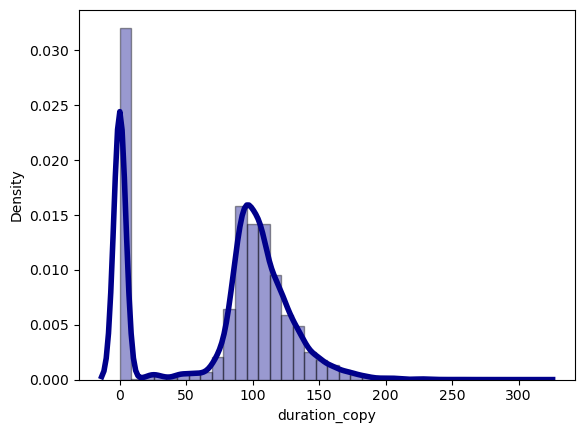

In [35]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.distplot(df_final1['duration_copy'],hist=True,kde=True,
             bins=int(36),color='darkblue',hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4})
plt.show()

In [36]:
bins1=[-1,1,50,80,100,120,150,200,315]
labels1 = ['<1','1-50','50-80','80-100','100-120','120-150','150-200','200-315']
df_final1['duration_copy']=pd.cut(df_final1['duration_copy'],bins=bins1,labels=labels1)
df_final1.head()

title         Actors         Directors  \
0  Dick Johnson Is Dead  Unknown Actor   Kirsten Johnson   
1         Blood & Water     Ama Qamata  Unknown Director   
2         Blood & Water     Ama Qamata  Unknown Director   
3         Blood & Water     Ama Qamata  Unknown Director   
4         Blood & Water    Khosi Ngema  Unknown Director   

                    Genre        country show_id     type          date_added  \
0           Documentaries  United States      s1    Movie  September 25, 2021   
1  International TV Shows   South Africa      s2  TV Show  September 24, 2021   
2               TV Dramas   South Africa      s2  TV Show  September 24, 2021   
3            TV Mysteries   South Africa      s2  TV Show  September 24, 2021   
4  International TV Shows   South Africa      s2  TV Show  September 24, 2021   

   release_year rating   duration duration_copy  
0          2020  PG-13         90        80-100  
1          2021  TV-MA  2 Seasons            <1  
2          2021  TV-MA  2 Seasons            <1  
3          2021  TV-MA  2 Seasons            <1  
4          2021  TV-MA  2 Seasons            <1

In [37]:
df_final1.loc[~df_final1['duration'].str.contains('Season'),'duration']=df_final1.loc[~df_final1['duration'].str.contains('Season'),'duration_copy']
df_final1.drop(['duration_copy'],axis=1,inplace=True)
df_final1.head()

title         Actors         Directors  \
0  Dick Johnson Is Dead  Unknown Actor   Kirsten Johnson   
1         Blood & Water     Ama Qamata  Unknown Director   
2         Blood & Water     Ama Qamata  Unknown Director   
3         Blood & Water     Ama Qamata  Unknown Director   
4         Blood & Water    Khosi Ngema  Unknown Director   

                    Genre        country show_id     type          date_added  \
0           Documentaries  United States      s1    Movie  September 25, 2021   
1  International TV Shows   South Africa      s2  TV Show  September 24, 2021   
2               TV Dramas   South Africa      s2  TV Show  September 24, 2021   
3            TV Mysteries   South Africa      s2  TV Show  September 24, 2021   
4  International TV Shows   South Africa      s2  TV Show  September 24, 2021   

   release_year rating   duration  
0          2020  PG-13     80-100  
1          2021  TV-MA  2 Seasons  
2          2021  TV-MA  2 Seasons  
3          2021  TV-MA  2 Seasons  
4          2021  TV-MA  2 Seasons

In [38]:
df_final1['duration'].value_counts()

80-100        52937
100-120       48724
1 Season      35035
120-150       26691
2 Seasons      9559
50-80          7700
150-200        6737
3 Seasons      5084
1-50           2530
4 Seasons      2134
5 Seasons      1698
7 Seasons       843
6 Seasons       633
200-315         524
8 Seasons       286
9 Seasons       257
10 Seasons      220
13 Seasons      132
12 Seasons      111
15 Seasons       96
17 Seasons       30
11 Seasons       30
Name: duration, dtype: int64

In [39]:
from datetime import datetime
from dateutil.parser import parse
arr=[]
for i in df_final1['date_added'].values:
    dt1=parse(i)
    arr.append(dt1.strftime('%Y-%m-%d'))
df_final1['Modified_Added_date']=arr
df_final1['Modified_Added_date']=pd.to_datetime(df_final1['Modified_Added_date'])
df_final1['month_added']=df_final1['Modified_Added_date'].dt.month
df_final1['week_Added']=df_final1['Modified_Added_date'].dt.week
df_final1['year']=df_final1['Modified_Added_date'].dt.year
df_final1.head()

title         Actors         Directors  \
0  Dick Johnson Is Dead  Unknown Actor   Kirsten Johnson   
1         Blood & Water     Ama Qamata  Unknown Director   
2         Blood & Water     Ama Qamata  Unknown Director   
3         Blood & Water     Ama Qamata  Unknown Director   
4         Blood & Water    Khosi Ngema  Unknown Director   

                    Genre        country show_id     type          date_added  \
0           Documentaries  United States      s1    Movie  September 25, 2021   
1  International TV Shows   South Africa      s2  TV Show  September 24, 2021   
2               TV Dramas   South Africa      s2  TV Show  September 24, 2021   
3            TV Mysteries   South Africa      s2  TV Show  September 24, 2021   
4  International TV Shows   South Africa      s2  TV Show  September 24, 2021   

   release_year rating   duration Modified_Added_date  month_added  \
0          2020  PG-13     80-100          2021-09-25            9   
1          2021  TV-MA  2 Seasons          2021-09-24            9   
2          2021  TV-MA  2 Seasons          2021-09-24            9   
3          2021  TV-MA  2 Seasons          2021-09-24            9   
4          2021  TV-MA  2 Seasons          2021-09-24            9   

   week_Added  year  
0          38  2021  
1          38  2021  
2          38  2021  
3          38  2021  
4          38  2021

Titles such as Bahubali(Hindi Version),Bahubali(Tamil Version) were there. Since it's only one movie in different languages,
#presence of brackets and content between brackets is removed.

In [40]:
# Titles such as Bahubali(Hindi Version),
# Bahubali(Tamil Version) were there.
# Since it's only one movie in different languages,
# presence of brackets and content between brackets is removed.

df_final['title']=df_final1['title'].str.replace(r"\(.*\)","")
df_final1.head()

title         Actors         Directors  \
0  Dick Johnson Is Dead  Unknown Actor   Kirsten Johnson   
1         Blood & Water     Ama Qamata  Unknown Director   
2         Blood & Water     Ama Qamata  Unknown Director   
3         Blood & Water     Ama Qamata  Unknown Director   
4         Blood & Water    Khosi Ngema  Unknown Director   

                    Genre        country show_id     type          date_added  \
0           Documentaries  United States      s1    Movie  September 25, 2021   
1  International TV Shows   South Africa      s2  TV Show  September 24, 2021   
2               TV Dramas   South Africa      s2  TV Show  September 24, 2021   
3            TV Mysteries   South Africa      s2  TV Show  September 24, 2021   
4  International TV Shows   South Africa      s2  TV Show  September 24, 2021   

   release_year rating   duration Modified_Added_date  month_added  \
0          2020  PG-13     80-100          2021-09-25            9   
1          2021  TV-MA  2 Seasons          2021-09-24            9   
2          2021  TV-MA  2 Seasons          2021-09-24            9   
3          2021  TV-MA  2 Seasons          2021-09-24            9   
4          2021  TV-MA  2 Seasons          2021-09-24            9   

   week_Added  year  
0          38  2021  
1          38  2021  
2          38  2021  
3          38  2021  
4          38  2021

### Univariate Analysis in terms of counts of each column

In [41]:
#no. of distinct titles on the basis of genre
df_final1.groupby(['Genre']).agg({"title":"nunique"})

title
Genre                              
Action & Adventure              859
Anime Features                   71
Anime Series                    176
British TV Shows                253
Children & Family Movies        641
Classic & Cult TV                28
Classic Movies                  116
Comedies                       1674
Crime TV Shows                  470
Cult Movies                      71
Documentaries                   869
Docuseries                      395
Dramas                         2427
Faith & Spirituality             65
Horror Movies                   357
Independent Movies              756
International Movies           2752
International TV Shows         1351
Kids' TV                        451
Korean TV Shows                 151
LGBTQ Movies                    102
Movies                           57
Music & Musicals                375
Reality TV                      255
Romantic Movies                 616
Romantic TV Shows               370
Sci-Fi & Fantasy                243
Science & Nature TV              92
Spanish-Language TV Shows       174
Sports Movies                   219
Stand-Up Comedy                 343
Stand-Up Comedy & Talk Shows     56
TV Action & Adventure           168
TV Comedies                     581
TV Dramas                       763
TV Horror                        75
TV Mysteries                     98
TV Sci-Fi & Fantasy              84
TV Shows                         16
TV Thrillers                     57
Teen TV Shows                    69
Thrillers                       577

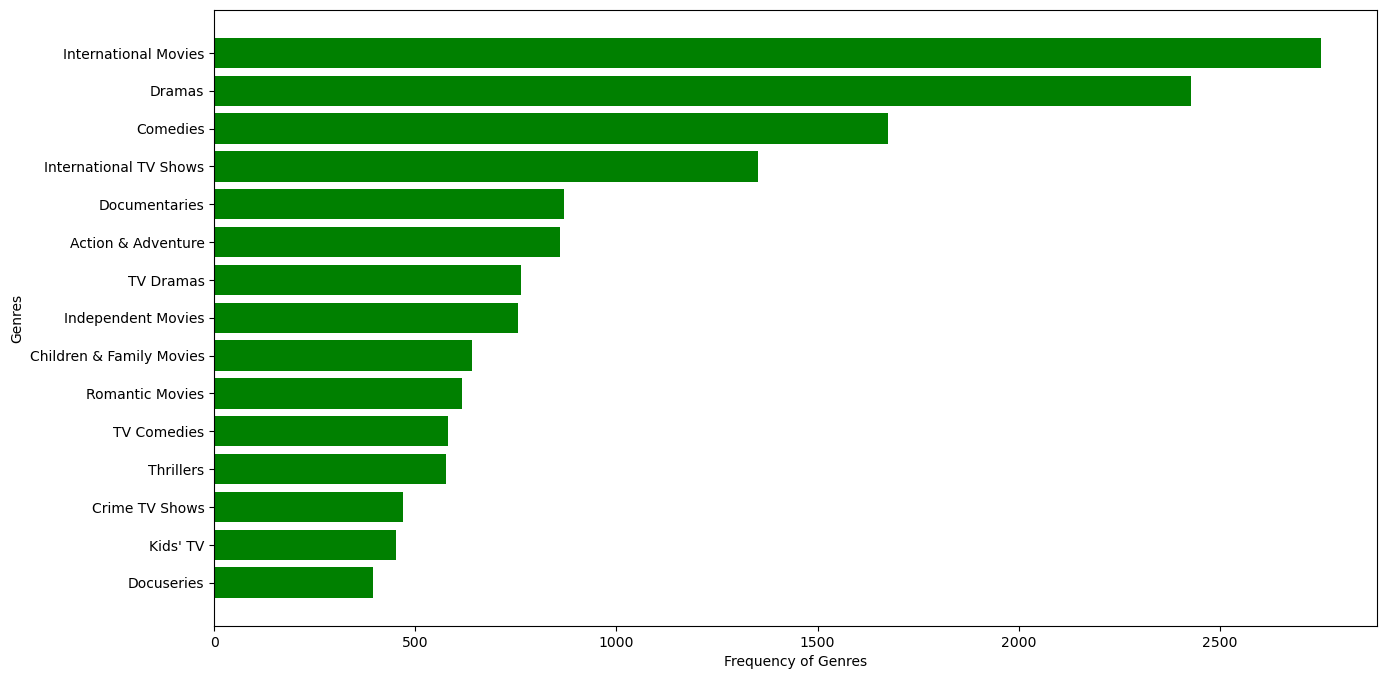

In [42]:
df_genre=df_final1.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'],df_genre[::-1]['title'],color=['green'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

### International Movies, Dramas and Comedies are the most popular

In [43]:
#number of distinct titles on the basis of type
df_final1.groupby(['type']).agg({"title":'nunique'})

title
type          
Movie     6131
TV Show   2676

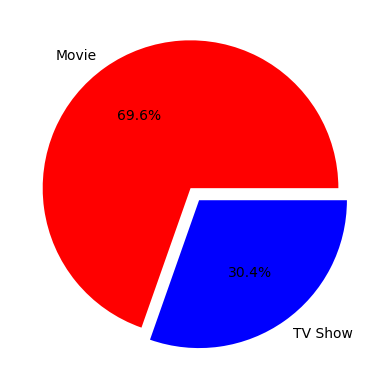

In [44]:
df_type=df_final1.groupby(['type']).agg({"title":"nunique"}).reset_index()
plt.pie(df_type['title'],explode=(0.05,0.05),labels=df_type['type'],colors=['red','blue'],autopct='%.1f%%')
plt.show()

### We have 70:30 ratio of Movies and TV Shows in our data

In [45]:
#number of distinct titles on the basis of country
df_final1.groupby(['country']).agg({"title":"nunique"})

title
country            
                  3
Afghanistan       1
Albania           1
Algeria           3
Angola            2
...             ...
Vatican City      1
Venezuela         4
Vietnam           7
West Germany      5
Zimbabwe          3

[128 rows x 1 columns]

The above dataframe shows a flaw in which we are seeing countries, such as Cambodia and Cambodia, or United States and United States, are shown as different countries.They should have been same

In [46]:
df_final1['country']=df_final1['country'].str.replace(',','')
df_final1.head()

title         Actors         Directors  \
0  Dick Johnson Is Dead  Unknown Actor   Kirsten Johnson   
1         Blood & Water     Ama Qamata  Unknown Director   
2         Blood & Water     Ama Qamata  Unknown Director   
3         Blood & Water     Ama Qamata  Unknown Director   
4         Blood & Water    Khosi Ngema  Unknown Director   

                    Genre        country show_id     type          date_added  \
0           Documentaries  United States      s1    Movie  September 25, 2021   
1  International TV Shows   South Africa      s2  TV Show  September 24, 2021   
2               TV Dramas   South Africa      s2  TV Show  September 24, 2021   
3            TV Mysteries   South Africa      s2  TV Show  September 24, 2021   
4  International TV Shows   South Africa      s2  TV Show  September 24, 2021   

   release_year rating   duration Modified_Added_date  month_added  \
0          2020  PG-13     80-100          2021-09-25            9   
1          2021  TV-MA  2 Seasons          2021-09-24            9   
2          2021  TV-MA  2 Seasons          2021-09-24            9   
3          2021  TV-MA  2 Seasons          2021-09-24            9   
4          2021  TV-MA  2 Seasons          2021-09-24            9   

   week_Added  year  
0          38  2021  
1          38  2021  
2          38  2021  
3          38  2021  
4          38  2021

In [47]:
#number of distinct titles on the basis of country
df_final1.groupby(['country']).agg({"title":"nunique"})

title
country            
                  3
Afghanistan       1
Albania           1
Algeria           3
Angola            2
...             ...
Vatican City      1
Venezuela         4
Vietnam           7
West Germany      5
Zimbabwe          3

[124 rows x 1 columns]

Now it looks great

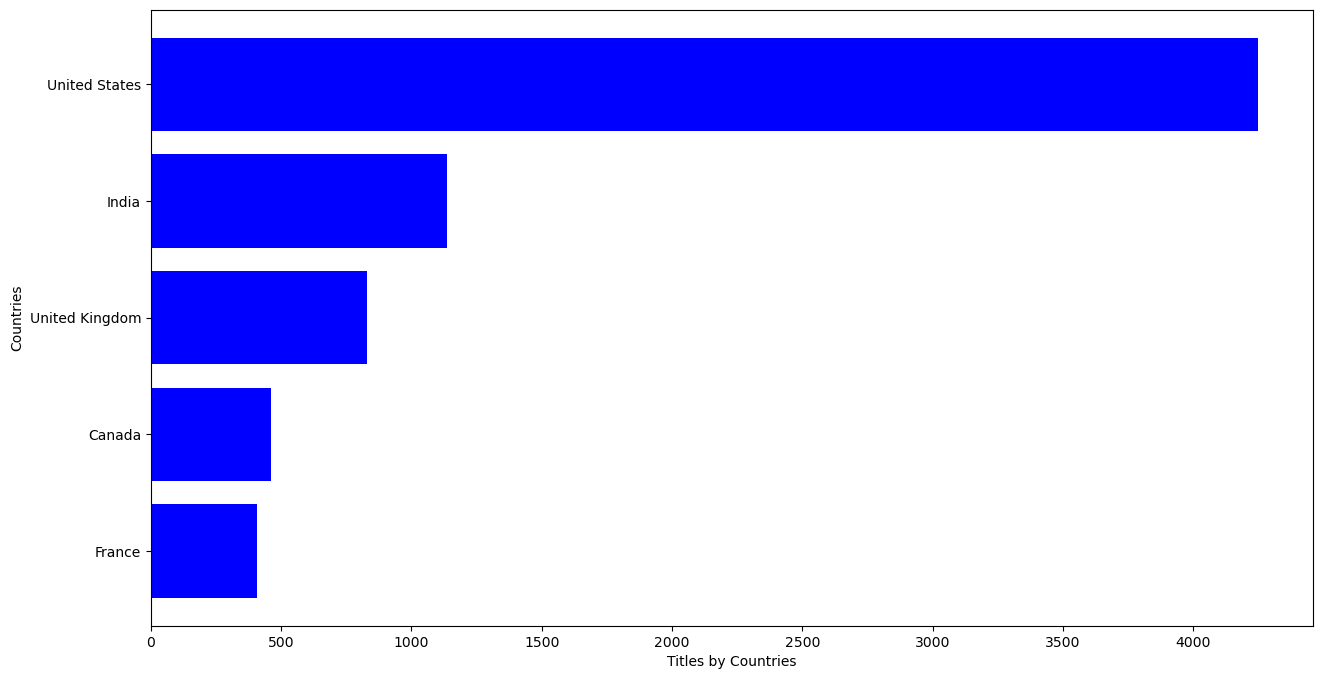

In [48]:
df_country=df_final1.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:5]
plt.figure(figsize=(15,8))
plt.barh(df_country[::-1]['country'],df_country[::-1]['title'],color=['blue'])
plt.xlabel('Titles by Countries')
plt.ylabel('Countries')
plt.show()

US,India,UK,Canada and France are leading countries in Content Creation on Netflix

In [49]:
#number of distinct titles on the basis of rating
df_final1.groupby(['rating']).agg({"title":"nunique"})

title
rating         
G            41
NC-17         3
NR           87
PG          287
PG-13       490
R           799
TV-14      2160
TV-G        220
TV-MA      3207
TV-PG       863
TV-Y        307
TV-Y7       334
TV-Y7-FV      6
UR            3

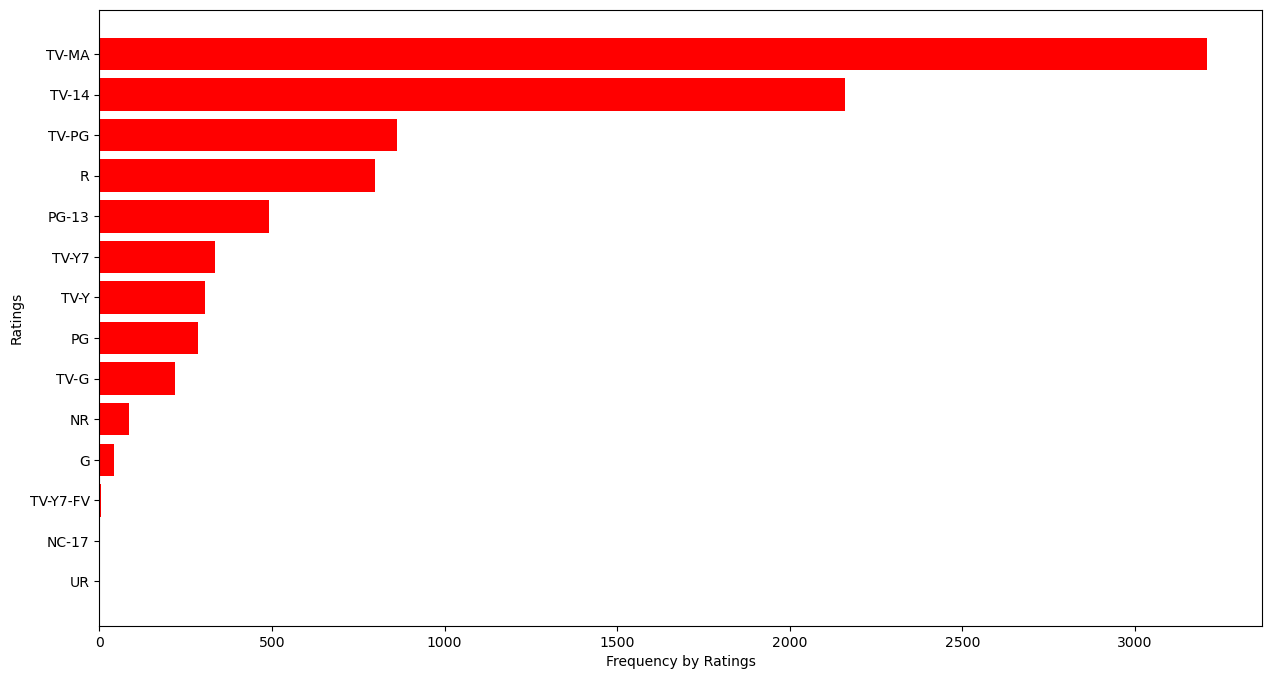

In [50]:
df_rating=df_final1.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'],df_rating[::-1]['title'],color=['red'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

Most of the highly rated content on Netflix is intended for Mature Audiences, R Rated, content not intended for audience under 14 and those which require Parental Guidance

In [51]:
#number of distinct titles on the basis of duration
df_final1.groupby(['duration']).agg({"title":"nunique"})

title
duration         
1 Season     1793
1-50          287
10 Seasons      7
100-120      1672
11 Seasons      2
12 Seasons      2
120-150       897
13 Seasons      3
15 Seasons      2
150-200       226
17 Seasons      1
2 Seasons     425
200-315        19
3 Seasons     199
4 Seasons      95
5 Seasons      65
50-80         808
6 Seasons      33
7 Seasons      23
8 Seasons      17
80-100       2222
9 Seasons       9

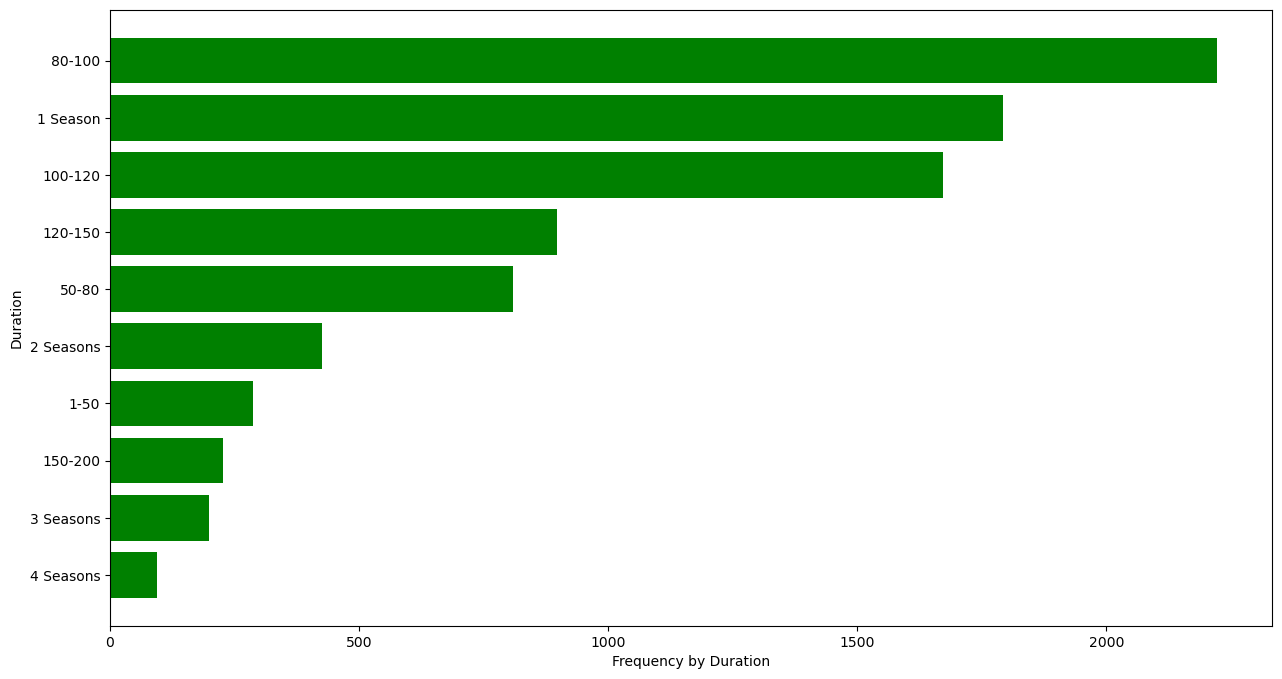

In [52]:
df_duration=df_final1.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'],color=['green'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

The duration of Most Watched content in our whole data is 80-100 mins.These must be movies and Shows having only 1 Season.

In [53]:
#number of distinct titles on the basis of Actors
df_final1.groupby(['Actors']).agg({"title":"nunique"})

title
Actors                      
 Jr.                       2
"Riley" Lakdhar Dridi      1
'Najite Dede               2
2 Chainz                   1
2Mex                       1
...                      ...
Şevket Çoruh               1
Şinasi Yurtsever           3
Şükran Ovalı               1
Şükrü Özyıldız             2
Ṣọpẹ́ Dìrísù               1

[36440 rows x 1 columns]

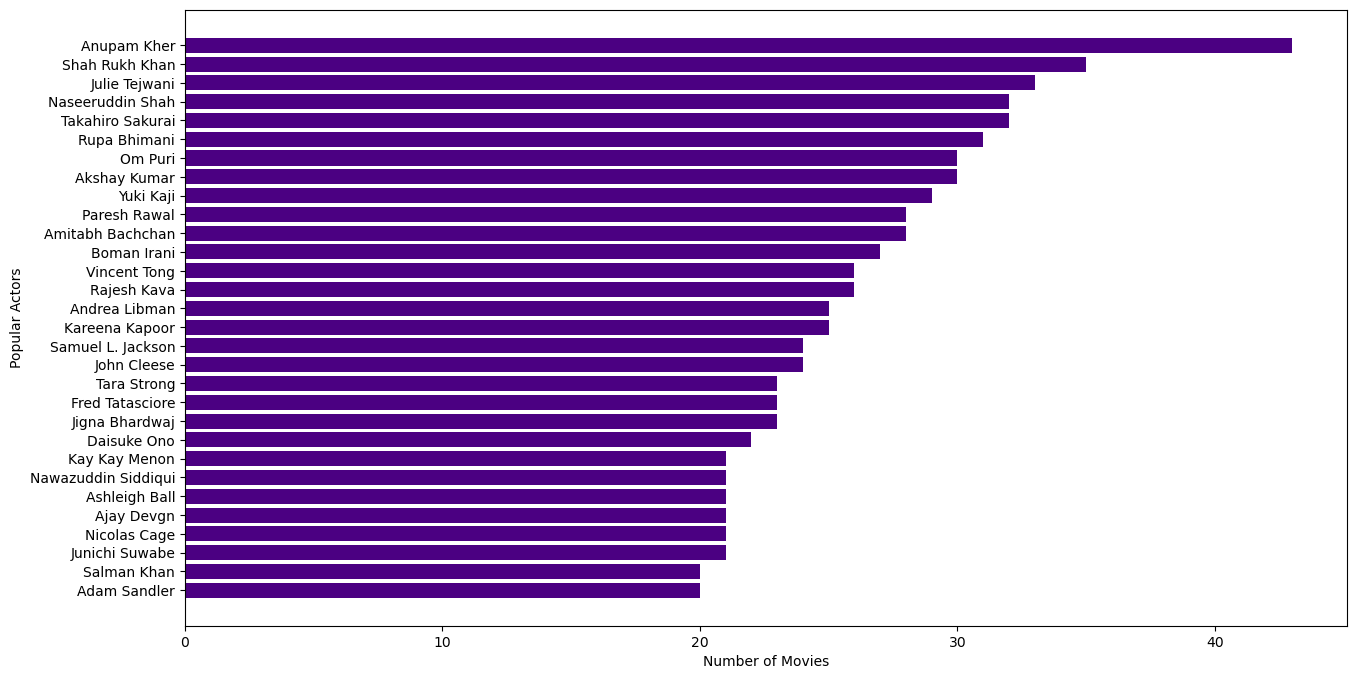

In [54]:
df_actors=df_final1.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_actors=df_actors[df_actors['Actors']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

Anupam Kher,SRK,Julie Tejwani, Naseeruddin Shah and Takahiro Sakurai occupy the top stop in Most Watched content.

In [55]:
#number of distinct titles on the basis of Directors
df_final1.groupby(['Directors']).agg({"title":"nunique"})

title
Directors                 
A. L. Vijay              2
A. Raajdheep             1
A. Salaam                1
A.R. Murugadoss          2
Aadish Keluskar          1
...                    ...
Éric Warin               1
Ísold Uggadóttir         1
Óskar Thór Axelsson      1
Ömer Faruk Sorak         3
Şenol Sönmez             2

[4994 rows x 1 columns]

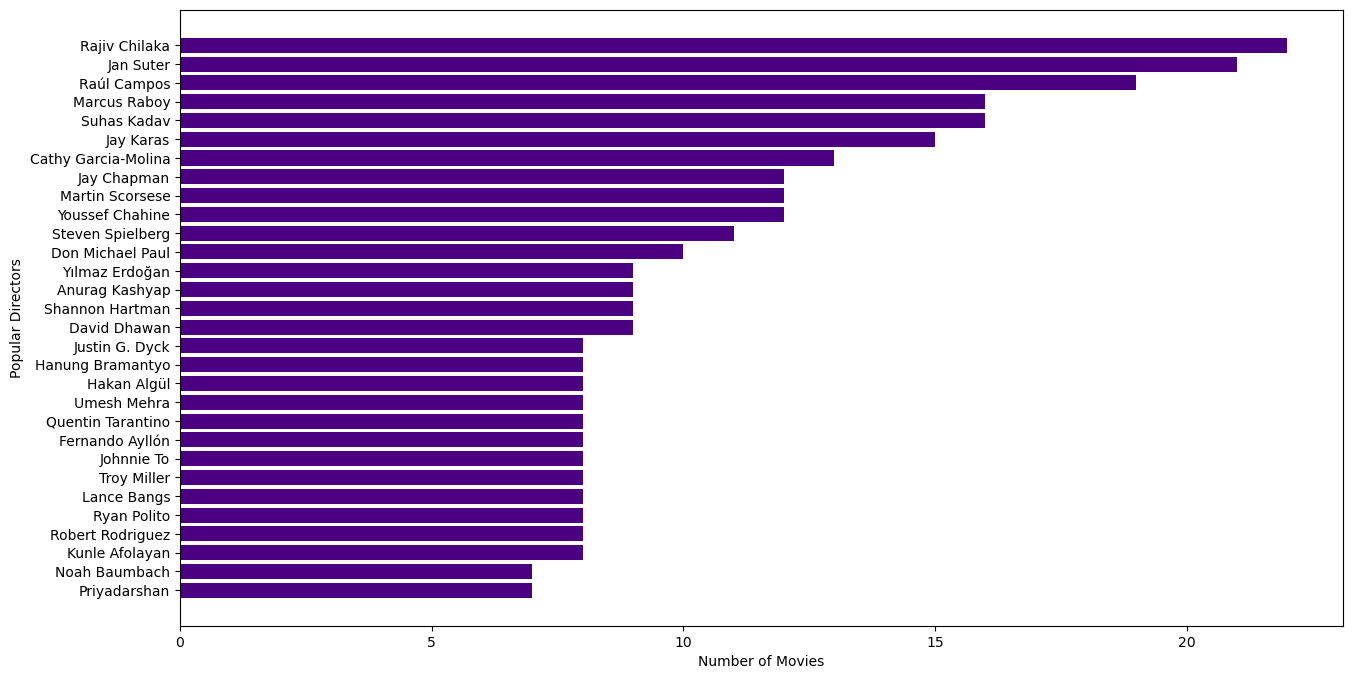

In [56]:
df_directors=df_final1.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_directors=df_directors[df_directors['Directors']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['Directors'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

Rajiv Chilaka, Jan Suter and Raul Campos are the most popular directors across Netflix

In [57]:
#number of distinct titles on the basis of year
df_final1.groupby(['year']).agg({"title":"nunique"})

title
year       
2008      2
2009      2
2010      1
2011     13
2012      3
2013     11
2014     24
2015     82
2016    432
2017   1189
2018   1650
2019   2018
2020   1879
2021   1501

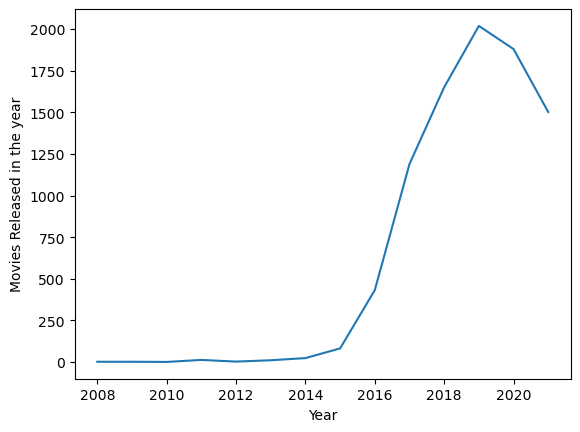

In [58]:
df_year=df_final1.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year,x='year',y='title')
plt.ylabel("Movies Released in the year")
plt.xlabel("Year")
plt.show()

The Amount of Content across Netflix has increased from 2008 continuously till 2019. Then started decreasing from here(probably due to Covid)

In [59]:
#number of distinct titles on the basis of week
df_final1.groupby(['week_Added']).agg({"title":"nunique"})

title
week_Added       
1             372
2             108
3             113
4              88
5             208
6              97
7             147
8             110
9             254
10            135
11            163
12            109
13            250
14            173
15            153
16            160
17            154
18            234
19            116
20            131
21            117
22            206
23            151
24            164
25            143
26            271
27            241
28            131
29            140
30            160
31            269
32            122
33            153
34            143
35            265
36            142
37            183
38            139
39            166
40            287
41            116
42            135
43            116
44            318
45             98
46            134
47            120
48            200
49            140
50            189
51            137
52            132
53            104

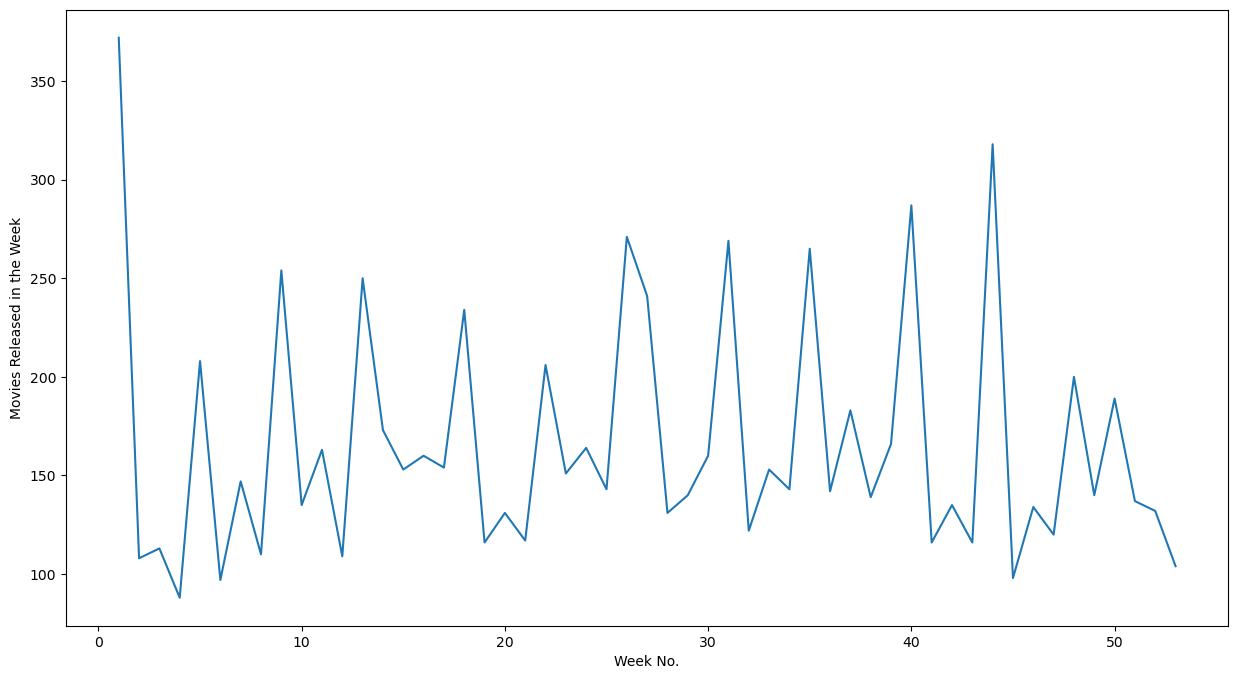

In [60]:
df_week=df_final1.groupby(['week_Added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=df_week, x='week_Added', y='title')
plt.ylabel("Movies Released in the Week")
plt.xlabel("Week No.")
plt.show()

Most of the Content across Netflix is added in the first week of the year and it follows a bit of a cyclical pattern

In [61]:
#number of distinct titles on the basis of month
df_final1.groupby(['month_added']).agg({"title":"nunique"})

title
month_added       
1              738
2              563
3              742
4              765
5              632
6              728
7              832
8              756
9              772
10             760
11             706
12             813

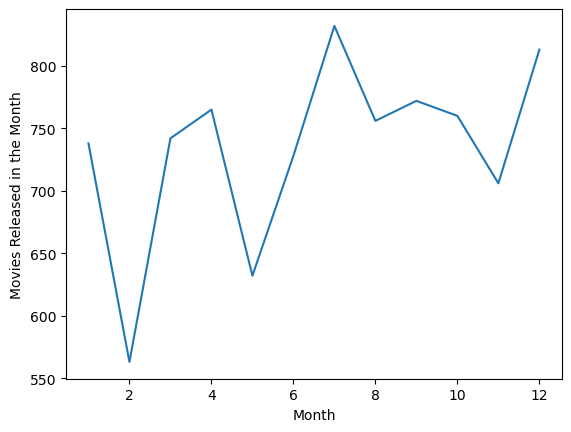

In [62]:
df_month=df_final1.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("Movies Released in the Month")
plt.xlabel("Month")
plt.show()

Most of the content is added in the first and last months across Netflix

In [63]:
#number of distinct titles on the basis of released year
df_final1[df_final1['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"})

title
release_year       
1980             11
1981             13
1982             17
1983             11
1984             12
1985             10
1986             13
1987              8
1988             18
1989             16
1990             22
1991             17
1992             23
1993             28
1994             22
1995             25
1996             24
1997             38
1998             36
1999             39
2000             37
2001             45
2002             51
2003             61
2004             64
2005             80
2006             96
2007             88
2008            136
2009            152
2010            194
2011            185
2012            237
2013            288
2014            352
2015            560
2016            902
2017           1032
2018           1147
2019           1030
2020            953
2021            592

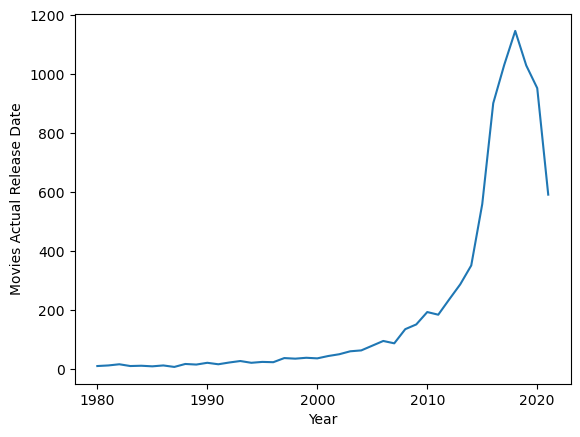

In [64]:
df_release_year=df_final1[df_final1['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

Net content release which are later uploaded to Netflix has increased since 1980 till 2020 though later reduced certainly due to COVID-19

### Univariate Analysis separately for shows and movies

In [65]:
df_shows=df_final1[df_final1['type']=='TV Show']
df_movies=df_final1[df_final1['type']=='Movie']

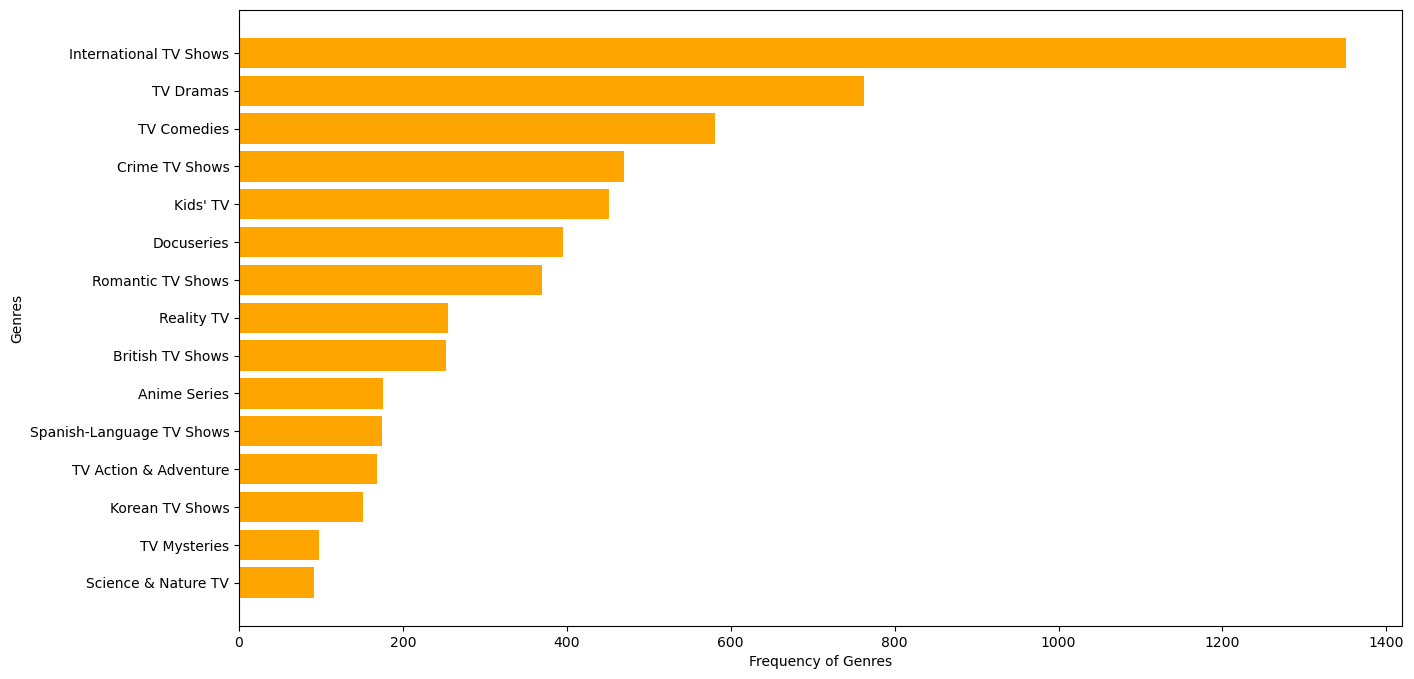

In [66]:
df_genre=df_shows.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

International TV Shows, Dramas and Comedy Genres are popular across TV Shows in Netflix

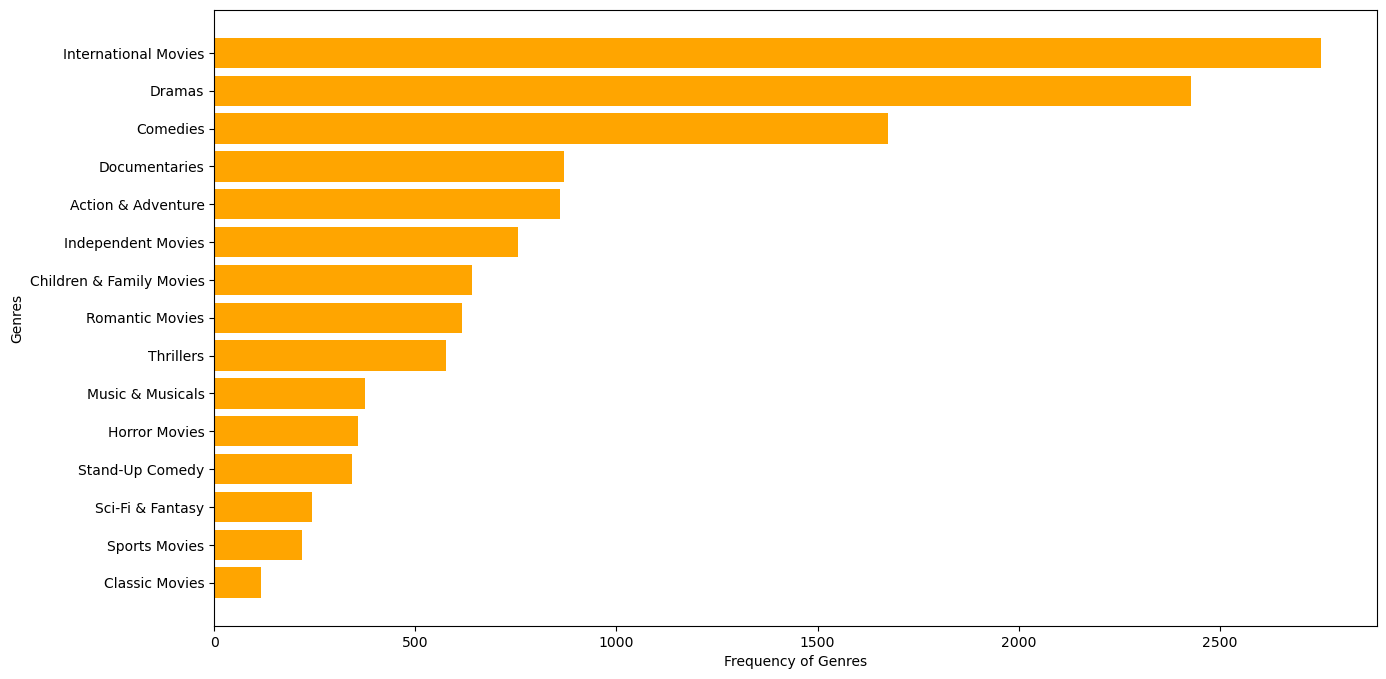

In [67]:
df_genre=df_movies.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

International Movies, Dramas and Comedy Genres are popular followed by Documentaries across Movies on Netflix

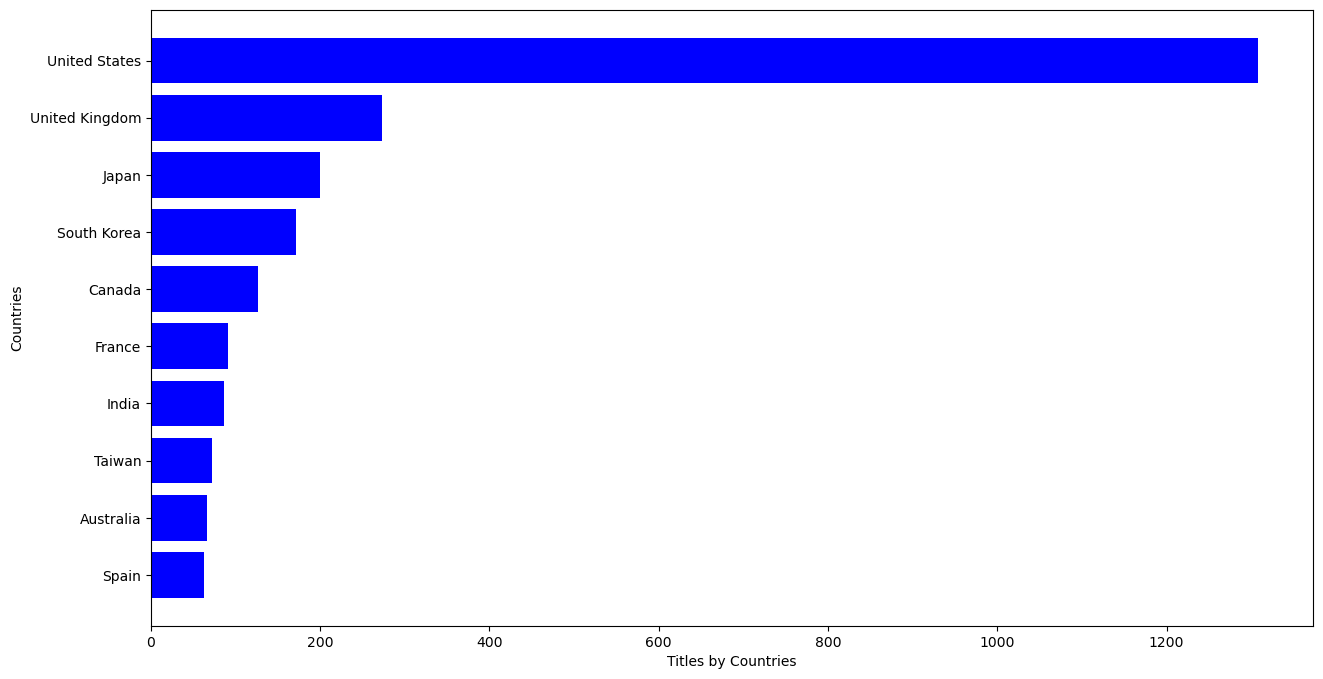

In [68]:
df_country=df_shows.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_country[::-1]['country'], df_country[::-1]['title'],color=['blue'])
plt.xlabel('Titles by Countries')
plt.ylabel('Countries')
plt.show()

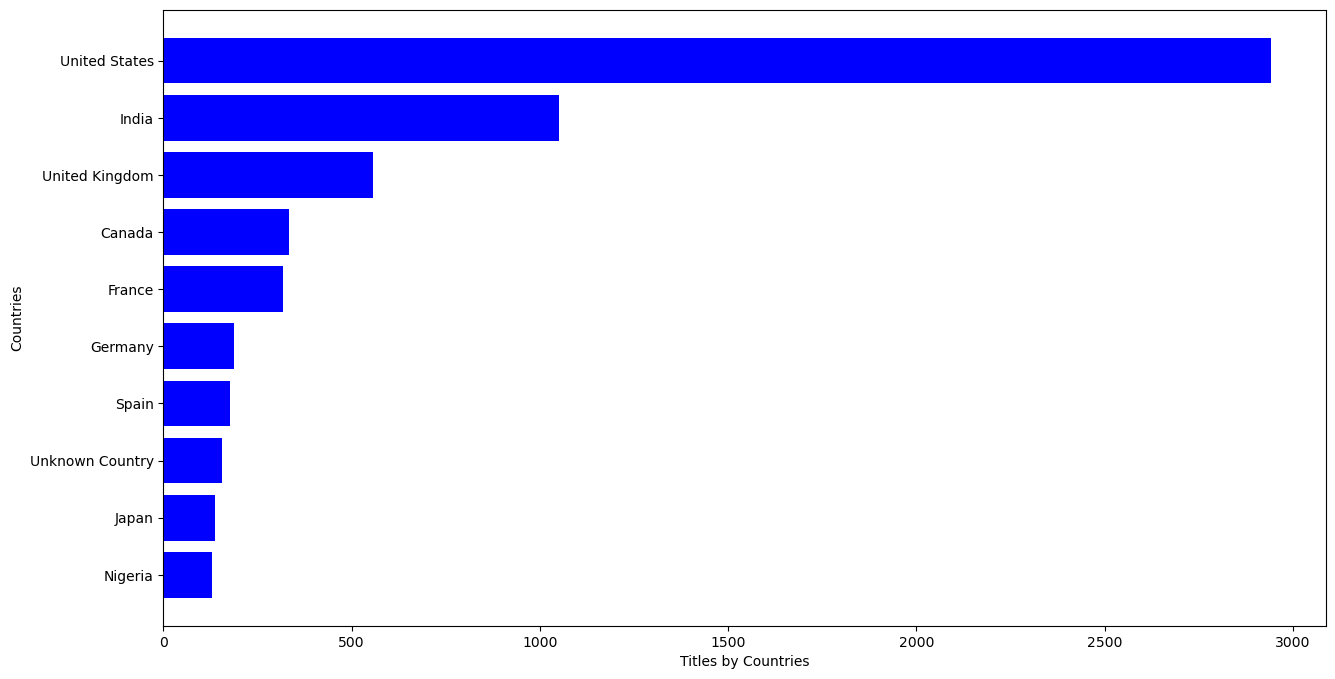

In [69]:
df_country=df_movies.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_country[::-1]['country'], df_country[::-1]['title'],color=['blue'])
plt.xlabel('Titles by Countries')
plt.ylabel('Countries')
plt.show()

United States is leading across both TV Shows and Movies, UK also provides great content across TV Shows and Movies. Surprisingly India is much more prevalent in Movies as compared TV Shows. 

Moreover the number of Movies created in India outweigh the sum of TV Shows and Movies across UK since India was rated as second in net sum of whole content across Netflix.

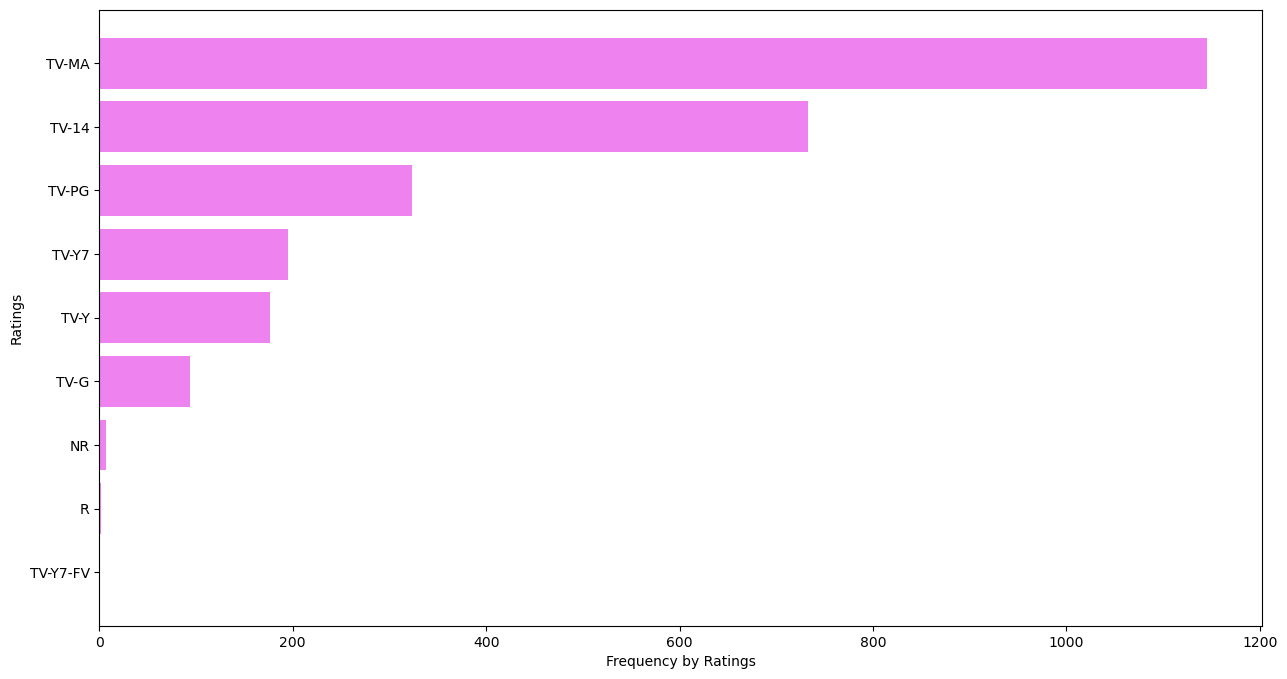

In [70]:
df_rating=df_shows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

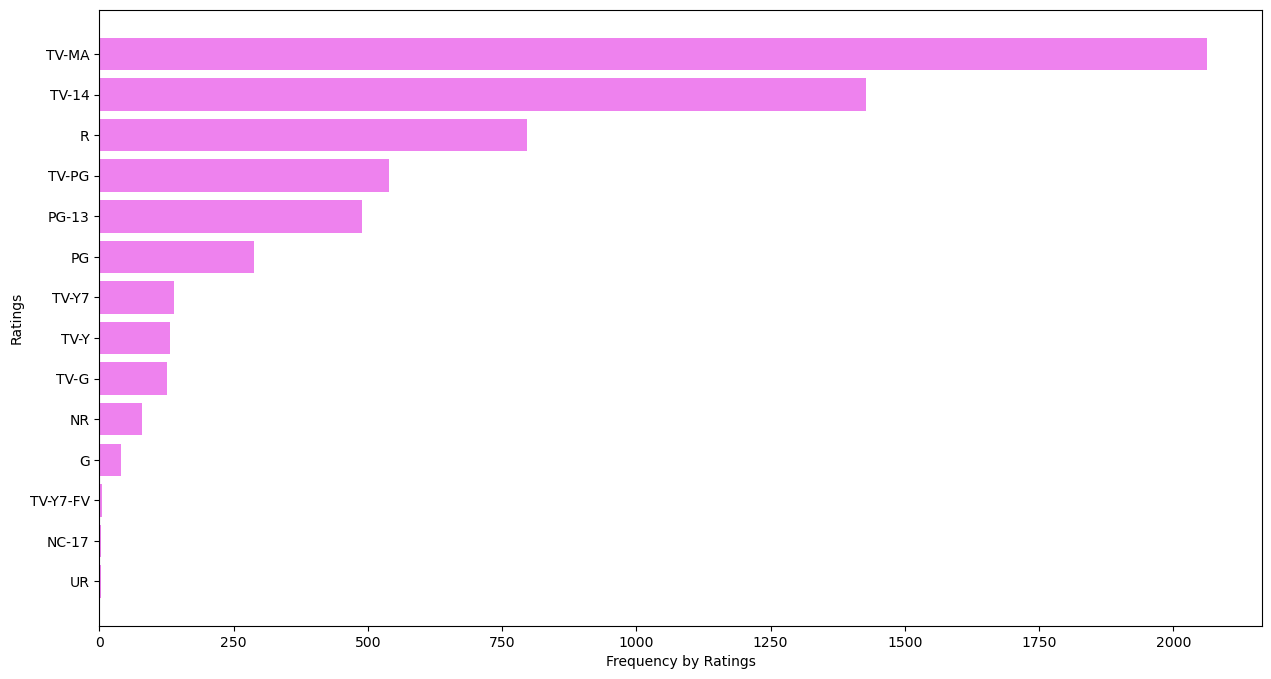

In [71]:
df_rating=df_movies.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

So it seems plaussible to conclude that the popular ratings across Netflix includes Mature Audiences and those appropriate for over 14/over 17 ages.

Moreover there are no TV Shows having a rating of R 

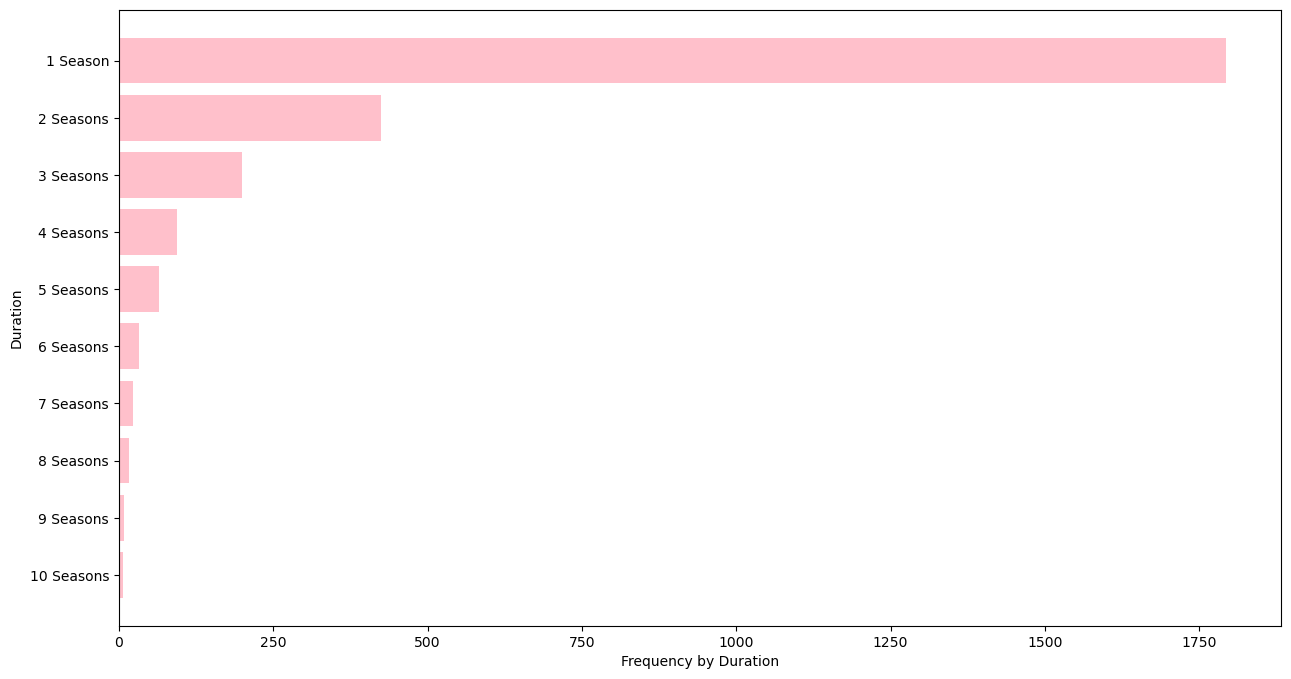

In [72]:
df_duration=df_shows.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'],color=['pink'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

Across TV Shows, shows having only 1 Season are common as soon as the season length increases, the number of shows decrease and this definitely sounds as expected

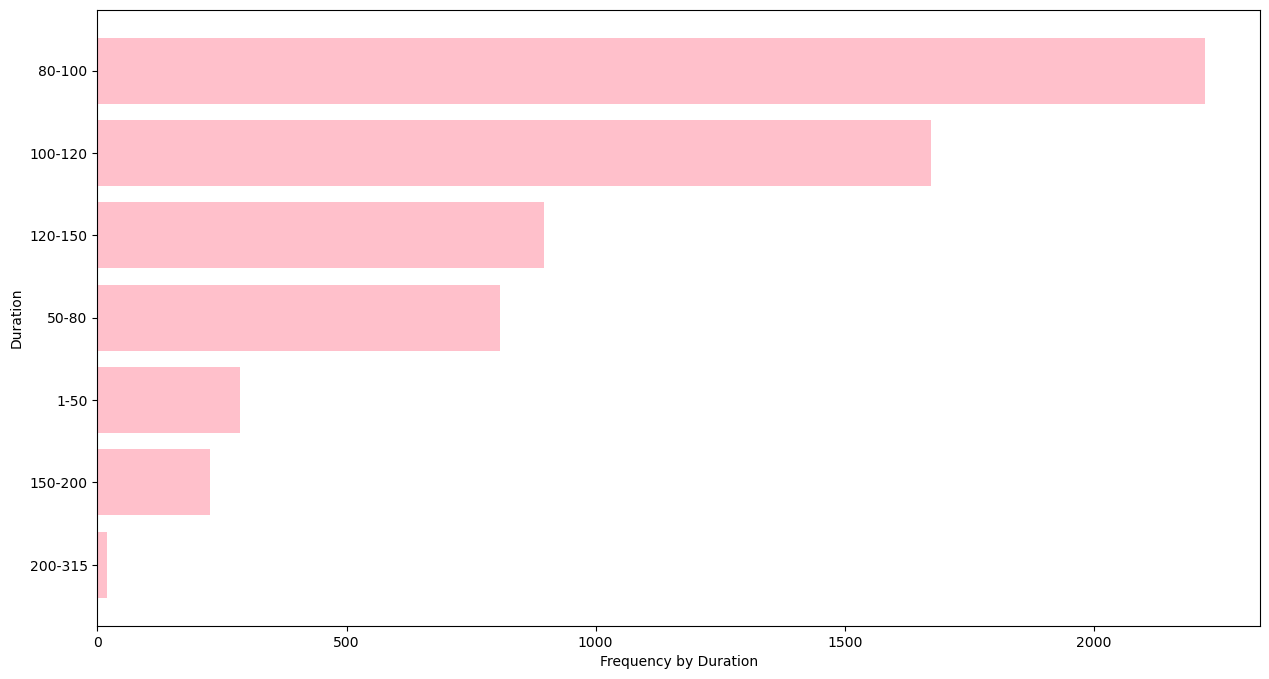

In [73]:
df_duration=df_movies.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'],color=['pink'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

Across movies 80-100,100-120 and 120-150 is the ranges of minutes for which most movies lie. So quite possibly 80-150 mins is the sweet spot we would be wanting for movies.

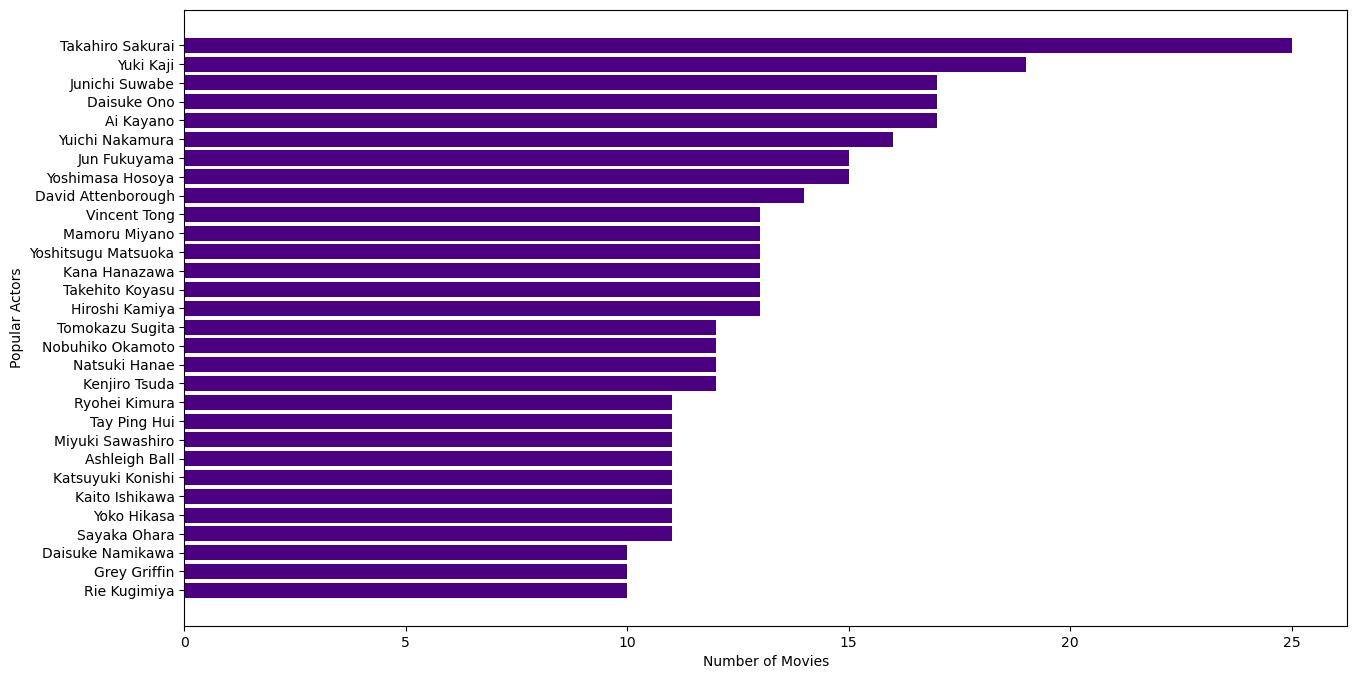

In [74]:
df_actors=df_shows.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_actors=df_actors[df_actors['Actors']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

Takahiro Sakurai,Yuki Kaji and other South Korean/Japanese actors are the most popular actors across TV Shows

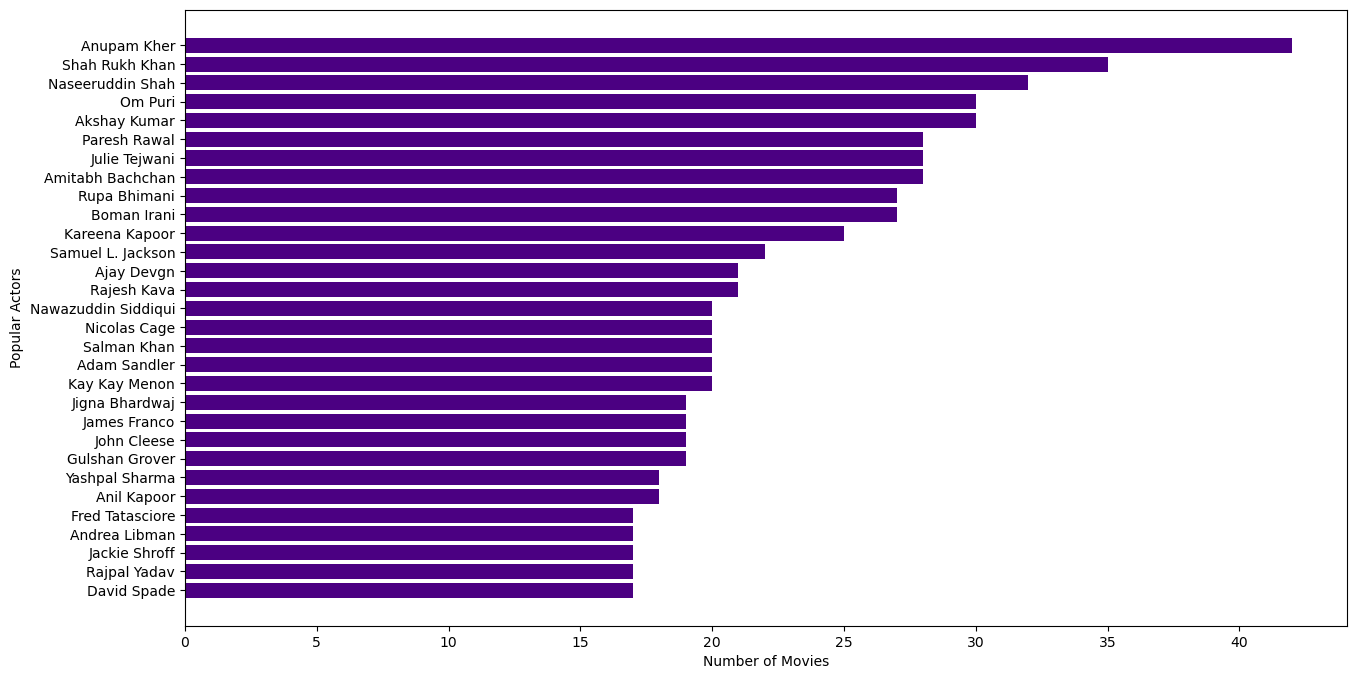

In [75]:
df_actors=df_movies.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_actors=df_actors[df_actors['Actors']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

Our bollywood actors such as Anupam Kher, SRK, Naseeruddin Shah are very much popular acrossmovies on Netflix

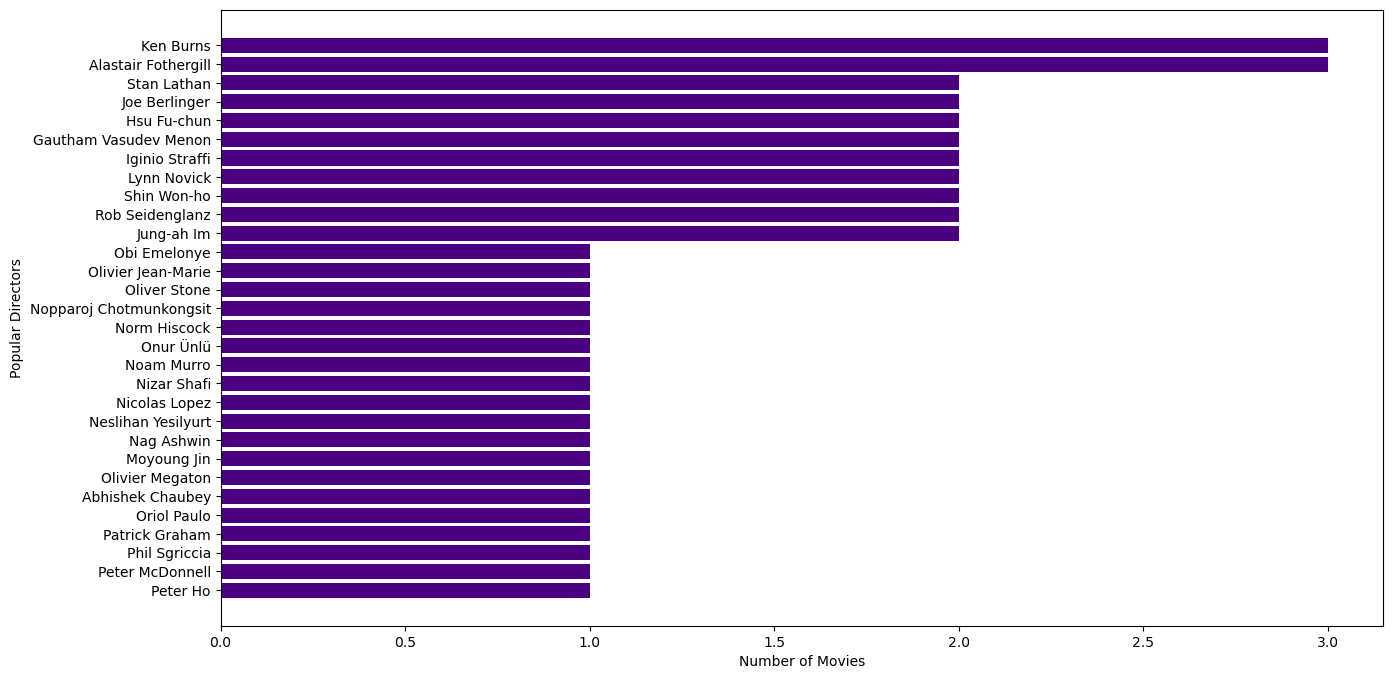

In [76]:
df_directors=df_shows.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_directors=df_directors[df_directors['Directors']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['Directors'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

Ken Burns, Alastair Fothergill, Stan Lathan, Joe Barlinger are popular directors across TV Shows on Netflix

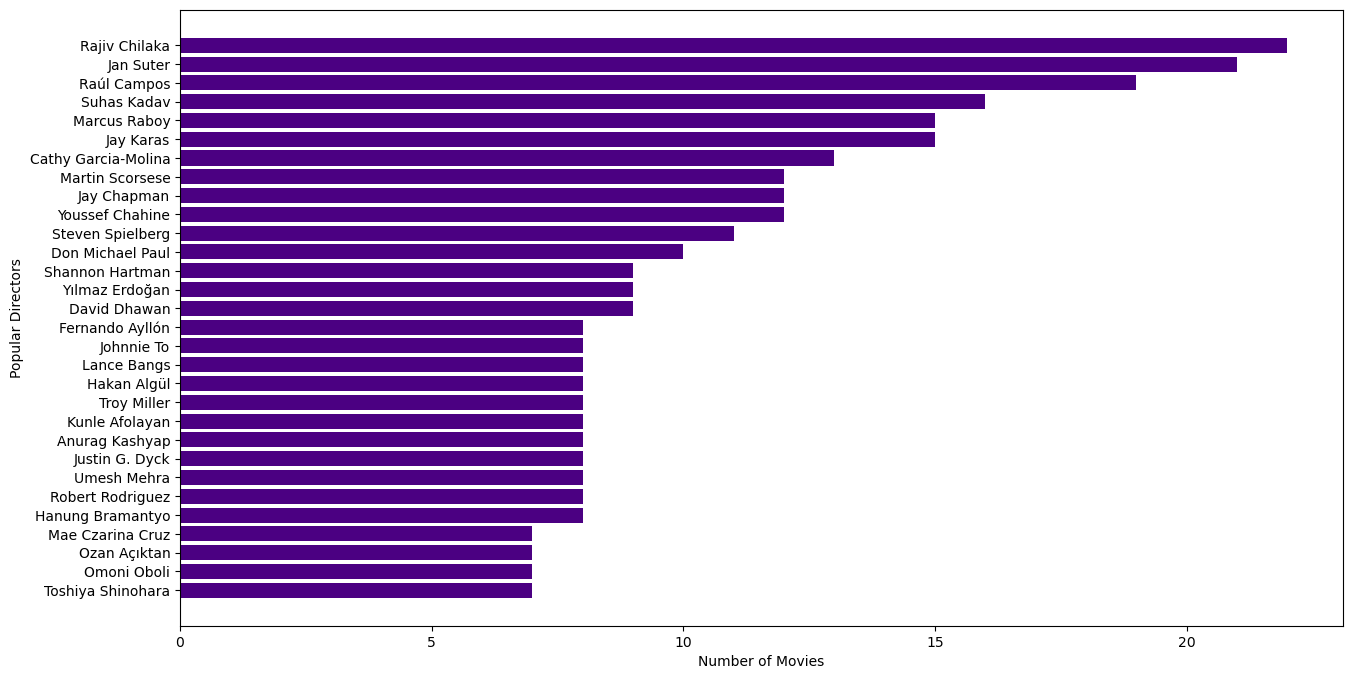

In [77]:
df_directors=df_movies.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_directors=df_directors[df_directors['Directors']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['Directors'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

Rajiv Chilka, Jan Suter, Raul Campos, Suhas Kadav are popular directors across movies

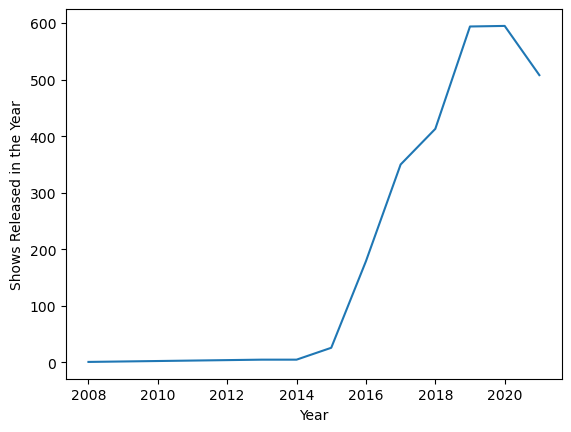

In [78]:
df_year=df_shows.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Shows Released in the Year")
plt.xlabel("Year")
plt.show()

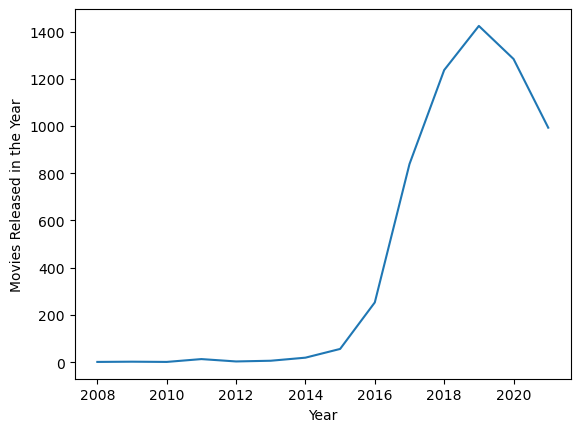

In [79]:
df_year=df_movies.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.show()

Till 2019, overall content across Netflix was increasing but due to Covid in 2020, though TV Shows didn't take a hit then Movies did take a hit. Well later in 2021, content across both was reduced significantly

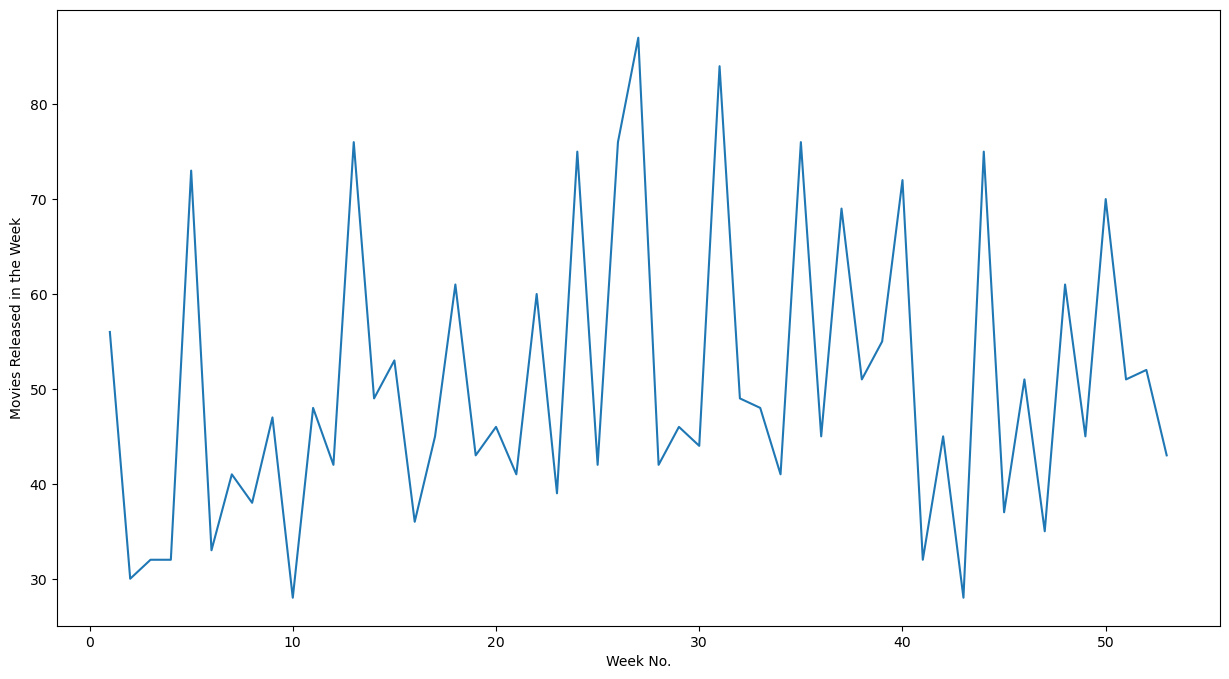

In [80]:
df_week=df_shows.groupby(['week_Added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=df_week, x='week_Added', y='title')
plt.ylabel("Movies Released in the Week")
plt.xlabel("Week No.")
plt.show()

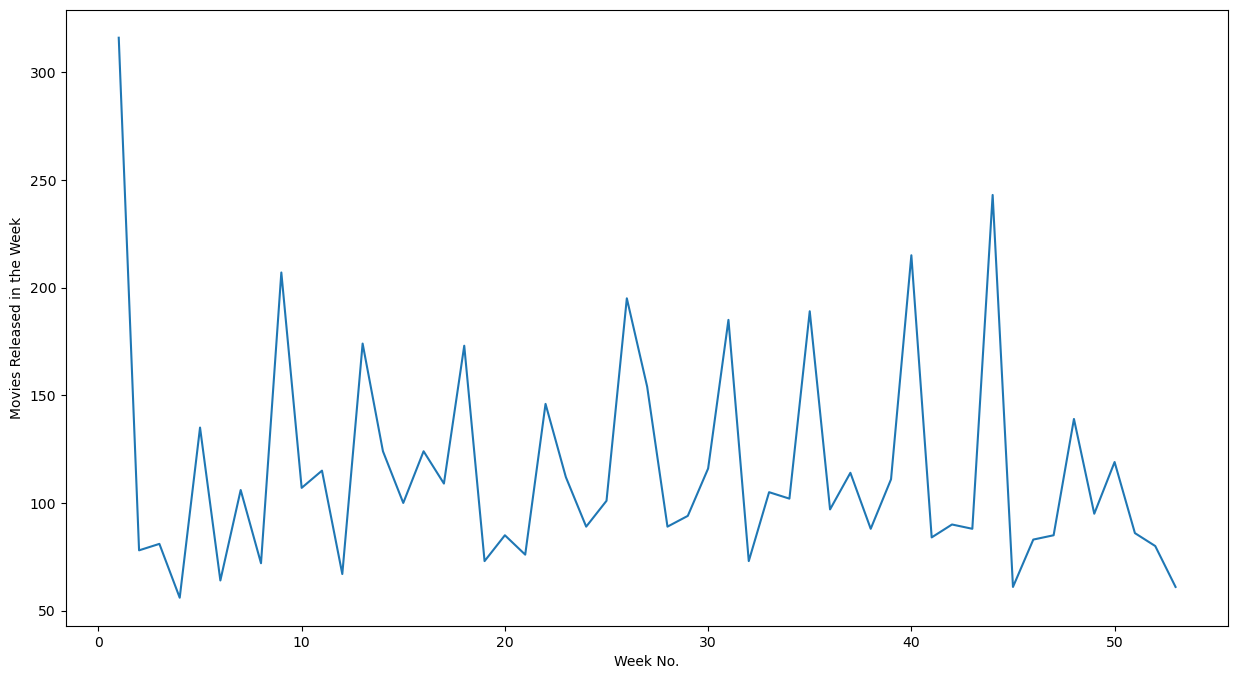

In [81]:
df_week=df_movies.groupby(['week_Added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=df_week, x='week_Added', y='title')
plt.ylabel("Movies Released in the Week")
plt.xlabel("Week No.")
plt.show()

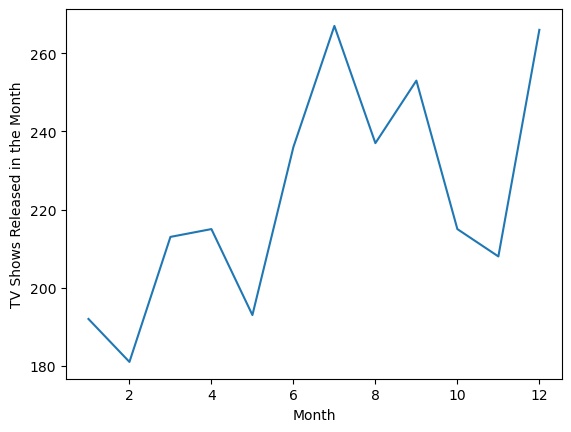

In [82]:
df_month=df_shows.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("TV Shows Released in the Month")
plt.xlabel("Month")
plt.show()

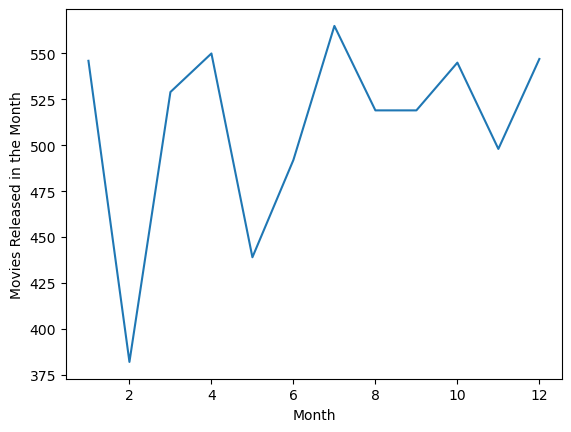

In [83]:
df_month=df_movies.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("Movies Released in the Month")
plt.xlabel("Month")
plt.show()

TV Shows are added in Netflix by a tremendous amount in mid weeks/months of the year, i.e- July

Movies are added in Netflix by a tremendous amount in first week/last month of current year and first month of next year

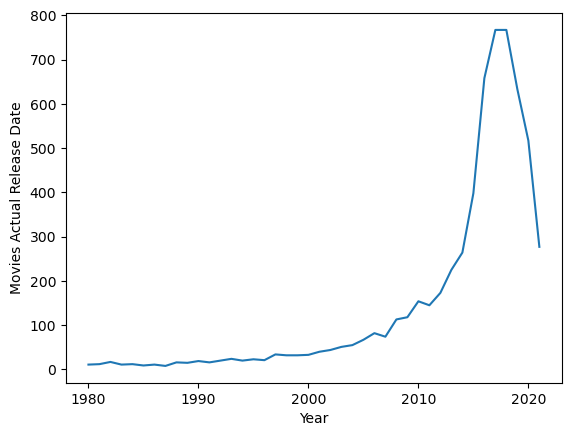

In [84]:
df_release_year=df_movies[df_movies['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

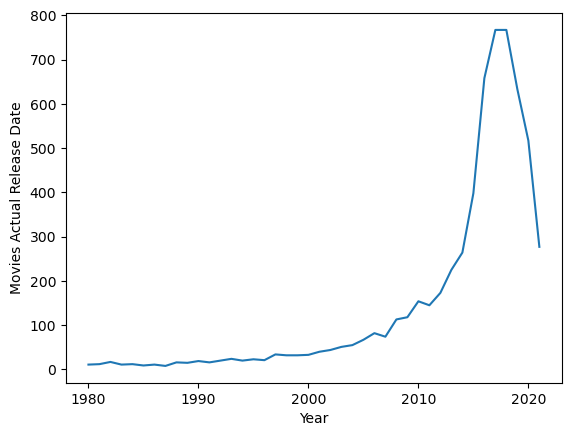

In [85]:
df_release_year=df_movies[df_movies['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

Actual Releases of both TV Shows and Movies have taken a hit after 2020

## Questions to be Explored Now for Recommendations

1) So this time, the granularity level is country  and analysis of TV Shows/Movies the country brings. I am going to consider only the top countries individually for TV Shows and Movies. There are definitely some common countries too which bring out quality content in both TV Shows and Movies.

2) Which Genres do these countries offer and what are the intended audiences(Ratings) which are popular in Netflix?

3)In case of Movies, what is the duration/length of movies which makes them special and depicts attention span?

4)Who are the popular actors/directors across TV Shows and Movies in these countries?

5)In what time of the year, people tend to watch movies and shows in these countries?

6)Popular Actor and Director Combinations in these countries

In [86]:
#below countries will be analyzed for both shows and movies
shows_and_movies=['United States','India','United Kingdom']
#below countries will be only analyzed on basis of shows
only_shows=['Japan','South Korea']

#### Univariate Analysis separately for shows and movies in USA

In [87]:
#Analyzing USA for both shows and movies
df_usa_shows=df_final1[df_final1['country']=='United States'][df_final1[df_final1['country']=='United States']['type']=='TV Show']
df_usa_movies=df_final1[df_final1['country']=='United States'][df_final1[df_final1['country']=='United States']['type']=='Movie']

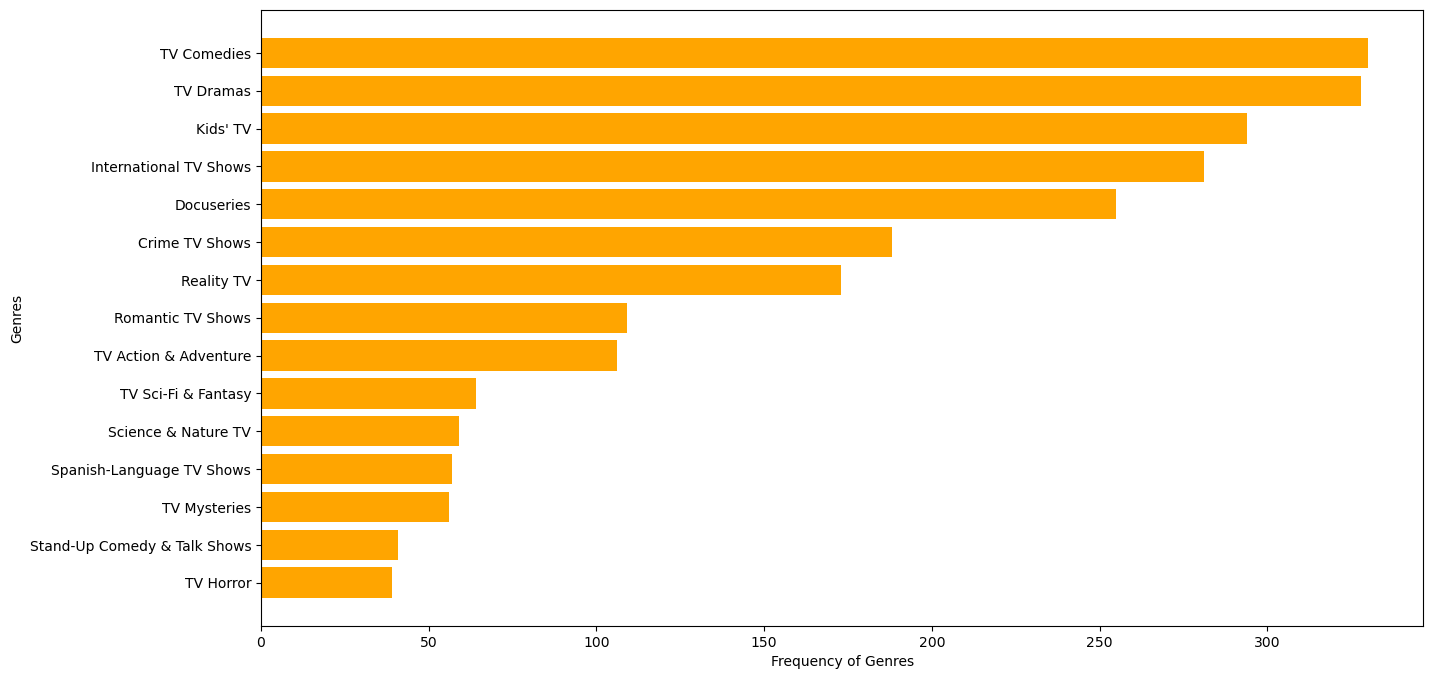

In [88]:
df_genre=df_usa_shows.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

Dramas,Comedy, Kids 'TV Shows, International TV Shows and Docuseries, Genres are popular in TV Series in USA

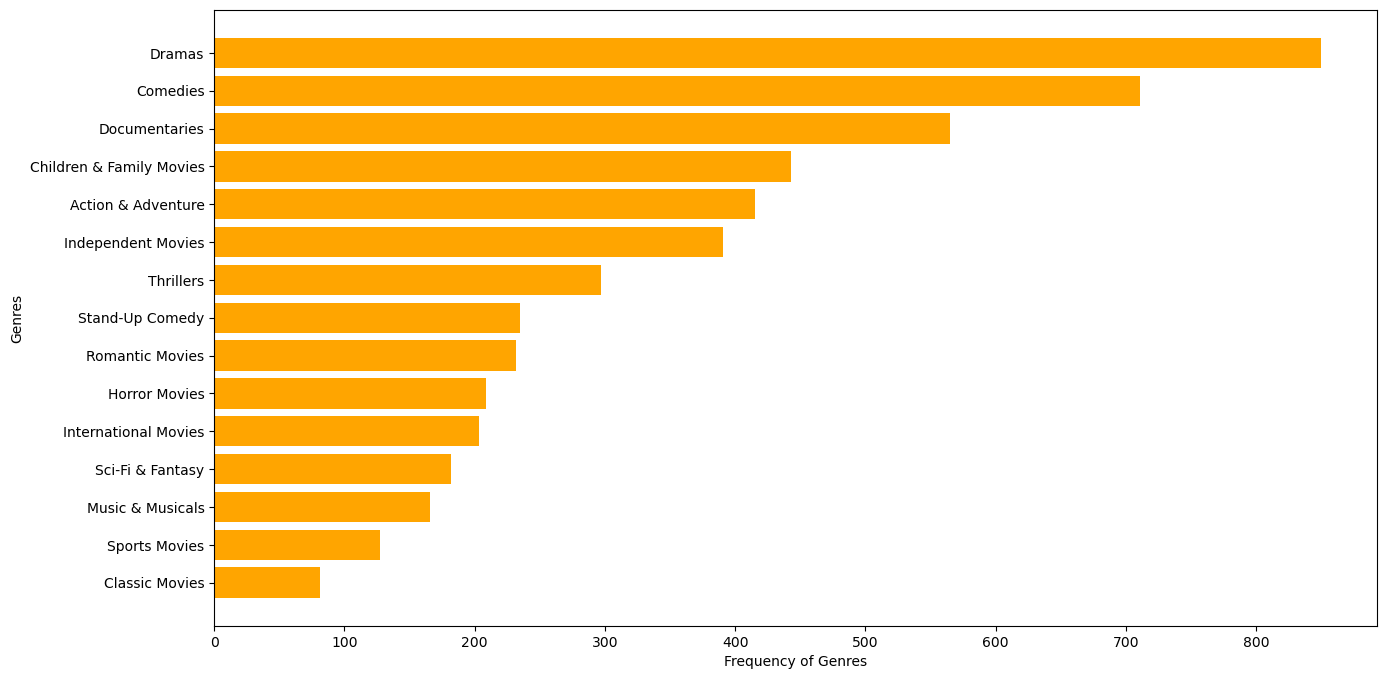

In [89]:
df_genre=df_usa_movies.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

Dramas,Comedy, Documentaries, Family Movies and Action Genres in Movies are popular in USA

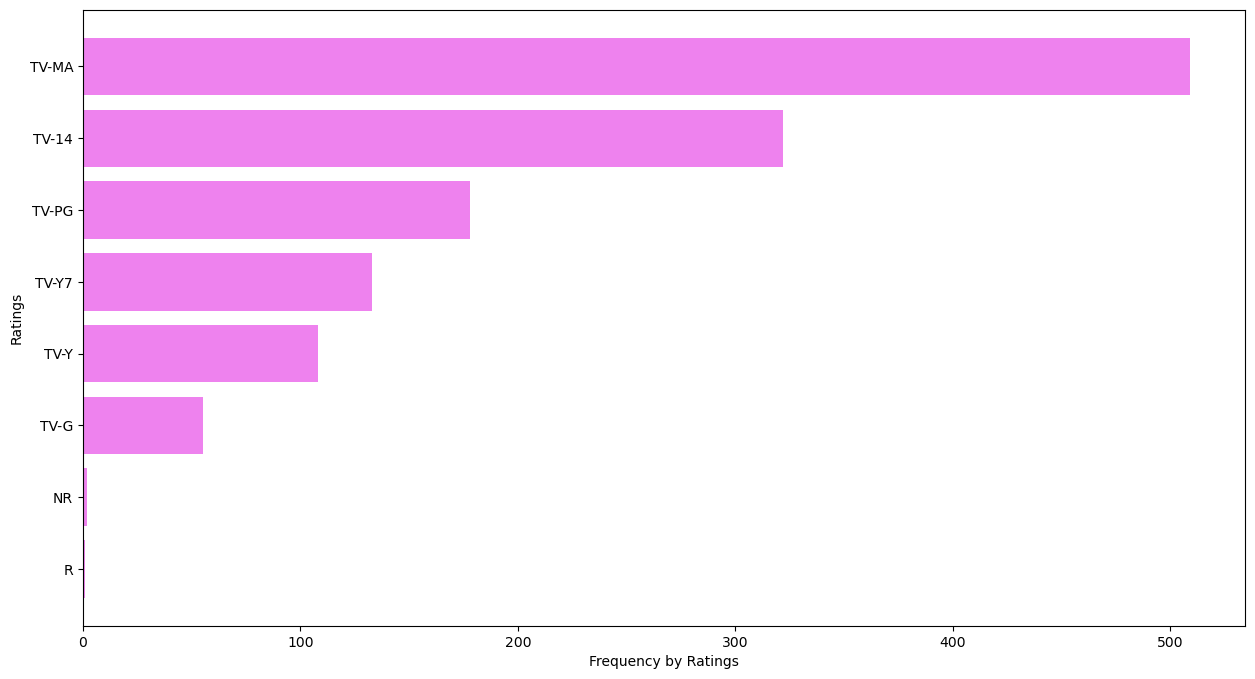

In [90]:
df_rating=df_usa_shows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

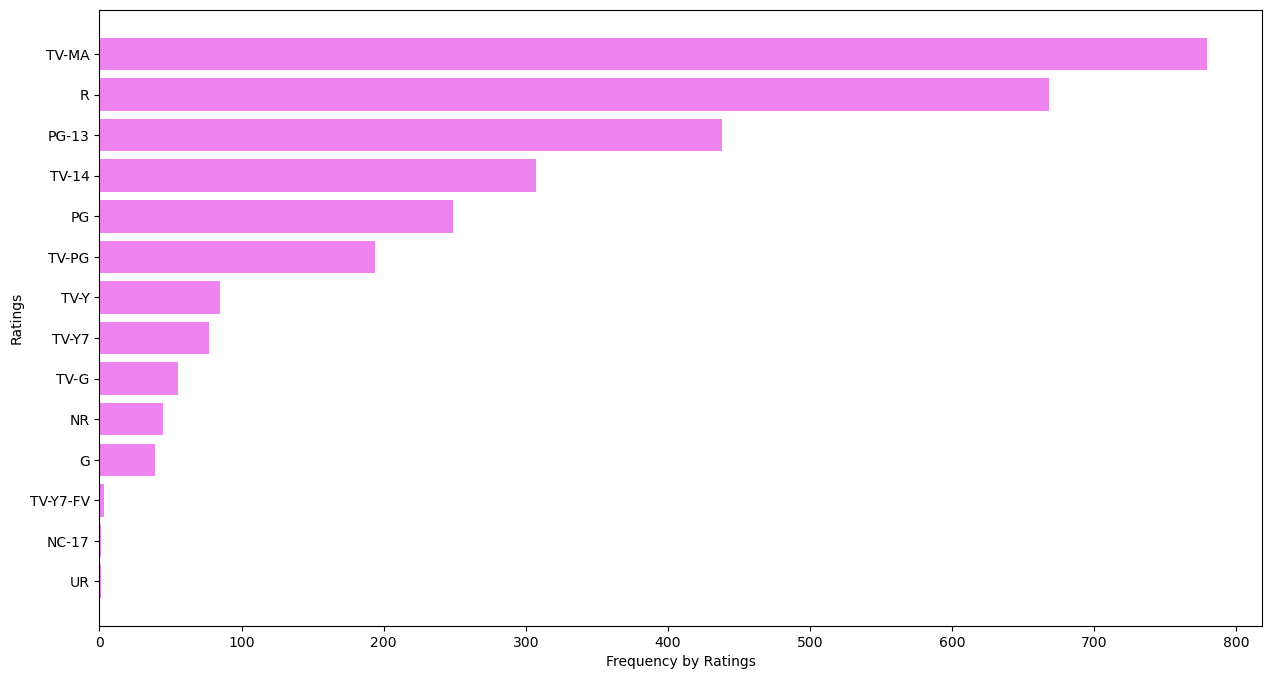

In [91]:
df_rating=df_usa_movies.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

So it seems plaussible to conclude that the popular ratings across Netflix includes Mature Audiences and those appropriate for over 14/over 17 ages in both Movies and TV Shows in USA

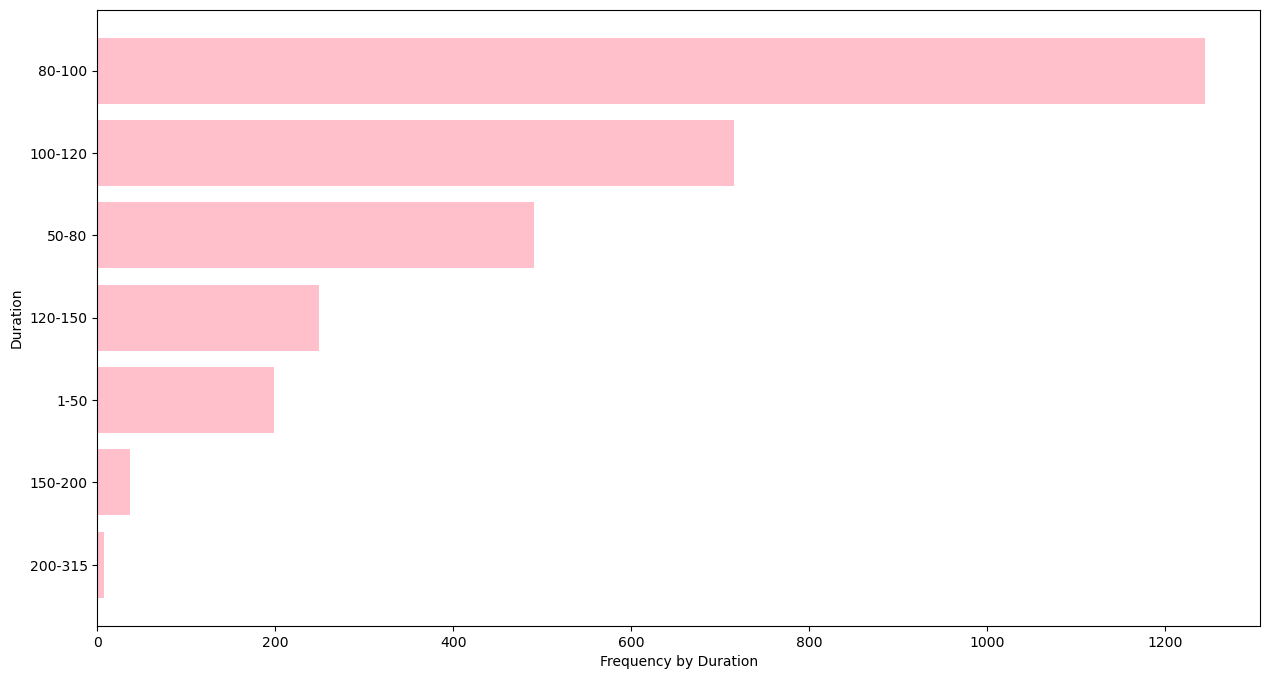

In [92]:
df_duration=df_usa_movies.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'],color=['pink'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

Across movies 80-100,100-120 is the ranges of minutes for which most movies lie. So quite possibly 80-120 mins is the sweet spot we would be wanting for movies in USA

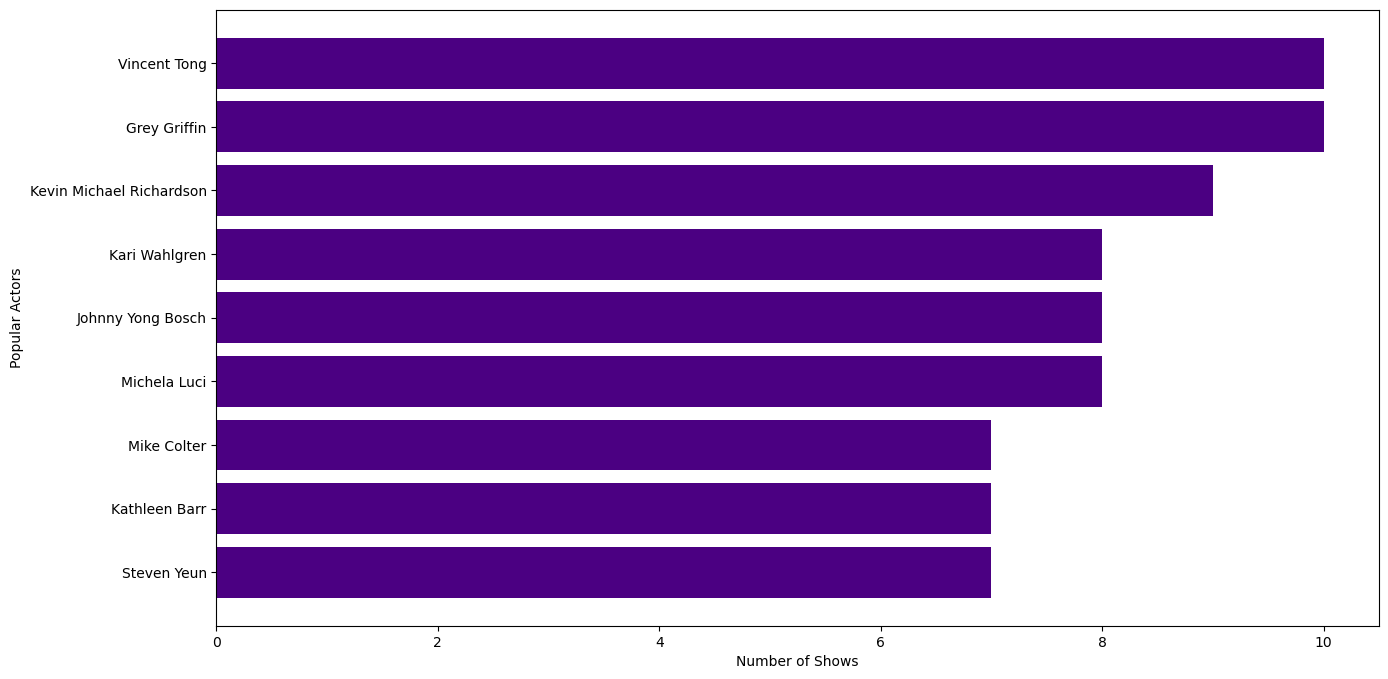

In [93]:
df_actors=df_usa_shows.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_actors=df_actors[df_actors['Actors']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actors')
plt.show()

Vincent Tong,Grey Griffin and Kevin Richardson are the most popular actors across TV Shows in USA

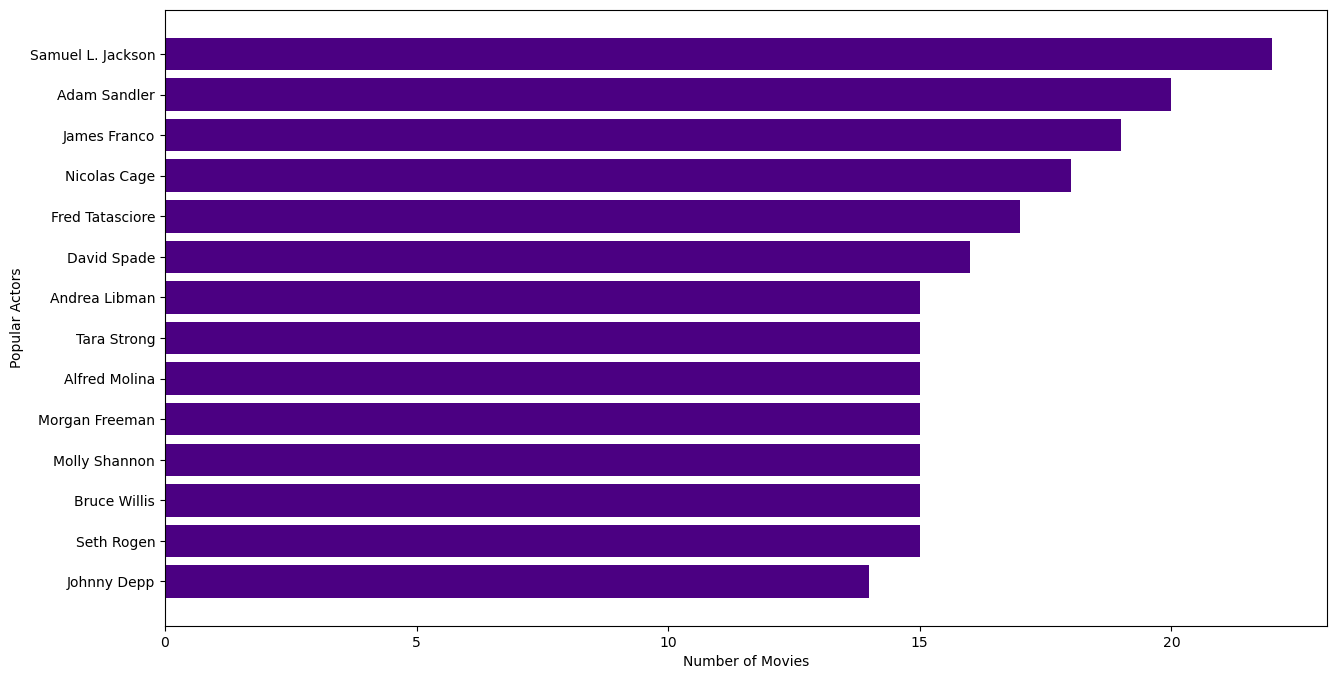

In [94]:
df_actors=df_usa_movies.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_actors=df_actors[df_actors['Actors']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

Samuel Jackson,Adam Sandler,James Franco and Nicolas Cage are very much popular across movies on Netflix in USA

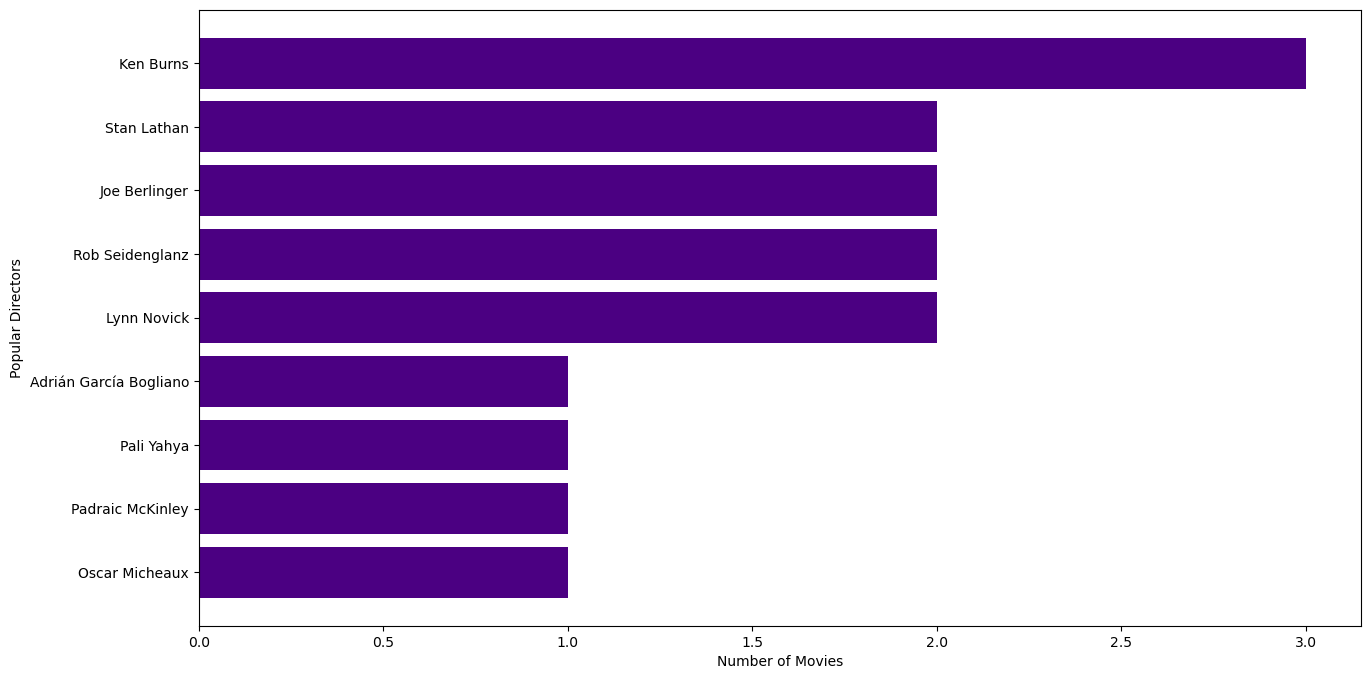

In [95]:
df_directors=df_usa_shows.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_directors=df_directors[df_directors['Directors']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['Directors'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

Ken Burns,Stan Lathan, Joe Barlinger are popular directors across TV Shows on Netflix in USA

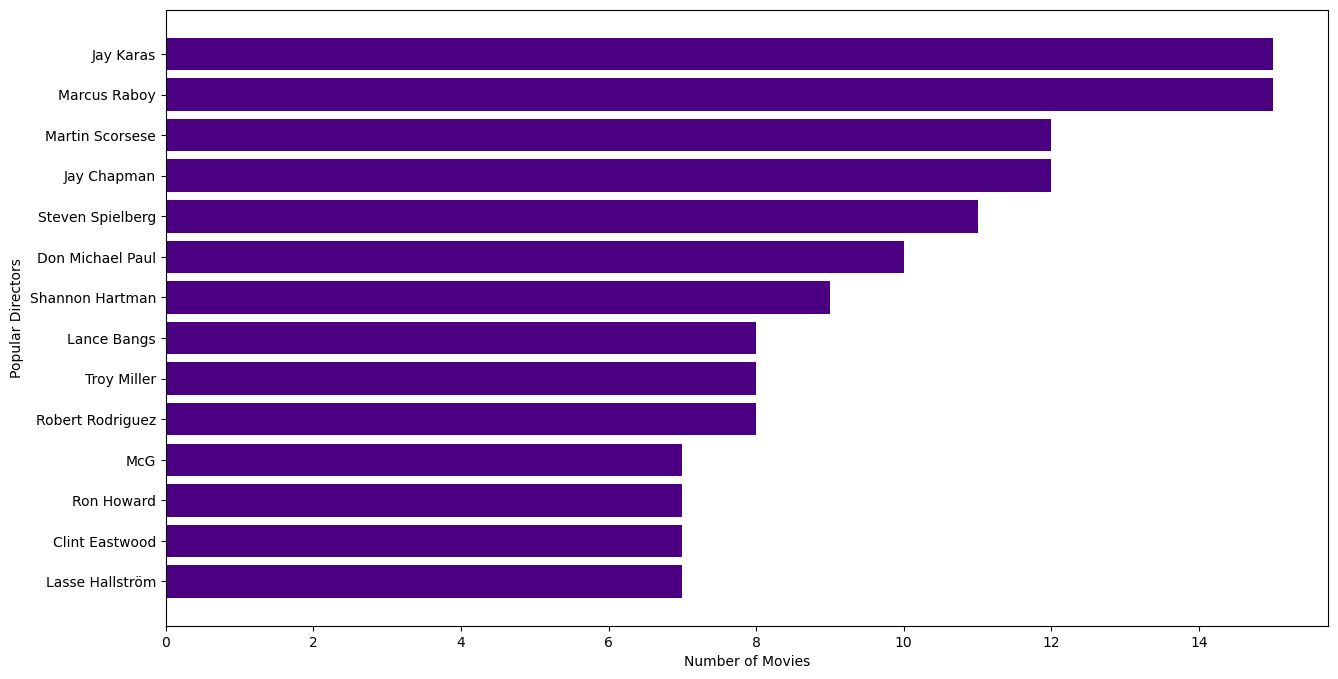

In [96]:
df_directors=df_usa_movies.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_directors=df_directors[df_directors['Directors']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['Directors'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

Jay Karas,Marcus Raboy,Martin Scorcese and Jay Chapman are popular directors across movies in USA

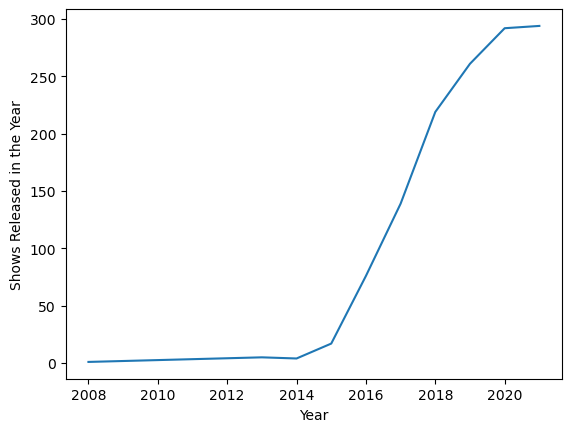

In [97]:
df_year=df_usa_shows.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Shows Released in the Year")
plt.xlabel("Year")
plt.show()

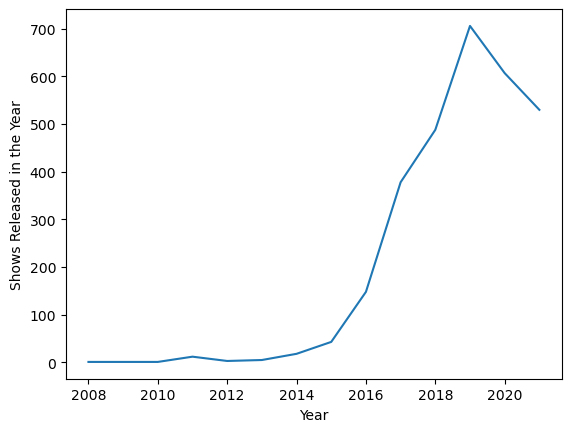

In [98]:
df_year=df_usa_movies.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Shows Released in the Year")
plt.xlabel("Year")
plt.show()

In USA, number of shows remained the same in 2021 as they were in 2020 while number of movies declined:

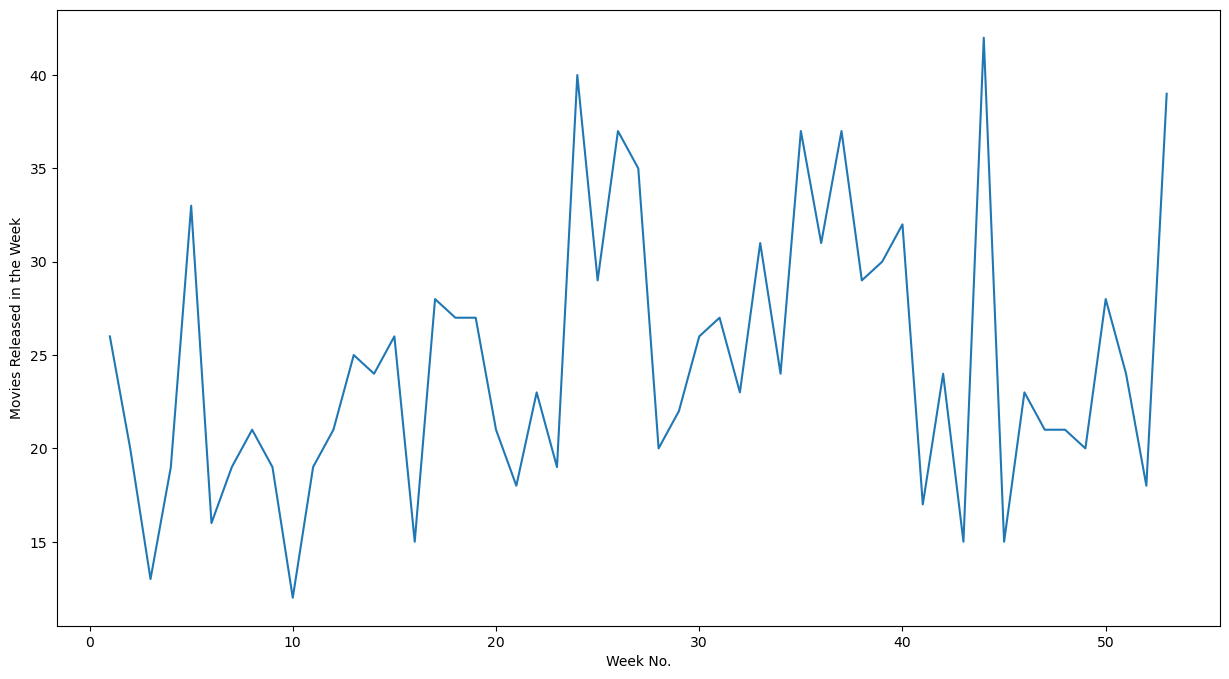

In [99]:
df_week=df_usa_shows.groupby(['week_Added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=df_week, x='week_Added', y='title')
plt.ylabel("Movies Released in the Week")
plt.xlabel("Week No.")
plt.show()

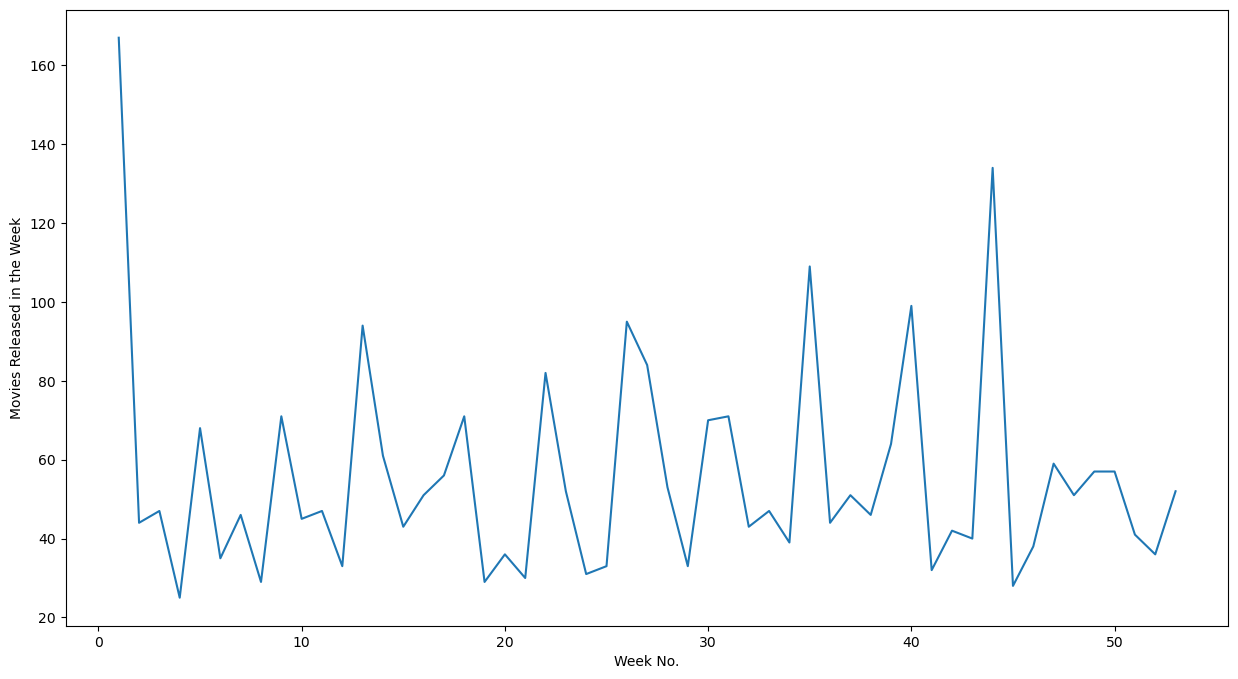

In [100]:
df_week=df_usa_movies.groupby(['week_Added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=df_week, x='week_Added', y='title')
plt.ylabel("Movies Released in the Week")
plt.xlabel("Week No.")
plt.show()

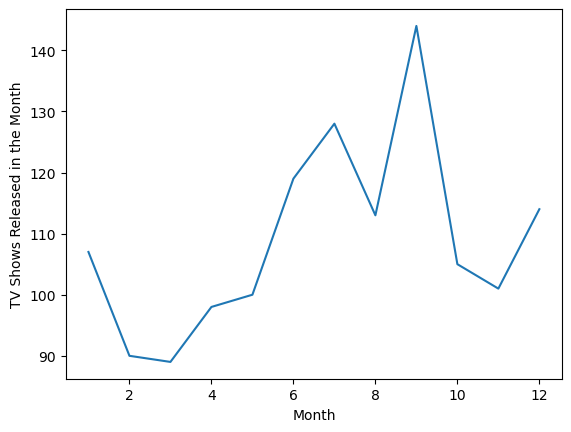

In [101]:
df_month=df_usa_shows.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("TV Shows Released in the Month")
plt.xlabel("Month")
plt.show()

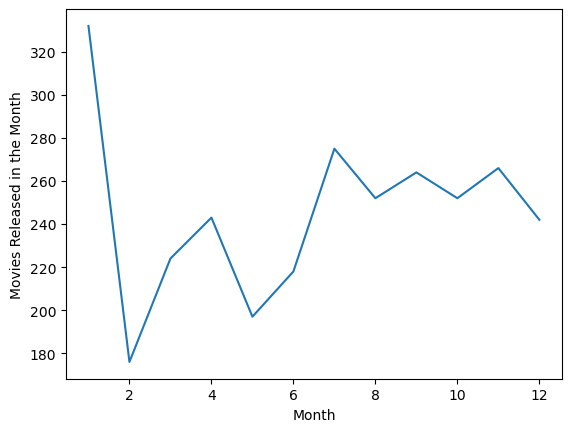

In [102]:
df_month=df_usa_movies.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("Movies Released in the Month")
plt.xlabel("Month")
plt.show()

TV Shows are added in Netflix by a tremendous amount in July and September in USA

Movies are added in Netflix in USA by a tremendous amount in first week/last month of current year and first month of next year

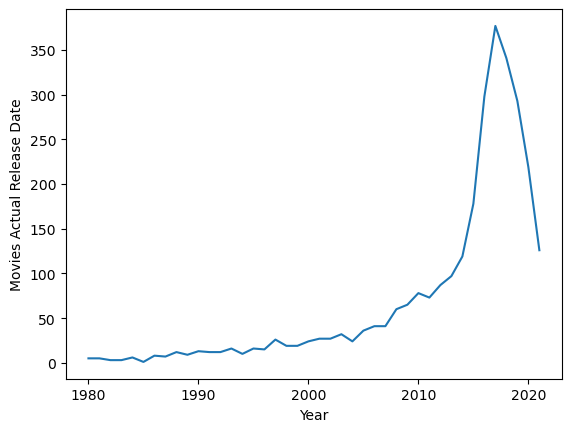

In [103]:
df_release_year=df_usa_movies[df_usa_movies['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

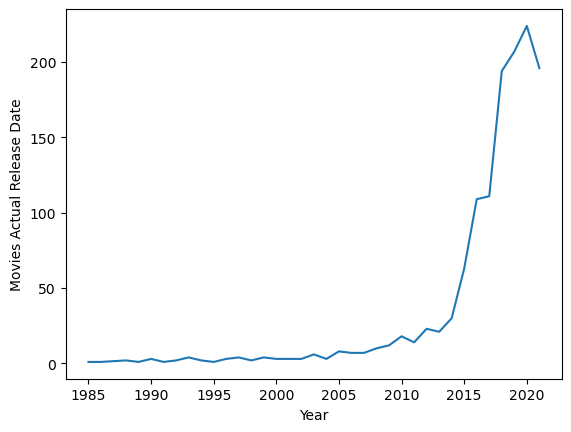

In [104]:
df_release_year=df_usa_shows[df_usa_shows['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

In USA, though both Movies and Shows have reduced in 2021, the amount of decrease in number of TV Shows is small as compared to Movies

In [105]:
#Analysing a combination of actors and directors
df_usa_movies['Actor_Director_Combination'] = df_usa_movies.Actors.str.cat(df_usa_movies.Directors, sep=' and ')
df_usa_movies_subset=df_usa_movies[df_usa_movies['Actors']!='Unknown Actor']
df_usa_movies_subset=df_usa_movies_subset[df_usa_movies_subset['Directors']!='Unknown Director']
df_usa_movies_subset.head()

title           Actors       Directors  \
159  My Little Pony: A New Generation  Vanessa Hudgens   Robert Cullen   
160  My Little Pony: A New Generation  Vanessa Hudgens  José Luis Ucha   
161  My Little Pony: A New Generation     Kimiko Glenn   Robert Cullen   
162  My Little Pony: A New Generation     Kimiko Glenn  José Luis Ucha   
163  My Little Pony: A New Generation    James Marsden   Robert Cullen   

                        Genre        country show_id   type  \
159  Children & Family Movies  United States      s7  Movie   
160  Children & Family Movies  United States      s7  Movie   
161  Children & Family Movies  United States      s7  Movie   
162  Children & Family Movies  United States      s7  Movie   
163  Children & Family Movies  United States      s7  Movie   

             date_added  release_year rating duration Modified_Added_date  \
159  September 24, 2021          2021     PG   80-100          2021-09-24   
160  September 24, 2021          2021     PG   80-100          2021-09-24   
161  September 24, 2021          2021     PG   80-100          2021-09-24   
162  September 24, 2021          2021     PG   80-100          2021-09-24   
163  September 24, 2021          2021     PG   80-100          2021-09-24   

     month_added  week_Added  year          Actor_Director_Combination  
159            9          38  2021   Vanessa Hudgens and Robert Cullen  
160            9          38  2021  Vanessa Hudgens and José Luis Ucha  
161            9          38  2021      Kimiko Glenn and Robert Cullen  
162            9          38  2021     Kimiko Glenn and José Luis Ucha  
163            9          38  2021     James Marsden and Robert Cullen

In [106]:
#Analysing a combination of actors and directors
df_usa_movies['Actor_Director_Combination'] = df_usa_movies.Actors.str.cat(df_usa_movies.Directors, sep=' and ')
df_usa_movies_subset=df_usa_movies[df_usa_movies['Actors']!='Unknown Actor']
df_usa_movies_subset=df_usa_movies_subset[df_usa_movies_subset['Directors']!='Unknown Director']
df_usa_movies_subset.head()

title           Actors       Directors  \
159  My Little Pony: A New Generation  Vanessa Hudgens   Robert Cullen   
160  My Little Pony: A New Generation  Vanessa Hudgens  José Luis Ucha   
161  My Little Pony: A New Generation     Kimiko Glenn   Robert Cullen   
162  My Little Pony: A New Generation     Kimiko Glenn  José Luis Ucha   
163  My Little Pony: A New Generation    James Marsden   Robert Cullen   

                        Genre        country show_id   type  \
159  Children & Family Movies  United States      s7  Movie   
160  Children & Family Movies  United States      s7  Movie   
161  Children & Family Movies  United States      s7  Movie   
162  Children & Family Movies  United States      s7  Movie   
163  Children & Family Movies  United States      s7  Movie   

             date_added  release_year rating duration Modified_Added_date  \
159  September 24, 2021          2021     PG   80-100          2021-09-24   
160  September 24, 2021          2021     PG   80-100          2021-09-24   
161  September 24, 2021          2021     PG   80-100          2021-09-24   
162  September 24, 2021          2021     PG   80-100          2021-09-24   
163  September 24, 2021          2021     PG   80-100          2021-09-24   

     month_added  week_Added  year          Actor_Director_Combination  
159            9          38  2021   Vanessa Hudgens and Robert Cullen  
160            9          38  2021  Vanessa Hudgens and José Luis Ucha  
161            9          38  2021      Kimiko Glenn and Robert Cullen  
162            9          38  2021     Kimiko Glenn and José Luis Ucha  
163            9          38  2021     James Marsden and Robert Cullen

In [107]:
df_usa_shows['Actor_Director_Combination'] = df_usa_shows.Actors.str.cat(df_usa_shows.Directors, sep=' and ')
df_usa_shows_subset=df_usa_shows[df_usa_shows['Actors']!='Unknown Actor']
df_usa_shows_subset=df_usa_shows_subset[df_usa_shows_subset['Directors']!='Unknown Director']
df_usa_shows_subset.head()

title        Actors      Directors         Genre        country  \
111  Midnight Mass   Kate Siegel  Mike Flanagan     TV Dramas  United States   
112  Midnight Mass   Kate Siegel  Mike Flanagan     TV Horror  United States   
113  Midnight Mass   Kate Siegel  Mike Flanagan  TV Mysteries  United States   
114  Midnight Mass  Zach Gilford  Mike Flanagan     TV Dramas  United States   
115  Midnight Mass  Zach Gilford  Mike Flanagan     TV Horror  United States   

    show_id     type          date_added  release_year rating  duration  \
111      s6  TV Show  September 24, 2021          2021  TV-MA  1 Season   
112      s6  TV Show  September 24, 2021          2021  TV-MA  1 Season   
113      s6  TV Show  September 24, 2021          2021  TV-MA  1 Season   
114      s6  TV Show  September 24, 2021          2021  TV-MA  1 Season   
115      s6  TV Show  September 24, 2021          2021  TV-MA  1 Season   

    Modified_Added_date  month_added  week_Added  year  \
111          2021-09-24            9          38  2021   
112          2021-09-24            9          38  2021   
113          2021-09-24            9          38  2021   
114          2021-09-24            9          38  2021   
115          2021-09-24            9          38  2021   

         Actor_Director_Combination  
111   Kate Siegel and Mike Flanagan  
112   Kate Siegel and Mike Flanagan  
113   Kate Siegel and Mike Flanagan  
114  Zach Gilford and Mike Flanagan  
115  Zach Gilford and Mike Flanagan

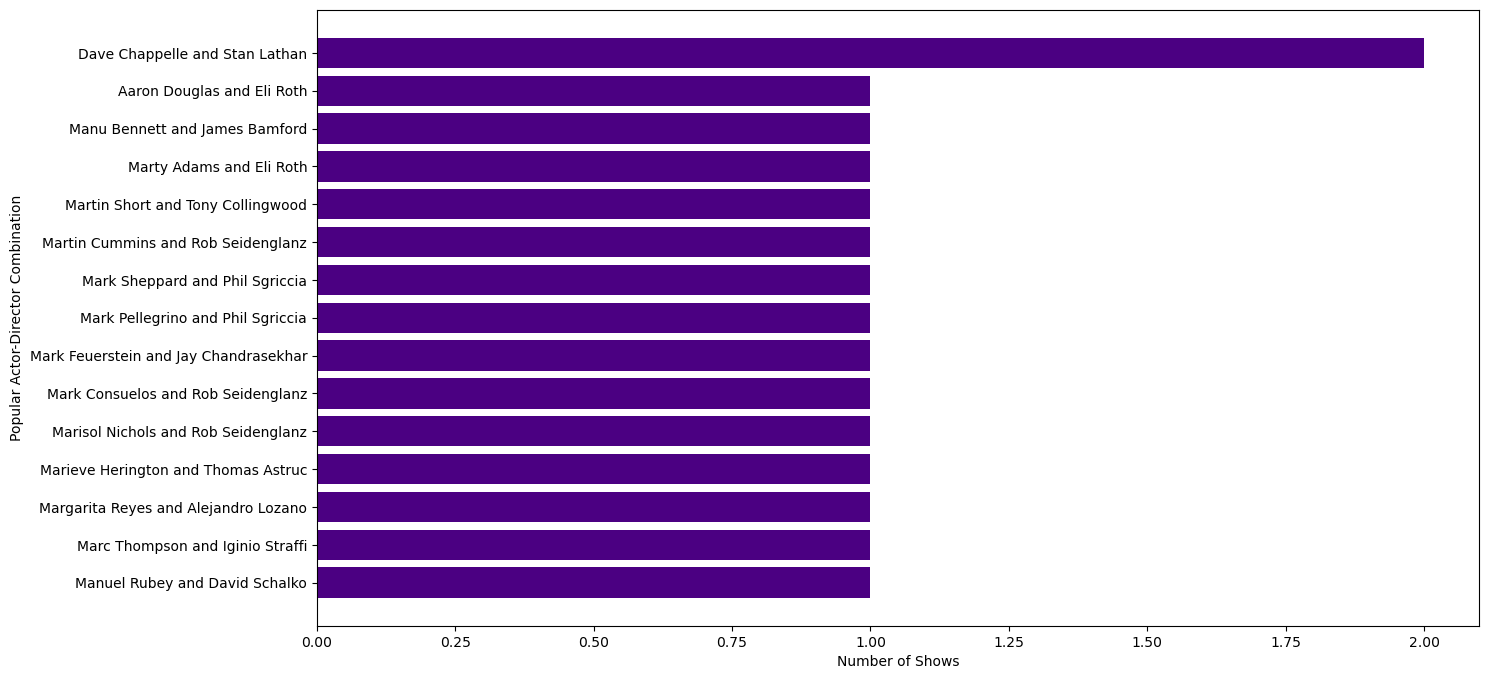

In [108]:
df_actors_directors=df_usa_shows_subset.groupby(['Actor_Director_Combination']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_actors_directors[::-1]['Actor_Director_Combination'], df_actors_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actor-Director Combination')
plt.show()

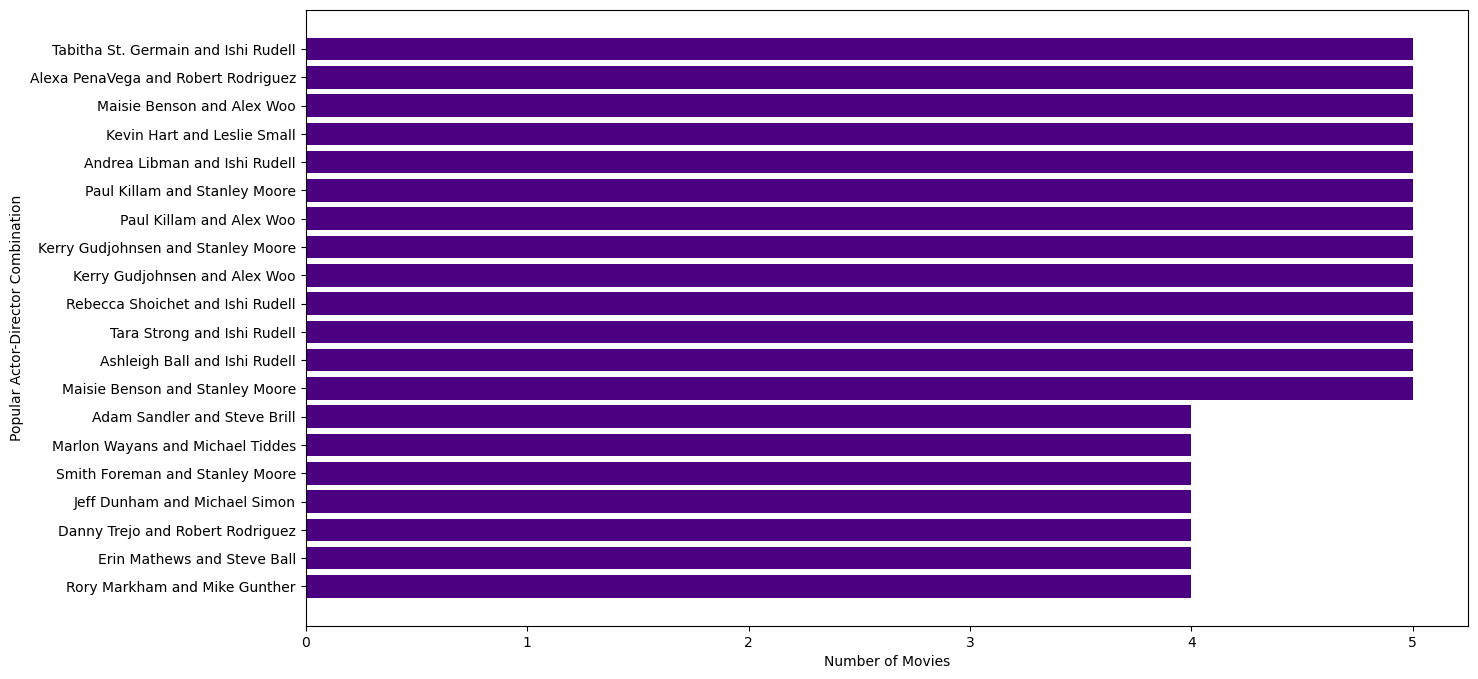

In [109]:
df_actors_directors=df_usa_movies_subset.groupby(['Actor_Director_Combination']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:20]
plt.figure(figsize=(15,8))
plt.barh(df_actors_directors[::-1]['Actor_Director_Combination'], df_actors_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actor-Director Combination')
plt.show()

In [110]:
df_actors_directors[::-1]['Actor_Director_Combination'].values

array(['Rory Markham and Mike Gunther', 'Erin Mathews and Steve Ball',
       'Danny Trejo and Robert Rodriguez',
       'Jeff Dunham and Michael Simon', 'Smith Foreman and Stanley Moore',
       'Marlon Wayans and Michael Tiddes', 'Adam Sandler and Steve Brill',
       'Maisie Benson and Stanley Moore', 'Ashleigh Ball and Ishi Rudell',
       'Tara Strong and Ishi Rudell', 'Rebecca Shoichet and Ishi Rudell',
       'Kerry Gudjohnsen and Alex Woo',
       'Kerry Gudjohnsen and Stanley Moore', 'Paul Killam and Alex Woo',
       'Paul Killam and Stanley Moore', 'Andrea Libman and Ishi Rudell',
       'Kevin Hart and Leslie Small', 'Maisie Benson and Alex Woo',
       'Alexa PenaVega and Robert Rodriguez',
       'Tabitha St. Germain and Ishi Rudell'], dtype=object)

### Univariate Analysis separately for shows and movies in India

In [111]:
#Analyzing India for both shows and movies
df_india_shows=df_final1[df_final1['country']=='India'][df_final1[df_final1['country']=='India']['type']=='TV Show']
df_india_movies=df_final1[df_final1['country']=='India'][df_final1[df_final1['country']=='India']['type']=='Movie']

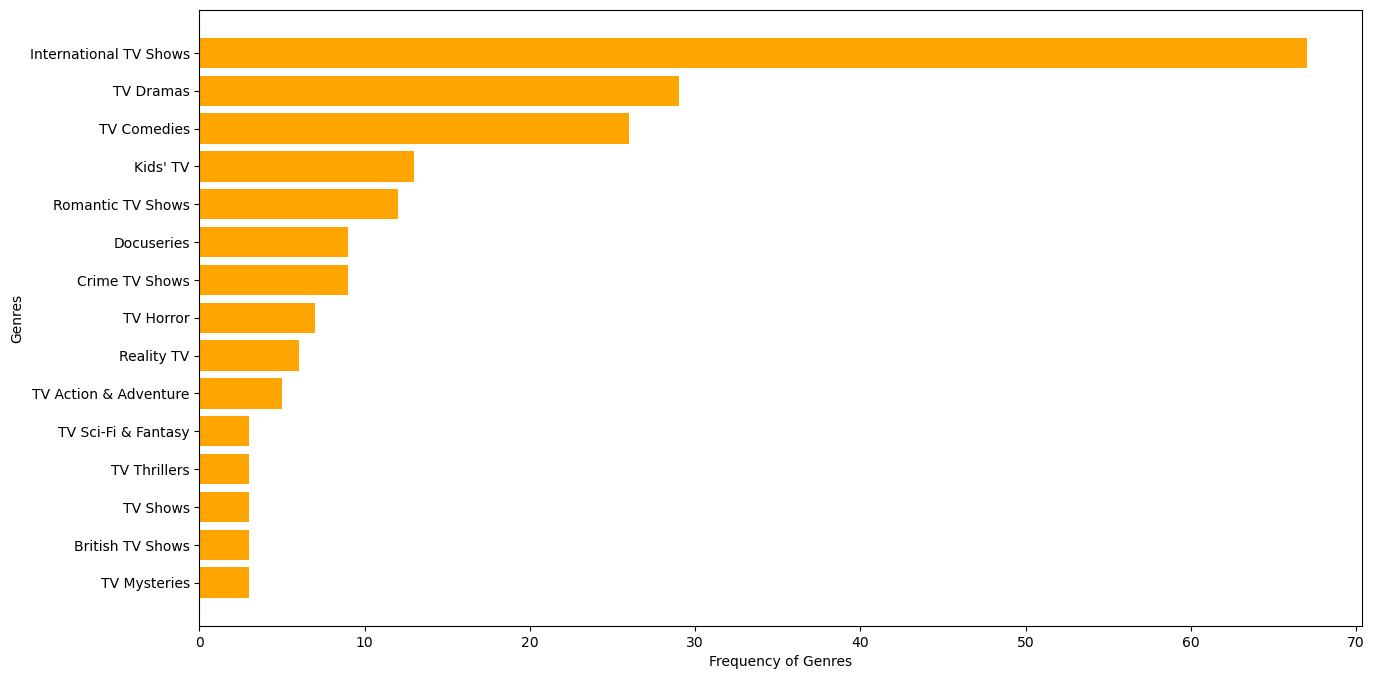

In [112]:
df_genre=df_india_shows.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

Dramas,Comedy, Kids 'TV Shows and International TV Shows Genres are popular in TV Series in India

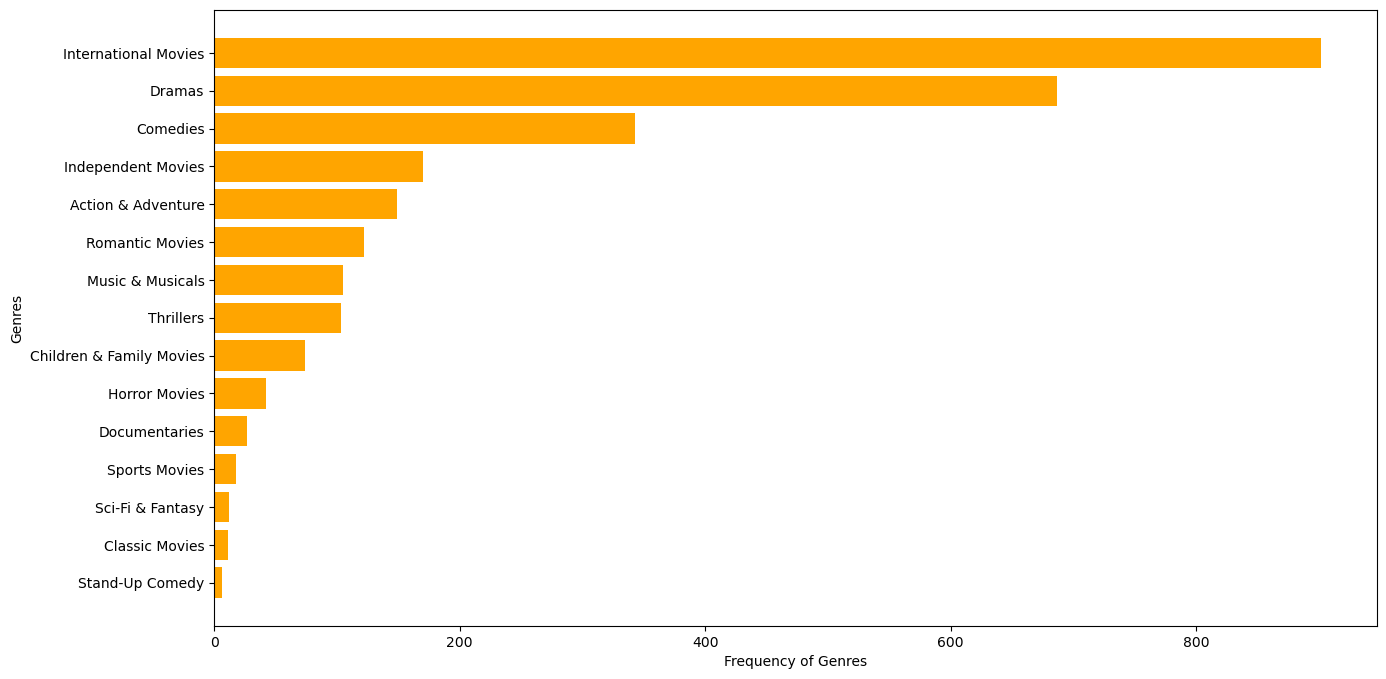

In [113]:
df_genre=df_india_movies.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

International Movies,Drama,Comedy,Indpeendent Movies and Action, Romance Genres are prevalent in India

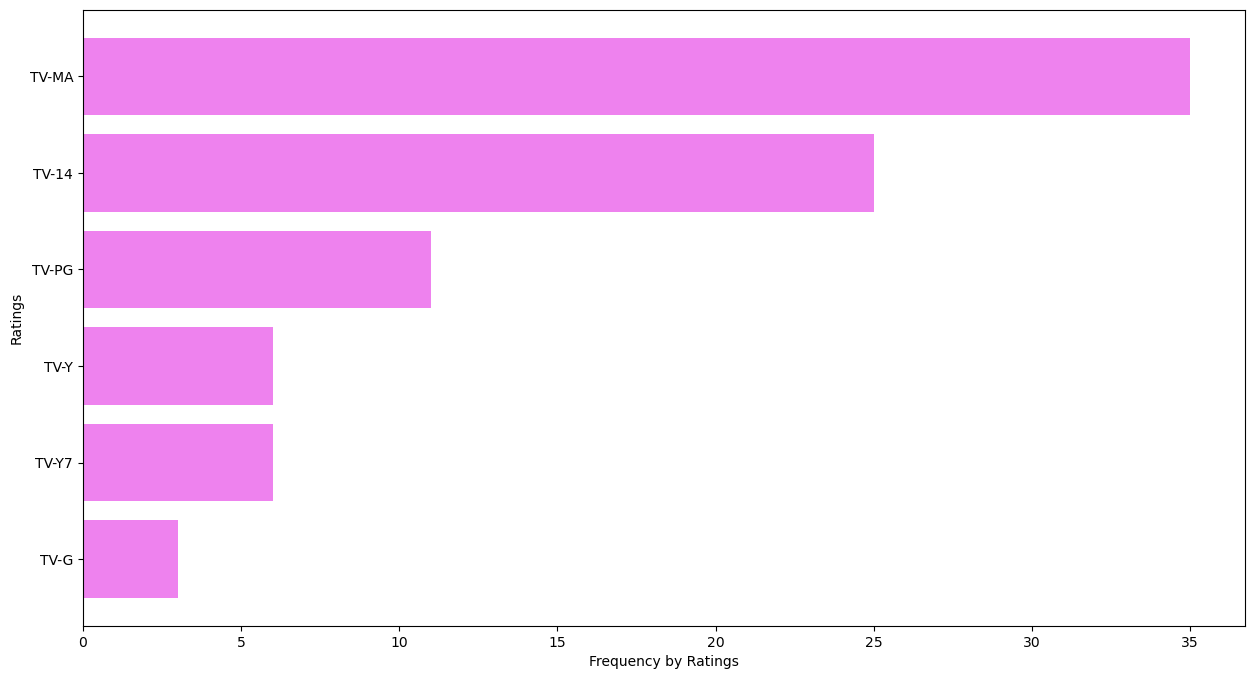

In [114]:
df_rating=df_india_shows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

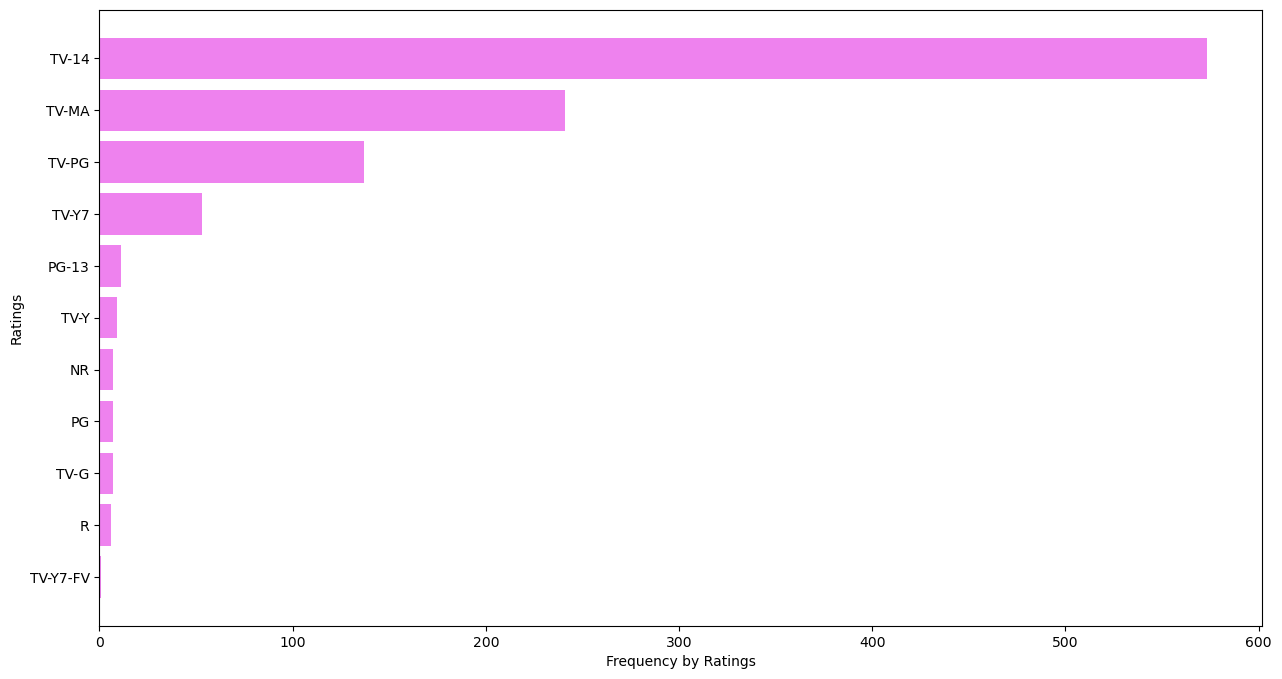

In [115]:
df_rating=df_india_movies.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

So it seems plaussible to conclude that the popular ratings across Netflix includes Mature Audiences in TV Shows and those appropriate for people over 14 in Movies in India.

Now this indeed seems to be the case. Indian TV Shows in Netflix are without a shadow of doubt intended for Mature Audiences while Movies for over 14 years of age.

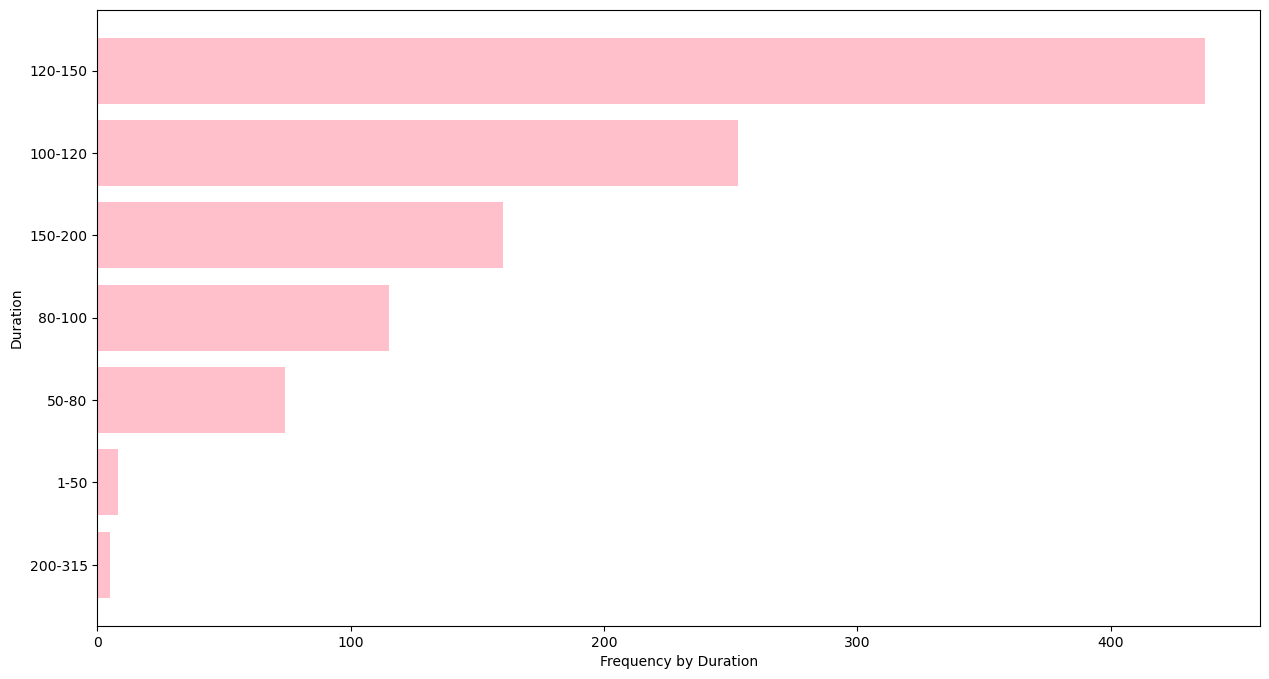

In [116]:
df_duration=df_india_movies.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'],color=['pink'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

Across movies ranges of minutes in India are comparatively greater than USA with a sweet spot at 120-150 mins.

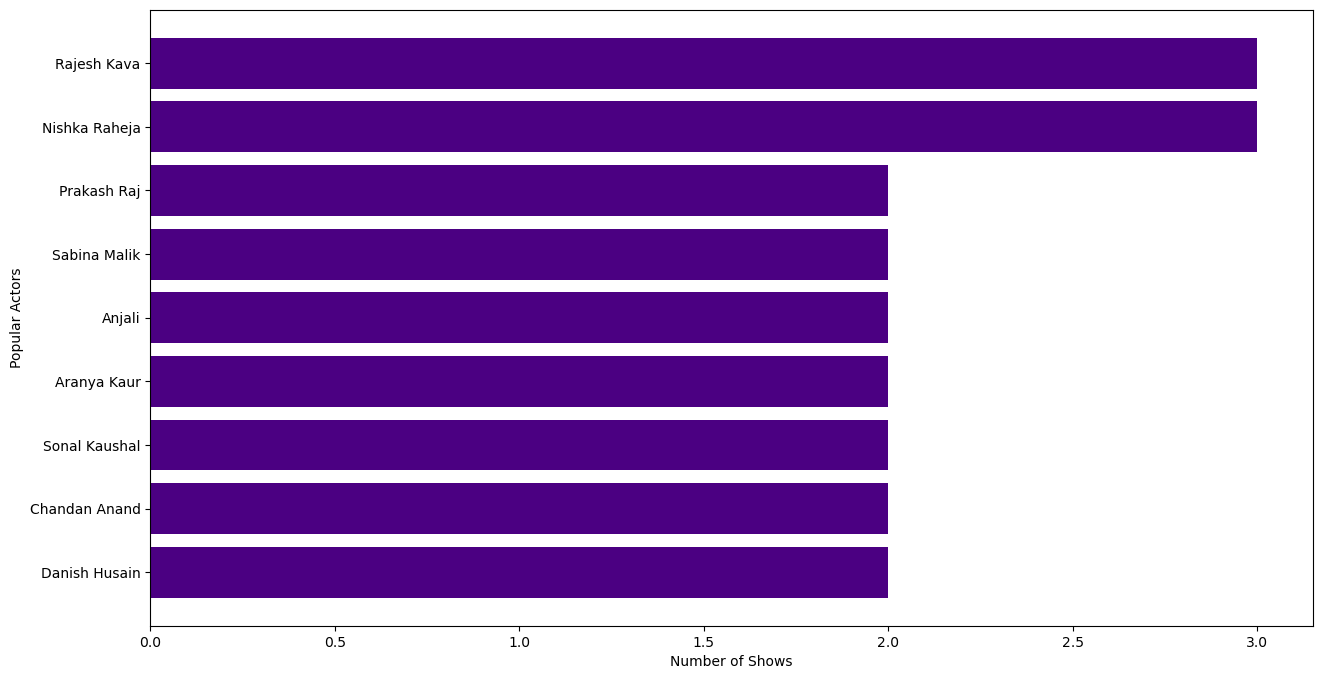

In [117]:
df_actors=df_india_shows.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_actors=df_actors[df_actors['Actors']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actors')
plt.show()

In [118]:
df_actors['Actors'].values

array(['Rajesh Kava', 'Nishka Raheja', 'Prakash Raj', 'Sabina Malik',
       'Anjali', 'Aranya Kaur', 'Sonal Kaushal', 'Chandan Anand',
       'Danish Husain'], dtype=object)

**Popular Actors in TV Shows in India are:-**
'Rajesh Kava', 'Nishka Raheja', 'Prakash Raj', 'Sabina Malik',
       'Anjali', 'Aranya Kaur', 'Sonal Kaushal', 'Chandan Anand',
       'Danish Husain'

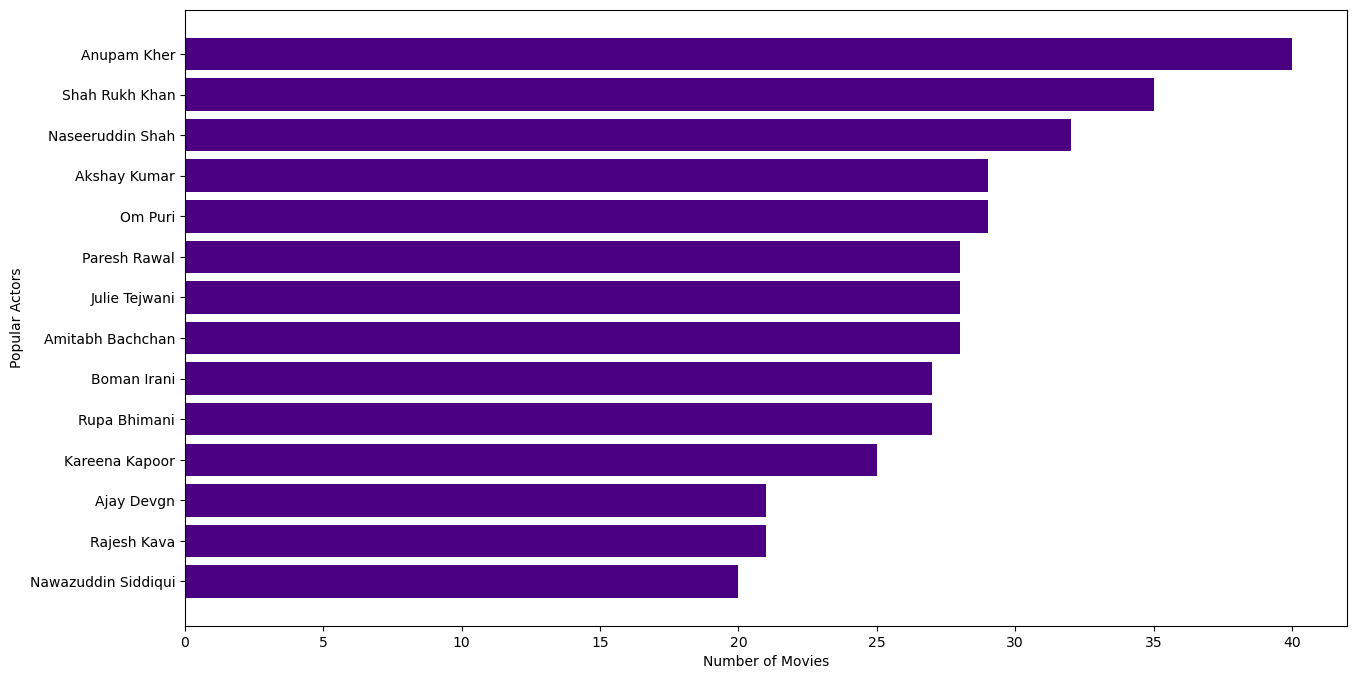

In [119]:
df_actors=df_india_movies.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_actors=df_actors[df_actors['Actors']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

In [120]:
df_actors['Actors'].values

array(['Anupam Kher', 'Shah Rukh Khan', 'Naseeruddin Shah',
       'Akshay Kumar', 'Om Puri', 'Paresh Rawal', 'Julie Tejwani',
       'Amitabh Bachchan', 'Boman Irani', 'Rupa Bhimani',
       'Kareena Kapoor', 'Ajay Devgn', 'Rajesh Kava',
       'Nawazuddin Siddiqui'], dtype=object)

**Popular Actors in TV Shows in India are:-**
'Anupam Kher', 'Shah Rukh Khan', 'Naseeruddin Shah',
       'Akshay Kumar', 'Om Puri', 'Paresh Rawal', 'Julie Tejwani',
       'Amitabh Bachchan', 'Boman Irani', 'Rupa Bhimani',
       'Kareena Kapoor', 'Ajay Devgn', 'Rajesh Kava',
       'Nawazuddin Siddiqui'

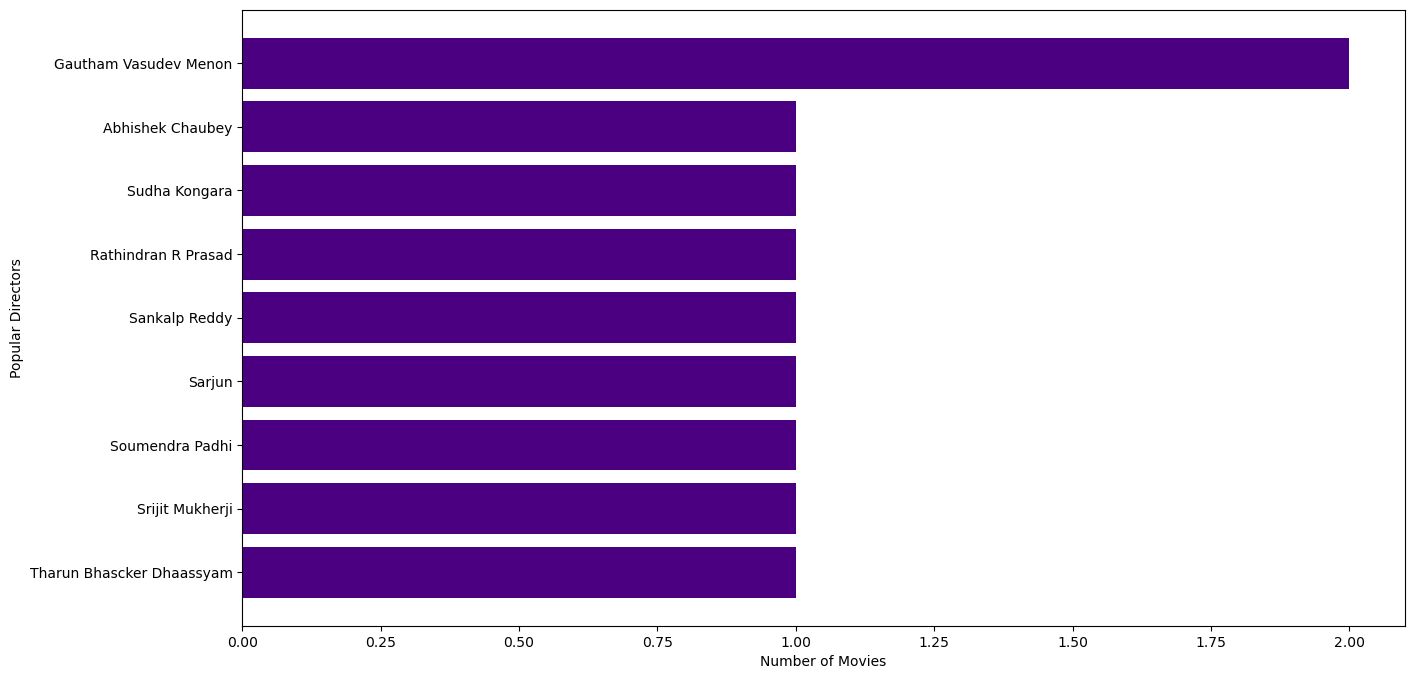

In [130]:
df_directors=df_india_shows.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_directors=df_directors[df_directors['Directors']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['Directors'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

In [131]:
df_directors['Directors'].values

array(['Gautham Vasudev Menon', 'Abhishek Chaubey', 'Sudha Kongara',
       'Rathindran R Prasad', 'Sankalp Reddy', 'Sarjun',
       'Soumendra Padhi', 'Srijit Mukherji', 'Tharun Bhascker Dhaassyam'],
      dtype=object)

**Popular Directors Across Movies in India:-**
'Gautham Vasudev Menon', 'Abhishek Chaubey', 'Sudha Kongara',
       'Rathindran R Prasad', 'Sankalp Reddy', 'Sarjun',
       'Soumendra Padhi', 'Srijit Mukherji', 'Tharun Bhascker Dhaassyam'

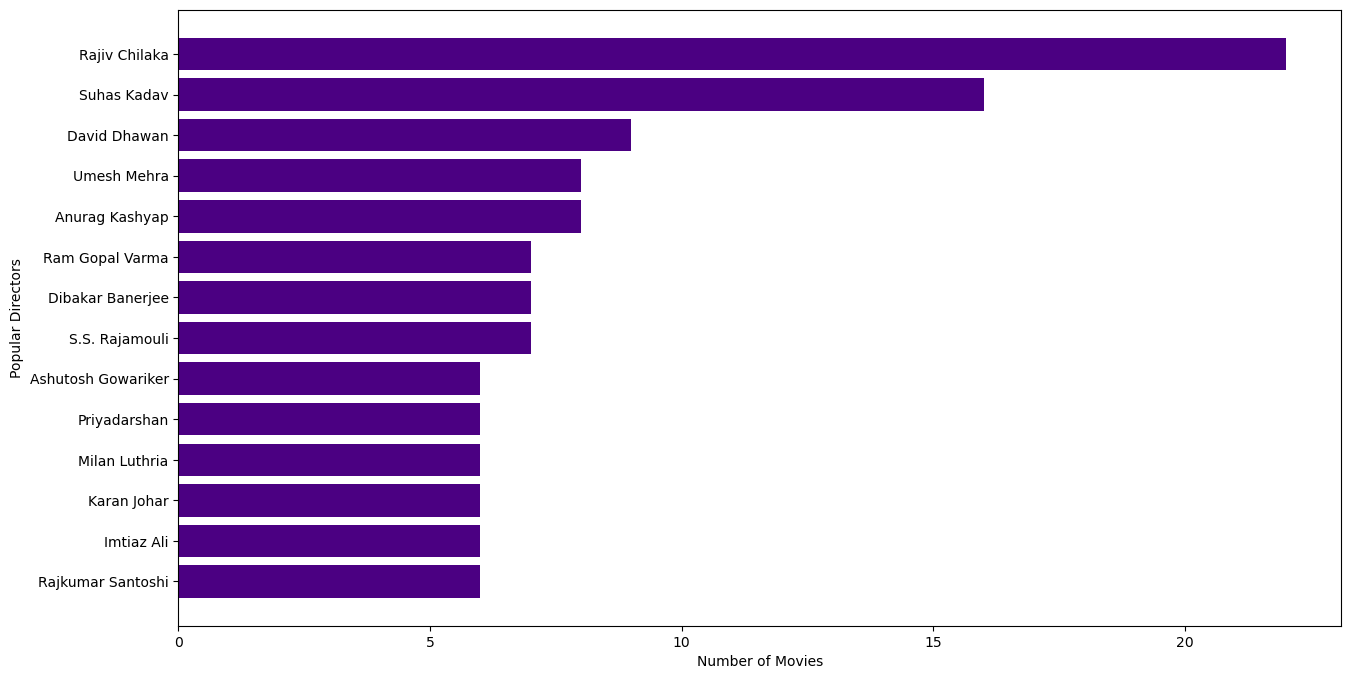

In [132]:
df_directors=df_india_movies.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_directors=df_directors[df_directors['Directors']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['Directors'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

In [133]:
df_directors['Directors'].values

array(['Rajiv Chilaka', 'Suhas Kadav', 'David Dhawan', 'Umesh Mehra',
       'Anurag Kashyap', 'Ram Gopal Varma', 'Dibakar Banerjee',
       'S.S. Rajamouli', 'Ashutosh Gowariker', 'Priyadarshan',
       'Milan Luthria', 'Karan Johar', 'Imtiaz Ali', 'Rajkumar Santoshi'],
      dtype=object)

**Popular directors across movies in India:-**
'Rajiv Chilaka', 'Suhas Kadav', 'David Dhawan', 'Umesh Mehra',
       'Anurag Kashyap', 'Ram Gopal Varma', 'Dibakar Banerjee',
       'S.S. Rajamouli', 'Ashutosh Gowariker', 'Priyadarshan',
       'Milan Luthria', 'Karan Johar', 'Imtiaz Ali', 'Rajkumar Santoshi'

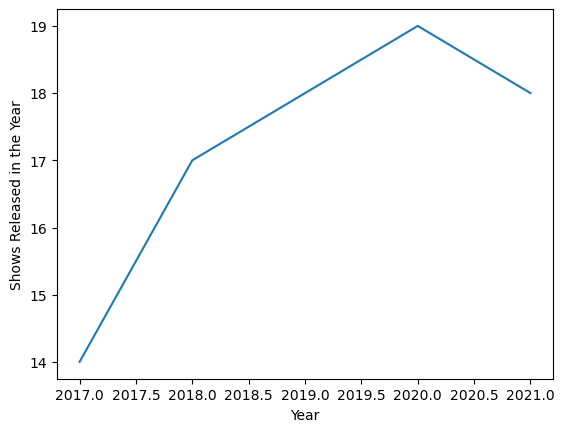

In [134]:
df_year=df_india_shows.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Shows Released in the Year")
plt.xlabel("Year")
plt.show()

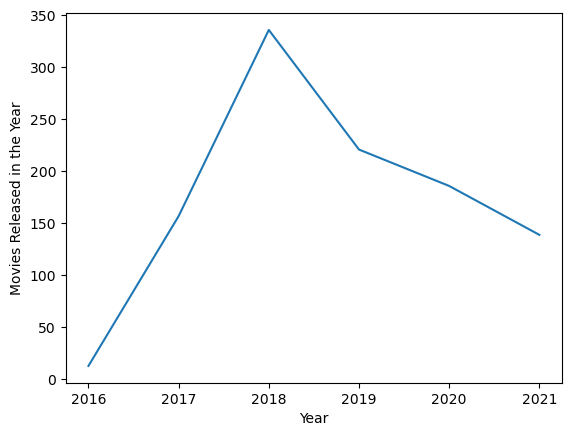

In [135]:
df_year=df_india_movies.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.show()

In India,TV Shows were increasingly being added till 2020, though the addition of shows reduced in 2021.

In India, Movies were increasingly added till 2018 but it has been a huge downhill since then. Now that's preposterous, since and soemthing has to be recommended to the Netflix Team with regards to that.

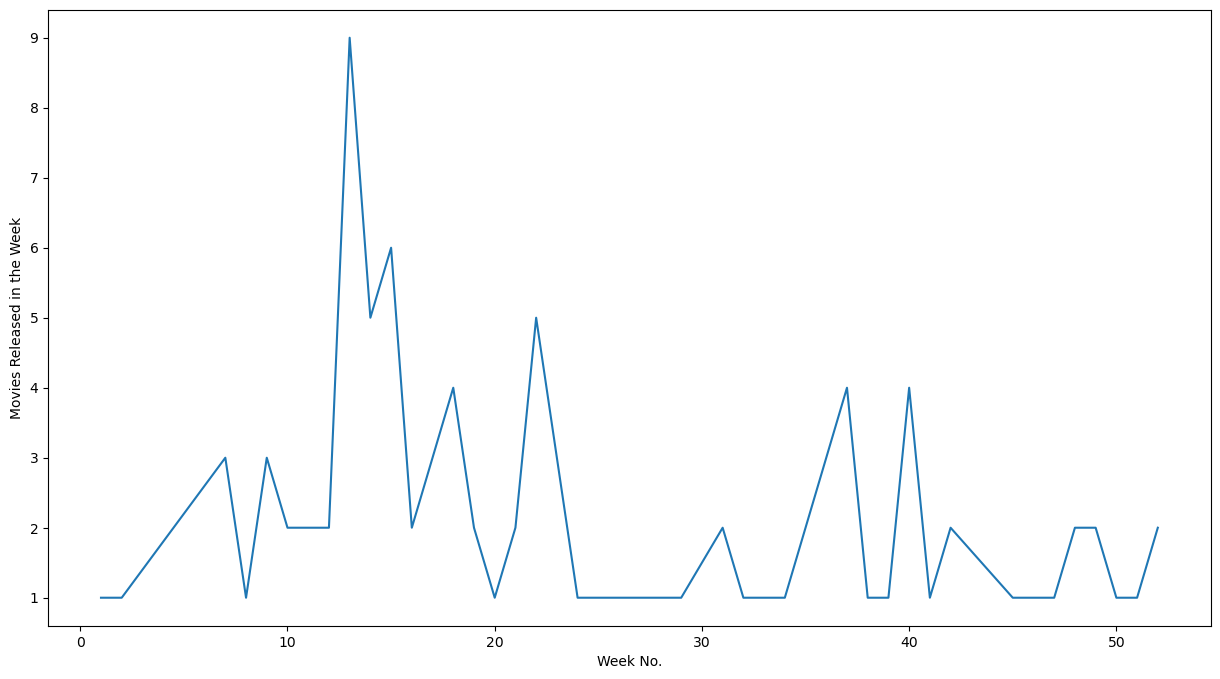

In [136]:
df_week=df_india_shows.groupby(['week_Added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=df_week, x='week_Added', y='title')
plt.ylabel("Movies Released in the Week")
plt.xlabel("Week No.")
plt.show()

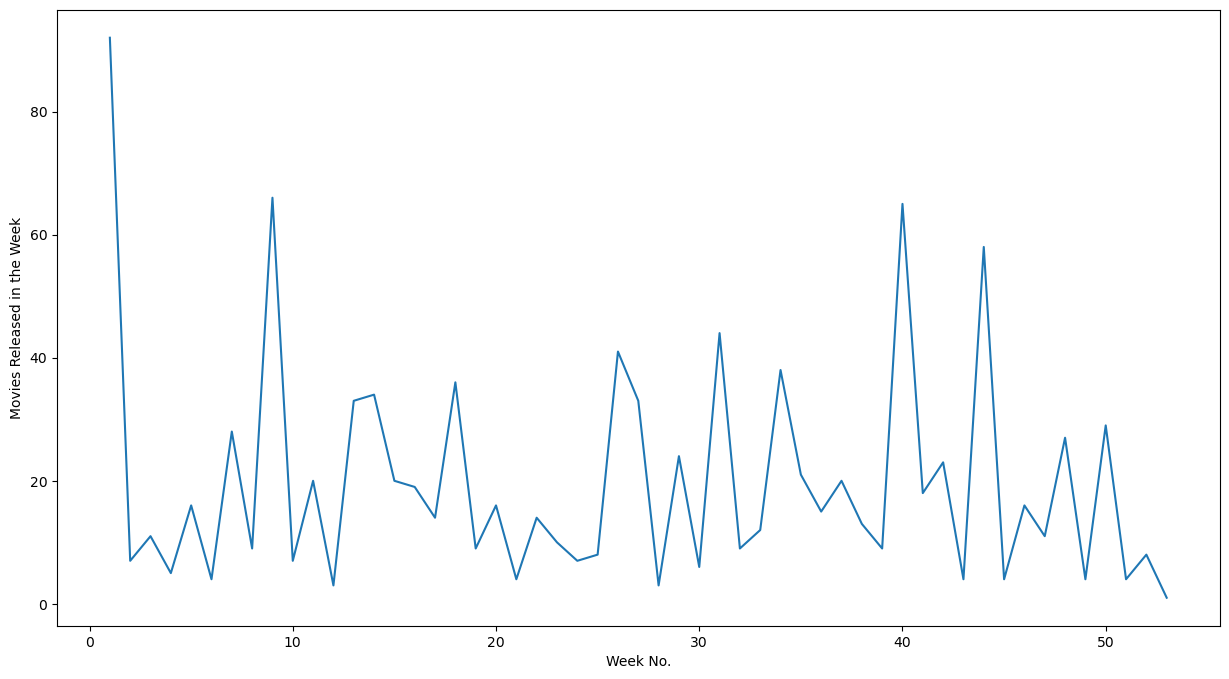

In [137]:
df_week=df_india_movies.groupby(['week_Added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=df_week, x='week_Added', y='title')
plt.ylabel("Movies Released in the Week")
plt.xlabel("Week No.")
plt.show()

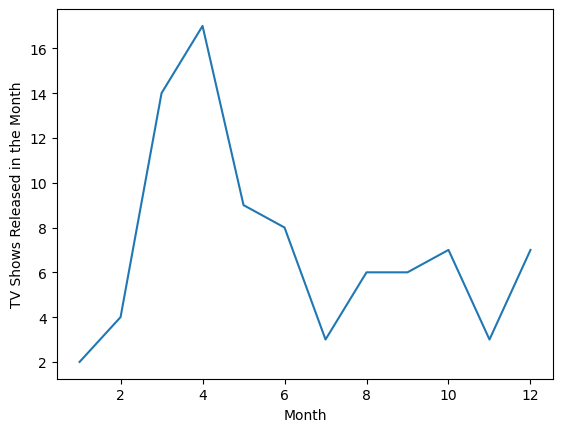

In [138]:
df_month=df_india_shows.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("TV Shows Released in the Month")
plt.xlabel("Month")
plt.show()

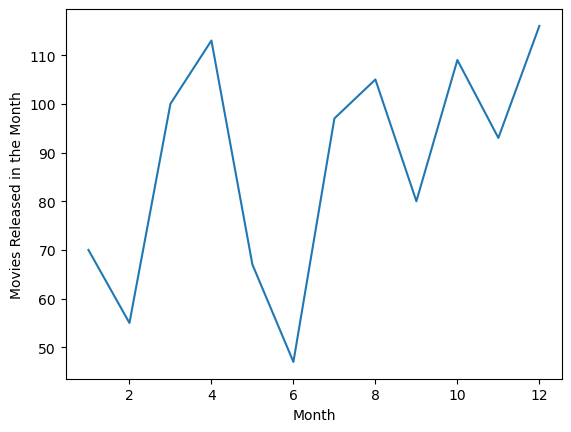

In [139]:
df_month=df_india_movies.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("Movies Released in the Month")
plt.xlabel("Month")
plt.show()

TV Shows are added in Netflix by a tremendous amount in April in India

Movies are added in Netflix in India by a tremendous amount in first week/last month of current year and first month of next year

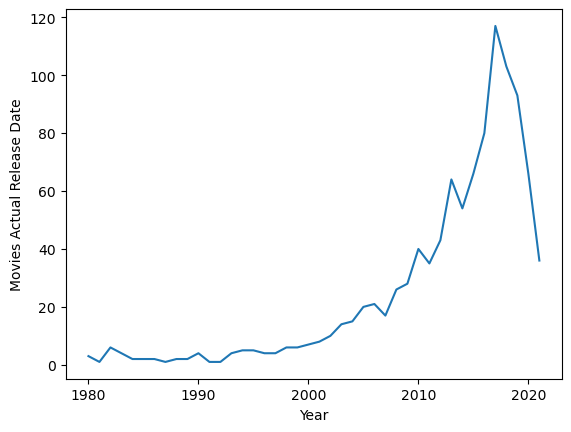

In [140]:
df_release_year=df_india_movies[df_india_movies['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

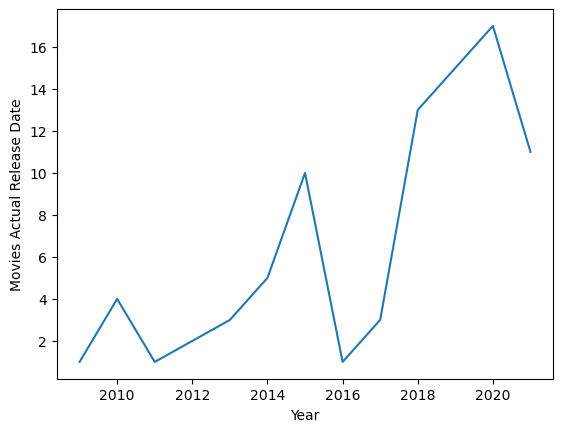

In [141]:
df_release_year=df_india_shows[df_india_shows['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

The understandable trend amongs movies and TV Shows across India in Netflix is the reduction of movies after 2020

In [142]:
#Analysing a combination of actors and directors
df_india_movies['Actor_Director_Combination'] = df_india_movies.Actors.str.cat(df_india_movies.Directors, sep=' and ')
df_india_movies_subset=df_india_movies[df_india_movies['Actors']!='Unknown Actor']
df_india_movies_subset=df_india_movies_subset[df_india_movies_subset['Directors']!='Unknown Director']
df_india_movies_subset.head()

title                 Actors       Directors  \
621  Avvai Shanmughi           Kamal Hassan  K.S. Ravikumar   
622  Avvai Shanmughi           Kamal Hassan  K.S. Ravikumar   
629  Avvai Shanmughi                 Nassar  K.S. Ravikumar   
630  Avvai Shanmughi                 Nassar  K.S. Ravikumar   
631  Avvai Shanmughi  S.P. Balasubrahmanyam  K.S. Ravikumar   

                    Genre country show_id   type          date_added  \
621              Comedies   India     s23  Movie  September 21, 2021   
622  International Movies   India     s23  Movie  September 21, 2021   
629              Comedies   India     s23  Movie  September 21, 2021   
630  International Movies   India     s23  Movie  September 21, 2021   
631              Comedies   India     s23  Movie  September 21, 2021   

     release_year rating duration Modified_Added_date  month_added  \
621          1996  TV-PG  150-200          2021-09-21            9   
622          1996  TV-PG  150-200          2021-09-21            9   
629          1996  TV-PG  150-200          2021-09-21            9   
630          1996  TV-PG  150-200          2021-09-21            9   
631          1996  TV-PG  150-200          2021-09-21            9   

     week_Added  year                Actor_Director_Combination  
621          38  2021           Kamal Hassan and K.S. Ravikumar  
622          38  2021           Kamal Hassan and K.S. Ravikumar  
629          38  2021                 Nassar and K.S. Ravikumar  
630          38  2021                 Nassar and K.S. Ravikumar  
631          38  2021  S.P. Balasubrahmanyam and K.S. Ravikumar

In [143]:
df_india_shows['Actor_Director_Combination'] = df_india_shows.Actors.str.cat(df_india_shows.Directors, sep=' and ')
df_india_shows_subset=df_india_shows[df_india_shows['Actors']!='Unknown Actor']
df_india_shows_subset=df_india_shows_subset[df_india_shows_subset['Directors']!='Unknown Director']
df_india_shows_subset.head()

title  Actors         Directors     Genre country show_id     type  \
7005  Navarasa  Suriya     Bejoy Nambiar  TV Shows   India    s298  TV Show   
7006  Navarasa  Suriya      Priyadarshan  TV Shows   India    s298  TV Show   
7007  Navarasa  Suriya    Karthik Narain  TV Shows   India    s298  TV Show   
7008  Navarasa  Suriya       Vasanth Sai  TV Shows   India    s298  TV Show   
7009  Navarasa  Suriya  Karthik Subbaraj  TV Shows   India    s298  TV Show   

          date_added  release_year rating  duration Modified_Added_date  \
7005  August 6, 2021          2021  TV-MA  1 Season          2021-08-06   
7006  August 6, 2021          2021  TV-MA  1 Season          2021-08-06   
7007  August 6, 2021          2021  TV-MA  1 Season          2021-08-06   
7008  August 6, 2021          2021  TV-MA  1 Season          2021-08-06   
7009  August 6, 2021          2021  TV-MA  1 Season          2021-08-06   

      month_added  week_Added  year   Actor_Director_Combination  
7005            8          31  2021     Suriya and Bejoy Nambiar  
7006            8          31  2021      Suriya and Priyadarshan  
7007            8          31  2021    Suriya and Karthik Narain  
7008            8          31  2021       Suriya and Vasanth Sai  
7009            8          31  2021  Suriya and Karthik Subbaraj

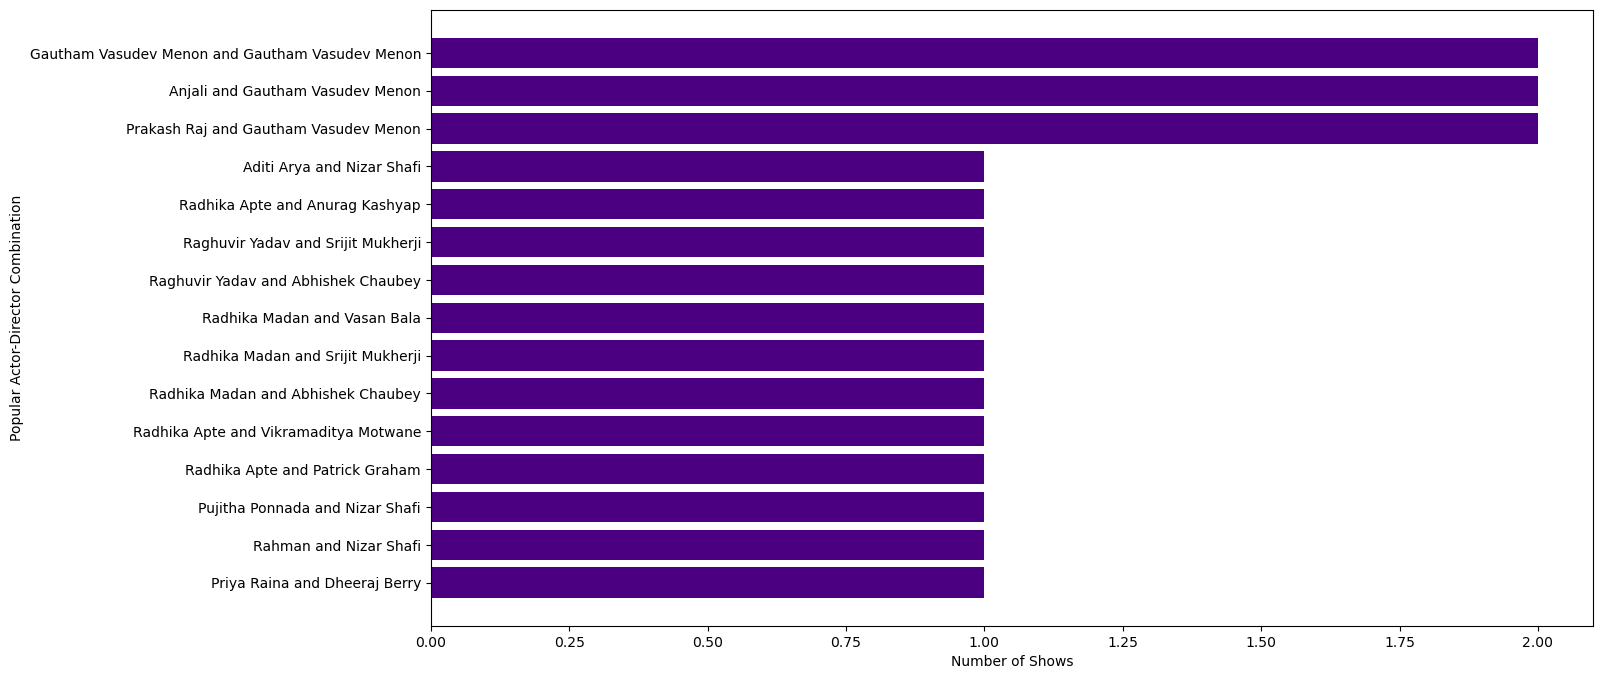

In [144]:
df_actors_directors=df_india_shows_subset.groupby(['Actor_Director_Combination']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_actors_directors[::-1]['Actor_Director_Combination'], df_actors_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actor-Director Combination')
plt.show()

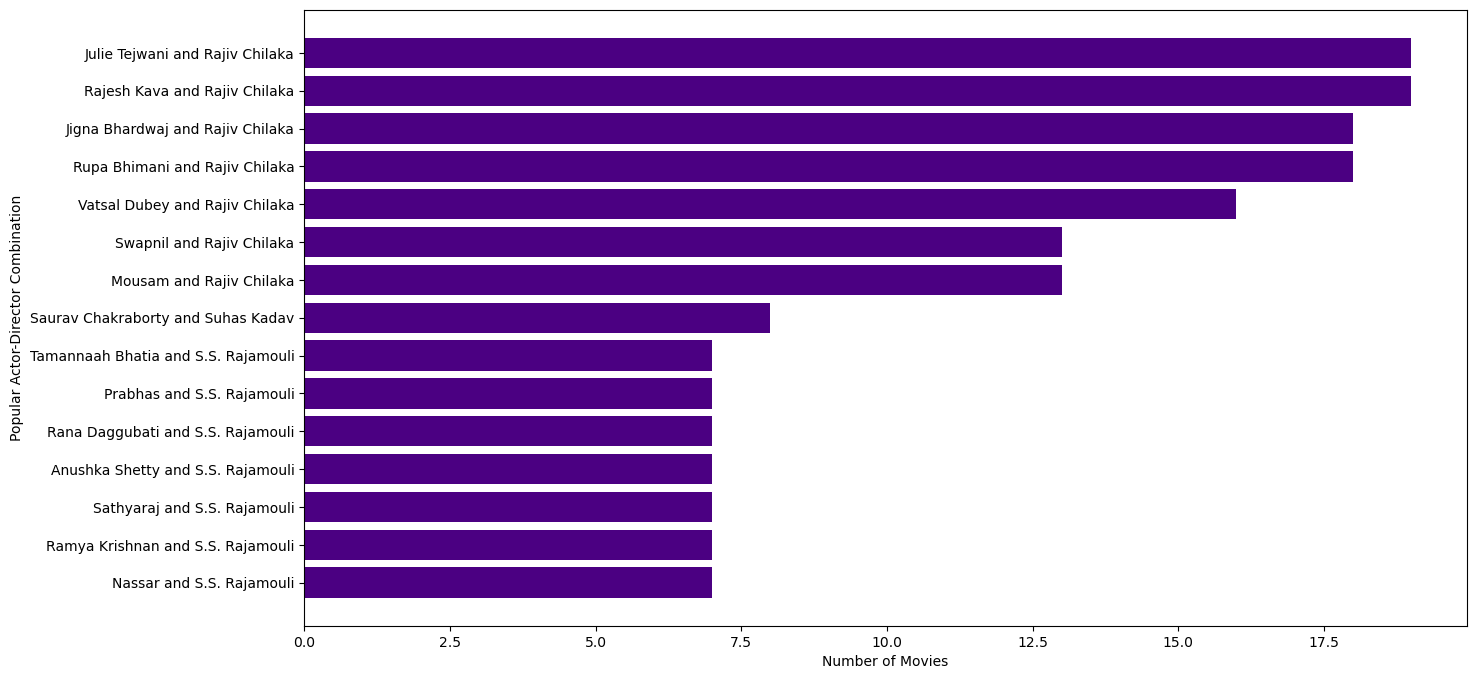

In [145]:
df_actors_directors=df_india_movies_subset.groupby(['Actor_Director_Combination']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_actors_directors[::-1]['Actor_Director_Combination'], df_actors_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actor-Director Combination')
plt.show()

In [146]:
df_india_movies[df_india_movies['Directors']=='Rajiv Chilaka']

title             Actors      Directors  \
10058   Chhota Bheem - Neeli Pahaadi       Vatsal Dubey  Rajiv Chilaka   
10059   Chhota Bheem - Neeli Pahaadi      Julie Tejwani  Rajiv Chilaka   
10060   Chhota Bheem - Neeli Pahaadi       Rupa Bhimani  Rajiv Chilaka   
10061   Chhota Bheem - Neeli Pahaadi     Jigna Bhardwaj  Rajiv Chilaka   
10062   Chhota Bheem - Neeli Pahaadi        Rajesh Kava  Rajiv Chilaka   
...                              ...                ...            ...   
145810   Chhota Bheem Kungfu Dhamaka    Vaibhav Thakkar  Rajiv Chilaka   
145812   Chhota Bheem Kungfu Dhamaka  Samriddhi Shuklaa  Rajiv Chilaka   
145814   Chhota Bheem Kungfu Dhamaka  Aditya Raj Sharma  Rajiv Chilaka   
145816   Chhota Bheem Kungfu Dhamaka     Vinod Kulkarni  Rajiv Chilaka   
150769         Dragonkala Ka Rahasya      Unknown Actor  Rajiv Chilaka   

                           Genre country show_id   type       date_added  \
10058   Children & Family Movies   India    s407  Movie    July 22, 2021   
10059   Children & Family Movies   India    s407  Movie    July 22, 2021   
10060   Children & Family Movies   India    s407  Movie    July 22, 2021   
10061   Children & Family Movies   India    s407  Movie    July 22, 2021   
10062   Children & Family Movies   India    s407  Movie    July 22, 2021   
...                          ...     ...     ...    ...              ...   
145810  Children & Family Movies   India   s6465  Movie  August 15, 2019   
145812  Children & Family Movies   India   s6465  Movie  August 15, 2019   
145814  Children & Family Movies   India   s6465  Movie  August 15, 2019   
145816  Children & Family Movies   India   s6465  Movie  August 15, 2019   
150769  Children & Family Movies   India   s6646  Movie    June 18, 2019   

        release_year rating duration Modified_Added_date  month_added  \
10058           2013  TV-Y7    50-80          2021-07-22            7   
10059           2013  TV-Y7    50-80          2021-07-22            7   
10060           2013  TV-Y7    50-80          2021-07-22            7   
10061           2013  TV-Y7    50-80          2021-07-22            7   
10062           2013  TV-Y7    50-80          2021-07-22            7   
...              ...    ...      ...                 ...          ...   
145810          2019  TV-Y7  100-120          2019-08-15            8   
145812          2019  TV-Y7  100-120          2019-08-15            8   
145814          2019  TV-Y7  100-120          2019-08-15            8   
145816          2019  TV-Y7  100-120          2019-08-15            8   
150769          2018   TV-Y    50-80          2019-06-18            6   

        week_Added  year           Actor_Director_Combination  
10058           29  2021       Vatsal Dubey and Rajiv Chilaka  
10059           29  2021      Julie Tejwani and Rajiv Chilaka  
10060           29  2021       Rupa Bhimani and Rajiv Chilaka  
10061           29  2021     Jigna Bhardwaj and Rajiv Chilaka  
10062           29  2021        Rajesh Kava and Rajiv Chilaka  
...            ...   ...                                  ...  
145810          33  2019    Vaibhav Thakkar and Rajiv Chilaka  
145812          33  2019  Samriddhi Shuklaa and Rajiv Chilaka  
145814          33  2019  Aditya Raj Sharma and Rajiv Chilaka  
145816          33  2019     Vinod Kulkarni and Rajiv Chilaka  
150769          25  2019      Unknown Actor and Rajiv Chilaka  

[147 rows x 16 columns]

It seems that Rajiv Chilaka has worked on Chota Bheem and has been able to create some good content in its movies. He can be relied on for more Chota Bheem stories

In [147]:
df_actors_directors['Actor_Director_Combination'].values

array(['Julie Tejwani and Rajiv Chilaka', 'Rajesh Kava and Rajiv Chilaka',
       'Jigna Bhardwaj and Rajiv Chilaka',
       'Rupa Bhimani and Rajiv Chilaka', 'Vatsal Dubey and Rajiv Chilaka',
       'Swapnil and Rajiv Chilaka', 'Mousam and Rajiv Chilaka',
       'Saurav Chakraborty and Suhas Kadav',
       'Tamannaah Bhatia and S.S. Rajamouli',
       'Prabhas and S.S. Rajamouli', 'Rana Daggubati and S.S. Rajamouli',
       'Anushka Shetty and S.S. Rajamouli',
       'Sathyaraj and S.S. Rajamouli',
       'Ramya Krishnan and S.S. Rajamouli', 'Nassar and S.S. Rajamouli'],
      dtype=object)

**The Most Popular Actor Director Combination in Movies Across India are:-**
'Julie Tejwani and Rajiv Chilaka', 'Rajesh Kava and Rajiv Chilaka',
       'Jigna Bhardwaj and Rajiv Chilaka',
       'Rupa Bhimani and Rajiv Chilaka', 'Vatsal Dubey and Rajiv Chilaka',
       'Swapnil and Rajiv Chilaka', 'Mousam and Rajiv Chilaka',
       'Saurav Chakraborty and Suhas Kadav',
       'Tamannaah Bhatia and S.S. Rajamouli',
       'Prabhas and S.S. Rajamouli', 'Rana Daggubati and S.S. Rajamouli',
       'Anushka Shetty and S.S. Rajamouli',
       'Sathyaraj and S.S. Rajamouli',
       'Ramya Krishnan and S.S. Rajamouli', 'Nassar and S.S. Rajamouli'

### Univariate Analysis separately for shows and movies in United Kingdom(Do same way as done in India and USA)
---



### Univariate Analysis separately for shows in Japan




In [148]:
#Analyzing India for both shows and movies
df_japan_shows=df_final1[df_final1['country']=='Japan'][df_final1[df_final1['country']=='Japan']['type']=='TV Show']

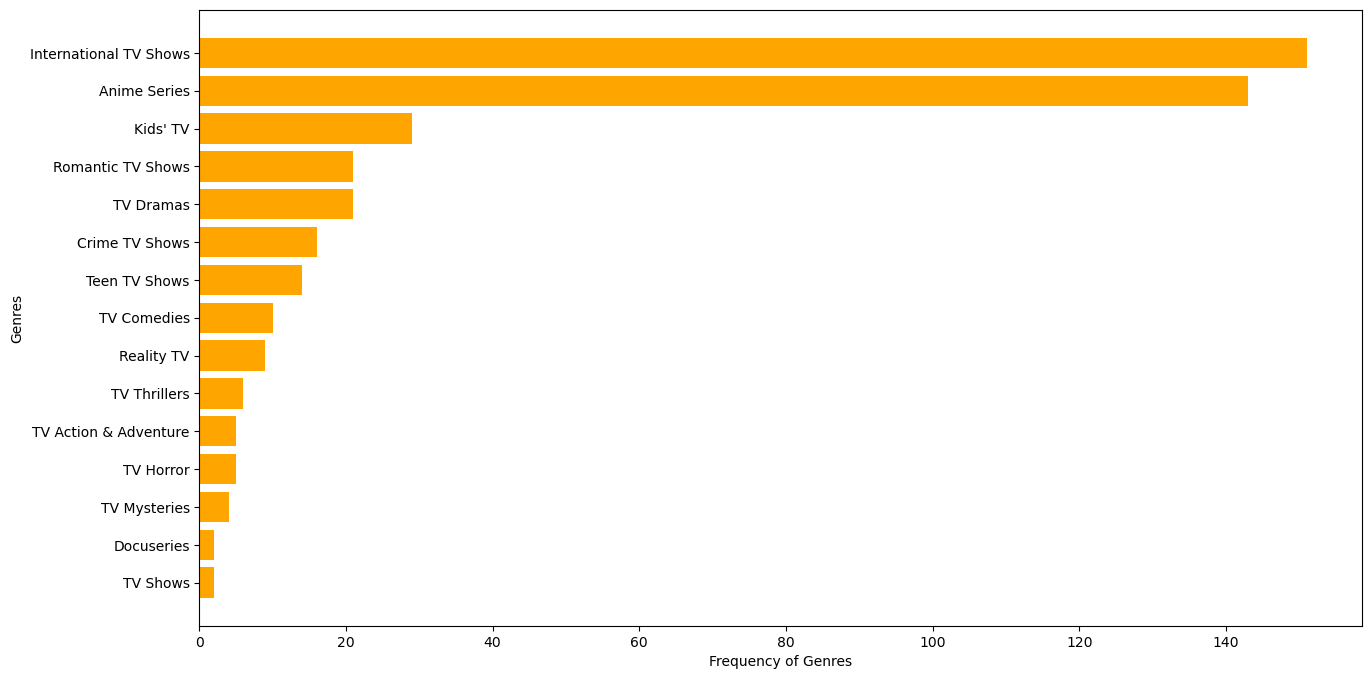

In [149]:
df_genre=df_japan_shows.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

International TV Shows and Anime Genres are popular in TV Shows in Japan

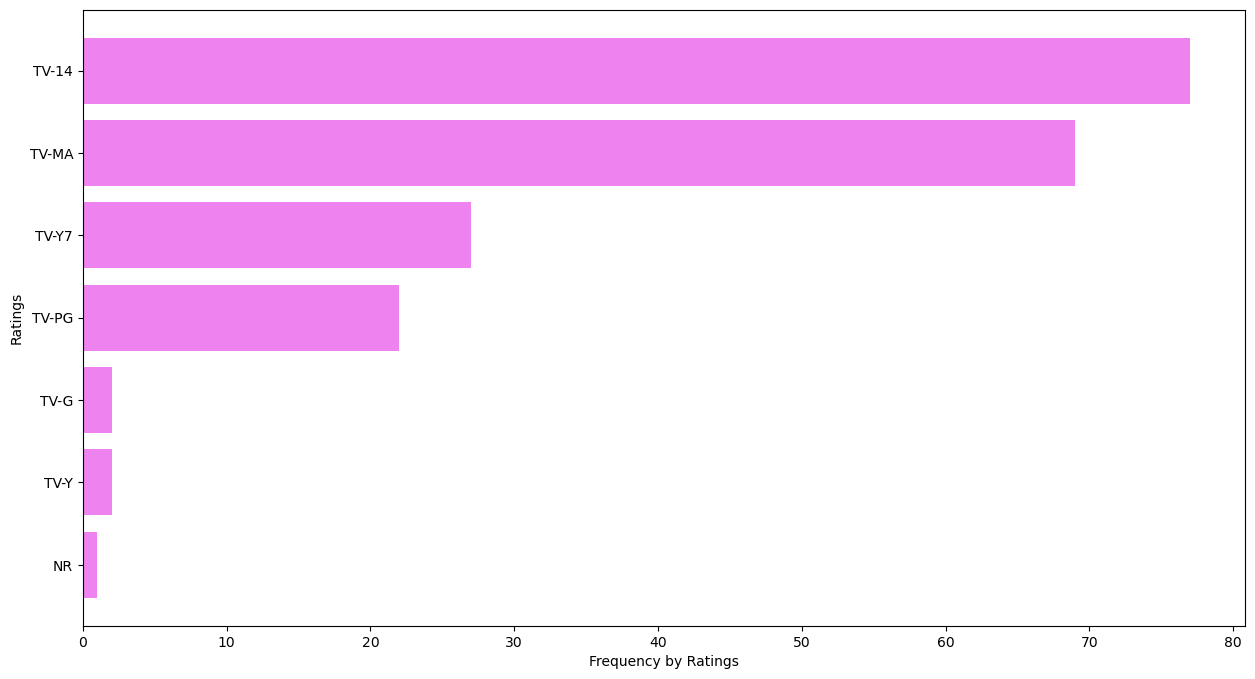

In [150]:
df_rating=df_japan_shows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

So it seems plaussible to conclude that the popular ratings across Netflix includes TV-14 Mature Audiences in TV Shows 

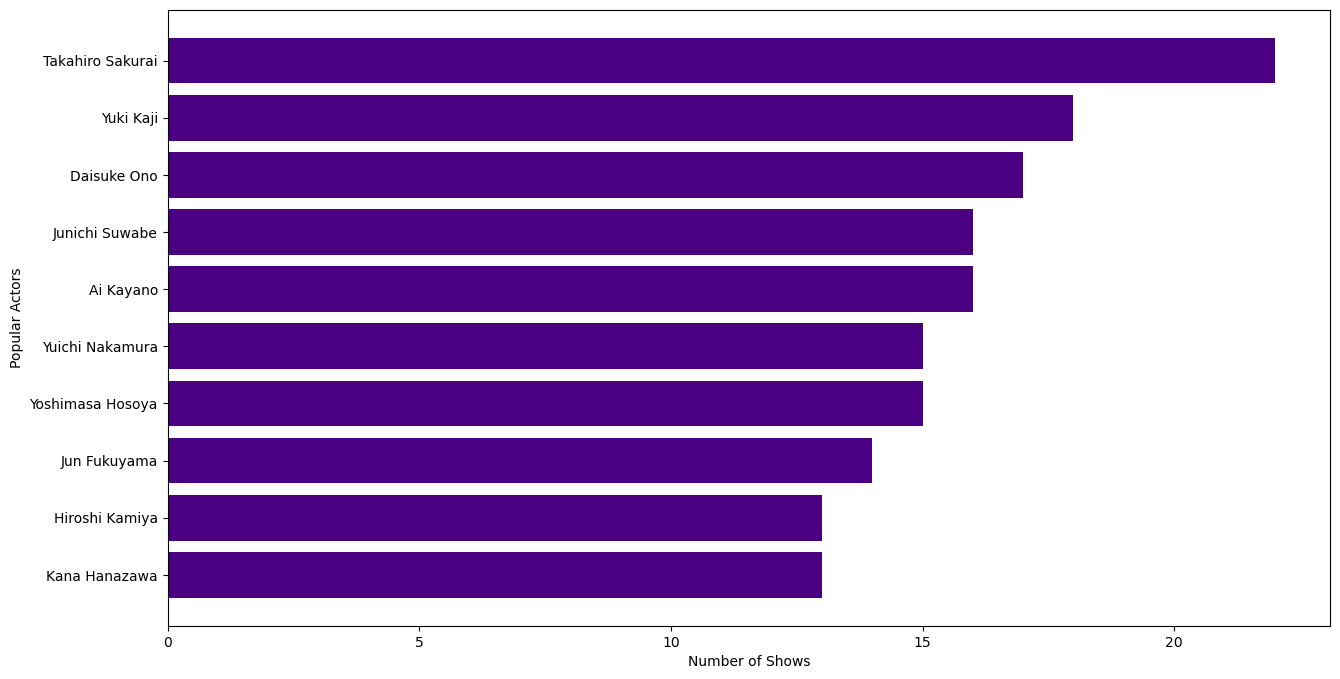

In [151]:
df_actors=df_japan_shows.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_actors=df_actors[df_actors['Actors']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actors')
plt.show()

In [152]:
df_actors['Actors'].values

array(['Takahiro Sakurai', 'Yuki Kaji', 'Daisuke Ono', 'Junichi Suwabe',
       'Ai Kayano', 'Yuichi Nakamura', 'Yoshimasa Hosoya', 'Jun Fukuyama',
       'Hiroshi Kamiya', 'Kana Hanazawa'], dtype=object)

**Popular Actors in TV Shows in Japan are:-**
'Takahiro Sakurai', 'Yuki Kaji', 'Daisuke Ono', 'Junichi Suwabe',
       'Ai Kayano', 'Yuichi Nakamura', 'Yoshimasa Hosoya', 'Jun Fukuyama',
       'Hiroshi Kamiya', 'Kana Hanazawa'

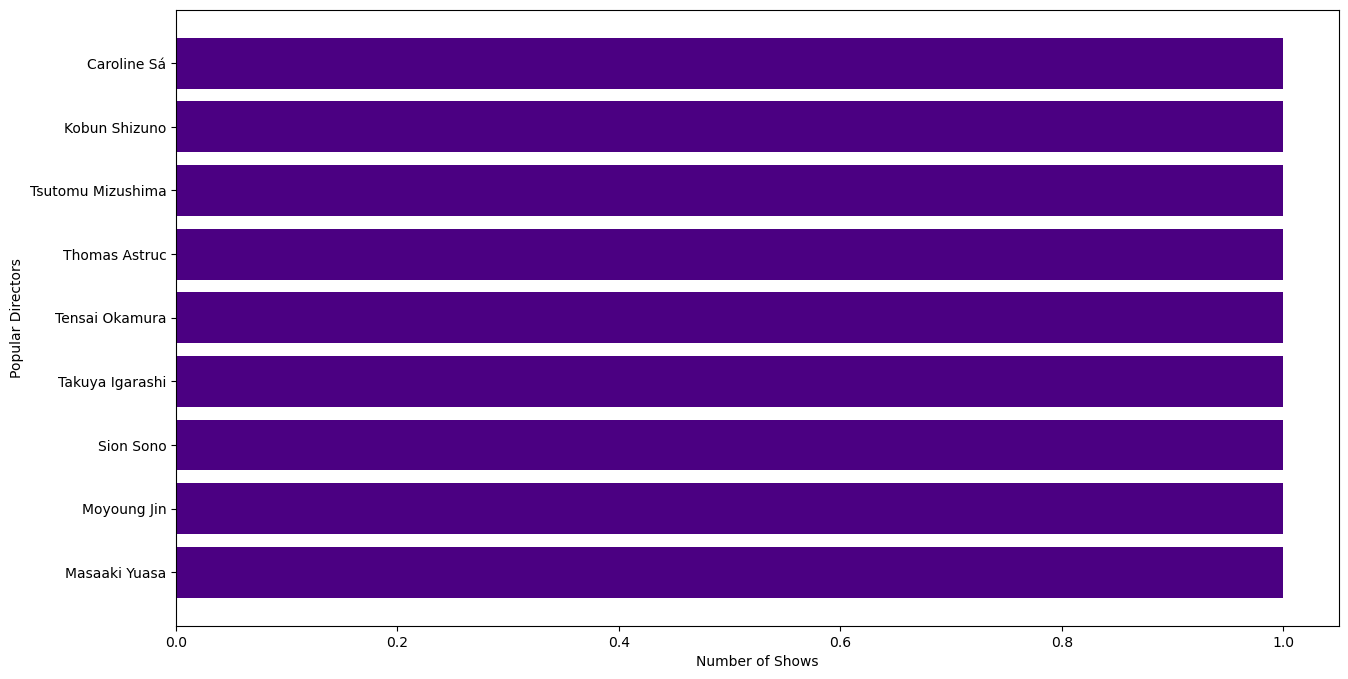

In [153]:
df_directors=df_japan_shows.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_directors=df_directors[df_directors['Directors']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['Directors'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Directors')
plt.show()

In [154]:
df_directors['Directors'].values

array(['Caroline Sá', 'Kobun Shizuno', 'Tsutomu Mizushima',
       'Thomas Astruc', 'Tensai Okamura', 'Takuya Igarashi', 'Sion Sono',
       'Moyoung Jin', 'Masaaki Yuasa'], dtype=object)

**All Directors are one time directors only**

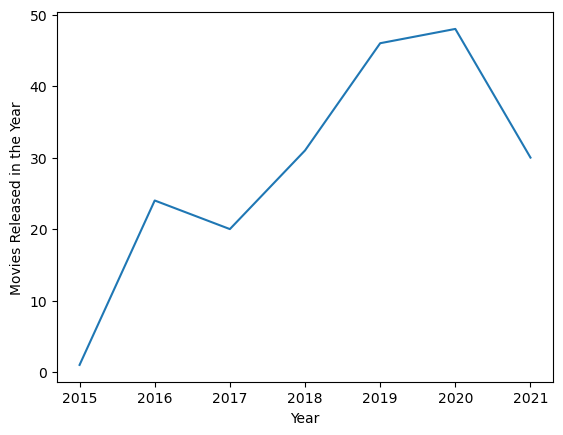

In [155]:
df_year=df_japan_shows.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.show()

In Japan, TV Shows have diminished in 2017 from 2016 and then increased till 2020 after which it has reduced in 2021.

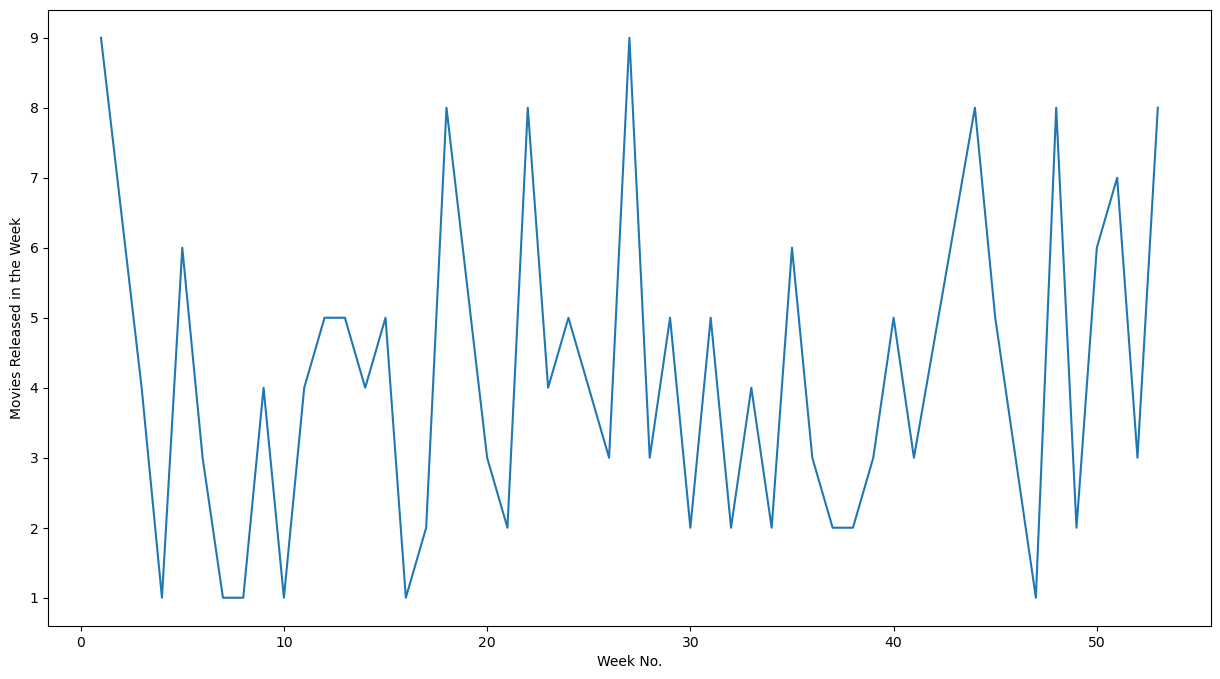

In [156]:
df_week=df_japan_shows.groupby(['week_Added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=df_week, x='week_Added', y='title')
plt.ylabel("Movies Released in the Week")
plt.xlabel("Week No.")
plt.show()

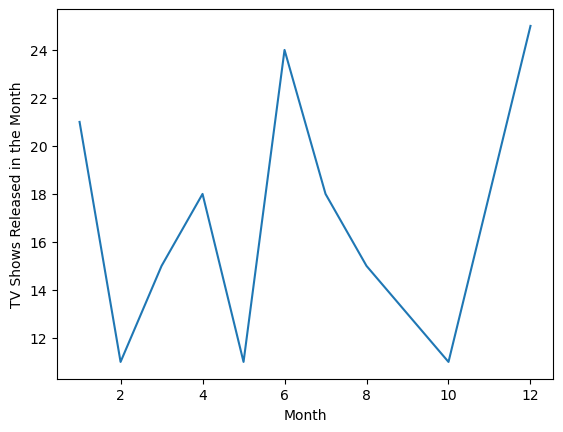

In [157]:
df_month=df_japan_shows.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("TV Shows Released in the Month")
plt.xlabel("Month")
plt.show()

TV Shows are added in Netflix by significant numbers in April and January in Japan

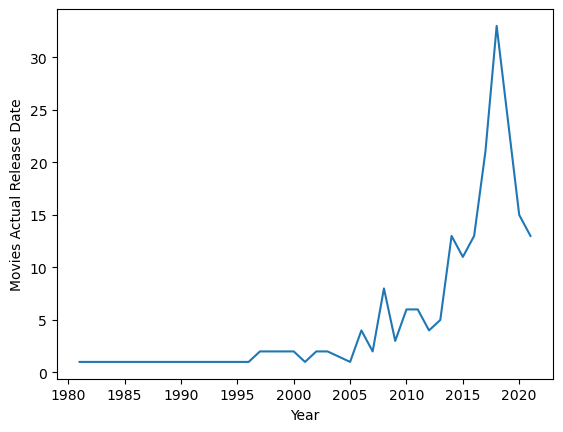

In [158]:
df_release_year=df_japan_shows[df_japan_shows['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

Reduction in TV Shows after 2019 in Japan

### Univariate Analysis separately for shows in South Korea(Do in same way as done in Japan)


### Recommendations

1) The most popular Genres across the countries and in both TV Shows and Movies are 
Drama, Comedy and International TV Shows/Movies, so content aligning to that 
is recommended.

2)Add TV Shows in July/August and Movies in last week of the year/first month of 
the next year.

3)For USA audience 80-120 mins is the recommended length for movies and Kids TV Shows
are also popular along with the genres in first point, hence recommended.


4)The target audience in USA and India is recommended to be 14+ and above ratings .

5)Add movies for Indian Audience, it has been declining since 2018.

6)Anime Genre for Japan in TV Shows is recommended.

7)While creating content, take into consideration the popular actors/directors
for that country. Also take into account the director-actor combination which 
is highly recommended. 

